# ECE 285 Assignment 1: Logistic Regression

For this part of assignment, you are tasked to implement a logistic regression algorithm for multiclass classification and test it on the CIFAR10 dataset.

You sould run the whole notebook and answer the questions in the notebook.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.


In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from ece285.utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


# Logistic Regression for multi-class classification


A Logistic Regression Algorithm has 3 hyperparameters that you can experiment with:

- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, and later you are asked to experiment with different values. We recommend looking at the graphs and observing how the performance of the classifier changes with different learning rate.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the linear classifier update rule for each sample in the training set. We evaluate our models after every 10 epochs and save the accuracies, which are later used to plot the training, validation and test VS epoch curves.
- **Weight Decay** - Regularization can be used to constrain the weights of the classifier and prevent their values from blowing up. Regularization helps in combatting overfitting. You will be using the 'weight_decay' term to introduce regularization in the classifier.

The only way how a Logistic Regression based classification algorithm is different from a Linear Regression algorithm is that in the former we additionally pass the classifier outputs into a sigmoid function which squashes the output in the (0,1) range. Essentially these values then represent the probabilities of that sample belonging to class particular classes


### Implementation (40%)

You need to implement the Linear Regression method in `algorithms/logistic_regression.py`. You need to fill in the sigmoid function, training function as well as the prediction function.


In [2]:
# Import the algorithm implementation (TODO: Complete the Logistic Regression in algorithms/logistic_regression.py)
from ece285.algorithms import Logistic
from ece285.utils.evaluation import get_classification_accuracy

num_classes = 10  # Cifar10 dataset has 10 different classes

# Initialize hyper-parameters
learning_rate = 0.01  # You will be later asked to experiment with different learning rates and report results
num_epochs_total = 1000  # Total number of epochs to train the classifier
epochs_per_evaluation = 10  # Epochs per step of evaluation; We will evaluate our model regularly during training
N, D = dataset[
    "x_train"
].shape  # Get training data shape, N: Number of examples, D:Dimensionality of the data
weight_decay = 0.00002

x_train = dataset["x_train"].copy()
y_train = dataset["y_train"].copy()
x_val = dataset["x_val"].copy()
y_val = dataset["y_val"].copy()
x_test = dataset["x_test"].copy()
y_test = dataset["y_test"].copy()

# Insert additional scalar term 1 in the samples to account for the bias as discussed in class
x_train = np.insert(x_train, D, values=1, axis=1)
x_val = np.insert(x_val, D, values=1, axis=1)
x_test = np.insert(x_test, D, values=1, axis=1)

In [3]:
# Training and evaluation function -> Outputs accuracy data
def train(learning_rate_, weight_decay_):
    # Create a linear regression object
    logistic_regression = Logistic(
        num_classes, learning_rate_, epochs_per_evaluation, weight_decay_
    )

    # Randomly initialize the weights and biases
    weights = np.random.randn(num_classes, D + 1) * 0.0001

    train_accuracies, val_accuracies, test_accuracies = [], [], []

    # Train the classifier
    for _ in tqdm(range(int(num_epochs_total / epochs_per_evaluation))):
        # Train the classifier on the training data
        weights = logistic_regression.train(x_train, y_train, weights)

        # Evaluate the trained classifier on the training dataset
        y_pred_train = logistic_regression.predict(x_train)
        train_accuracies.append(get_classification_accuracy(y_pred_train, y_train))

        # Evaluate the trained classifier on the validation dataset
        y_pred_val = logistic_regression.predict(x_val)
        val_accuracies.append(get_classification_accuracy(y_pred_val, y_val))

        # Evaluate the trained classifier on the test dataset
        y_pred_test = logistic_regression.predict(x_test)
        test_accuracies.append(get_classification_accuracy(y_pred_test, y_test))

    return train_accuracies, val_accuracies, test_accuracies, weights


In [4]:
import matplotlib.pyplot as plt


def plot_accuracies(train_acc, val_acc, test_acc):
    # Plot Accuracies vs Epochs graph for all the three
    epochs = np.arange(0, int(num_epochs_total / epochs_per_evaluation))
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch/10")
    plt.plot(epochs, train_acc, epochs, val_acc, epochs, test_acc)
    plt.legend(["Training", "Validation", "Testing"])
    plt.show()


In [5]:
# Run training and plotting for default parameter values as mentioned above
t_ac, v_ac, te_ac, weights = train(learning_rate, weight_decay)


  0%|          | 0/100 [00:00<?, ?it/s]

6.932540087676567
Epoch 0, Loss 6.932540087677183
3.5165692053317223
3.418425409793438
3.379101394425952
3.361897844478
3.3509052760428744
3.3415730152166385
3.3328384018436554
3.324462884507205
3.3163857671051002


  1%|          | 1/100 [00:02<04:33,  2.76s/it]

3.308584202611597
Epoch 0, Loss 3.3085842027676953
3.301043767757864
3.29375227560423
3.286698448162124
3.2798716142692306
3.273261627239394
3.2668588307396527
3.260654035657196
3.2546384996934883
3.2488039078298483


  2%|▏         | 2/100 [00:05<04:27,  2.73s/it]

3.2431423532717574
Epoch 0, Loss 3.2431423534727375
3.237646318823736
3.232308658726343
3.2271225810001427
3.2220816303373736
3.217179671573519
3.2124108737620802
3.207769694867507
3.2032508670839546
3.1988493827813627


  3%|▎         | 3/100 [00:08<04:23,  2.72s/it]

3.1945604810750643
Epoch 0, Loss 3.1945604813360906
3.1903796350108906
3.1863025393541786
3.182325098968354
3.178443417766507
3.174653788217783
3.1709526813891773
3.1673367375024783
3.163802756985636
3.16034769199756


  4%|▍         | 4/100 [00:10<04:23,  2.74s/it]

3.156968638405354
Epoch 0, Loss 3.1569686387348956
3.1536628281931547
3.150427622282046
3.1472605037409735
3.144159071369079
3.141121033630473
3.138144202923139
3.1352264901642855
3.132365899675222
3.1295605243495275


  5%|▌         | 5/100 [00:14<04:41,  2.97s/it]

3.12680854108899
Epoch 0, Loss 3.126808541491828
3.124108206492551
3.1214578527841517
3.1188558839661176
3.1163007721853657
3.113791054300396
3.111325328637651
3.1089022519264606
3.1065205364023503
3.1041789470690886


  6%|▌         | 6/100 [00:17<04:41,  2.99s/it]

3.101876299110355
Epoch 0, Loss 3.1018762995891733
3.099611455442449
3.0973833243999325
3.095190857546573
3.093033047604387
3.090908926494005
3.0888175634799806
3.0867580634150156
3.0847295650774558
3.0827312395967277


  7%|▋         | 7/100 [00:21<05:03,  3.26s/it]

3.080762288961696
Epoch 0, Loss 3.080762289517957
3.078821944607237
3.0769094660745764
3.0750241397412226
3.0731652776165657
3.071332216199438
3.06952431539417
3.0677409574818557
3.0659815461437536
3.0642455055339233


  8%|▊         | 8/100 [00:24<05:03,  3.30s/it]

3.062532279398374
Epoch 0, Loss 3.06253228003281
3.0608413302381443
3.0591721385139174
3.0575242018898723
3.0558970345146528
3.054290166337413
3.0527031424570605
3.0511355225028907
3.0495868800449415
3.0480568020324625


  9%|▉         | 9/100 [00:27<04:51,  3.21s/it]

3.046544888259015
Epoch 0, Loss 3.0465448889719102
3.0450507508527904
3.0435740137908036
3.0421143124357224
3.040671293094142
3.0392446125951857
3.037833937888387
3.0364389456598477
3.0350593219657473
3.033694761882303


 10%|█         | 10/100 [00:29<04:20,  2.90s/it]

3.0323449691713584
Epoch 0, Loss 3.0323449699627183
3.0310096559607986
3.029688542439053
3.0283813565629796
3.027087833778462
3.0258077167530835
3.024540755120299
3.0232867052345256
3.0220453299366175
3.0208163983292433


 11%|█         | 11/100 [00:33<04:42,  3.17s/it]

3.0195996855616505
Epoch 0, Loss 3.0195996864313033
3.0183949726234065
3.017202046146656
3.0160206982165048
3.014850726189142
3.0136919325173417
3.0125441245829854
3.011407114536297
3.0102807191414667
3.0091647596283706


 12%|█▏        | 12/100 [00:36<04:37,  3.15s/it]

3.008059061550118
Epoch 0, Loss 3.0080590624977797
3.006963454646144
3.005877772710613
3.004801853465885
3.0037355384408153
3.002678672853684
3.0016311054995404
3.0005926886417726
2.999563277907709
2.9985427321880986


 13%|█▎        | 13/100 [00:40<04:42,  3.24s/it]

2.997530913540266
Epoch 0, Loss 2.9975309145655795
2.9965276870948276
2.99553292096577
2.9945464861637894
2.993568256512722
2.992598108568959
2.9916359215437023
2.990681577227958
2.989734959920147


 14%|█▍        | 14/100 [00:42<04:28,  3.12s/it]

2.9887959563562236
2.9878644556422054
Epoch 0, Loss 2.98786445674477
2.986940349189013
2.9860235306495246
2.985113895857765
2.9842113427701262
2.9833157714085656
2.982427083805674
2.9815451839515617
2.9806699777424863
2.9798013729311443


 15%|█▌        | 15/100 [00:45<03:59,  2.82s/it]

2.978939279078586
Epoch 0, Loss 2.978939280257973
2.9780836075076556
2.97723427125794
2.9763911850421305
2.9755542652037783
2.97472342967636
2.9738985979436263
2.9730796910011854
2.9722666313192563
2.9714593428065723


 16%|█▌        | 16/100 [00:47<03:56,  2.81s/it]

2.970657750775382
Epoch 0, Loss 2.970657752031147
2.9698617819075017
2.9690713642214006
2.968286427040258
2.9675069009609794
2.966732717824119
2.965963810684693
2.9652001137838417
2.964441562521312
2.963688093428741


 17%|█▋        | 17/100 [00:52<04:47,  3.46s/it]

2.962939644143696
Epoch 0, Loss 2.962939645475388
2.9621961533844674
2.9614575609255627
2.960723807573907
2.9599948351456953
2.9592705864439046
2.9585510052364192
2.957836036234765
2.9571256250734255
2.9564197182897196


 18%|█▊        | 18/100 [00:55<04:32,  3.33s/it]

2.955718263304231
Epoch 0, Loss 2.9557182647113973
2.955021208401759
2.9543285027127837
2.9536400961954277
2.9529559396178913
2.952275984541357
2.9516001833033387
2.9509284890014666
2.9502608554776963
2.949597237302924


 19%|█▉        | 19/100 [00:58<04:24,  3.26s/it]

2.948937589761995
Epoch 0, Loss 2.9489375912441864
2.9482818688391
2.9476300312035373
2.946982034195843
2.9463378358142642
2.9456973947015737
2.9450606701322113
2.9444276219997456
2.9437982108046508


 20%|██        | 20/100 [01:02<04:33,  3.42s/it]

2.943172397642368
2.9425501441916753
Epoch 0, Loss 2.9425501457484473
2.941931412703333
2.941316165989
2.940704367410423
2.9400959808688847
2.939490970794895
2.9388893021381426
2.9382909403576636
2.937695851412258
2.937104001751125


 21%|██        | 21/100 [01:05<04:17,  3.26s/it]

2.9365153583047086
Epoch 0, Loss 2.9365153599356253
2.9359298884757687
2.935347560130648
2.93476834159074
2.9341922016241613
2.933619109437597
2.933049034668346
2.9324819473765382
2.9319178180375247
2.9313566175344423


 22%|██▏       | 22/100 [01:08<04:13,  3.25s/it]

2.9307983171509404
Epoch 0, Loss 2.9307983188555755
2.930242888564069
2.9296903038373245
2.9291405354138487
2.9285935561097696
2.928049339107697
2.9275078579503533
2.926969086534337
2.9264329991040303
2.9258995702456287


 23%|██▎       | 23/100 [01:11<03:52,  3.02s/it]

2.9253687748812993
Epoch 0, Loss 2.9253687766592362
2.9248405882634647
2.924314985969207
2.9237919438947846
2.923271438250271
2.922753445554299
2.922237942628917
2.9217249065945503
2.9212143148650673
2.9207061451429417


 24%|██▍       | 24/100 [01:14<03:53,  3.08s/it]

2.920200375414521
Epoch 0, Loss 2.9202003772653544
2.919696983945387
2.919195949275806
2.9186972502162782
2.9182008658431724
2.9177067754944455
2.917214958765453
2.916725395504836
2.916238065810497
2.915752950025643


 25%|██▌       | 25/100 [01:17<03:53,  3.11s/it]

2.9152700287349207
Epoch 0, Loss 2.9152700306582573
2.914789282760614
2.9143106931589244
2.9138342412163167
2.91335990844594
2.9128876765841167
2.9124175275868924
2.911949443626661
2.9114834070888485
2.9110194005686574


 26%|██▌       | 26/100 [01:21<04:05,  3.32s/it]

2.910557406867879
Epoch 0, Loss 2.9105574088633372
2.910097408991756
2.9096393901459163
2.9091833337333504
2.9087292233514543
2.9082770427891247
2.907826776023904
2.907378407219181
2.9069319207214446
2.906487301057583


 27%|██▋       | 27/100 [01:24<03:53,  3.19s/it]

2.906044532932233
Epoch 0, Loss 2.9060445349994444
2.905603601225181
2.905164490988805
2.9047271874455656
2.904291675985543
2.903857942164016
2.9034259716990847
2.902995750469329
2.902567264511526
2.9021405000183838


 28%|██▊       | 28/100 [01:27<03:54,  3.25s/it]

2.9017154433363337
Epoch 0, Loss 2.901715445474941
2.9012920809633496
2.9008703995468146
2.900450385881415
2.9000320269070783
2.8996153097069395
2.8992002215053496
2.8987867496659163
2.89837488168957
2.897964605212675


 29%|██▉       | 29/100 [01:30<03:45,  3.18s/it]

2.897555908005163
Epoch 0, Loss 2.8975559102148227
2.897148777968706
2.8967432031349096
2.896339171663547
2.8959366718408166
2.895535692077627
2.89513622090792
2.894738246987006
2.8943417590899436
2.893946746109929


 30%|███       | 30/100 [01:33<03:40,  3.15s/it]

2.8935531970567285
Epoch 0, Loss 2.893553199337109
2.893161101055123
2.892770447343382
2.8923812252717718
2.8919934243010648
2.891607034001103
2.891222044049356
2.890838444229524
2.890456224430147
2.8900753746432475


 31%|███       | 31/100 [01:36<03:33,  3.10s/it]

2.8896958849629883
Epoch 0, Loss 2.8896958873137706
2.889317745584354
2.8889409468018528
2.8885654790082347
2.888191332693241
2.887818498442358
2.887446966935604
2.8870767289463255
2.886707775340014
2.8863400970731483


 32%|███▏      | 32/100 [01:39<03:24,  3.01s/it]

2.885973685192042
Epoch 0, Loss 2.8859736876129194
2.8856085308317208
2.8852446252148085
2.8848819596504343
2.884520525533152
2.884160314341886
2.8838013176388797
2.8834435270686662
2.883086934357061
2.882731531310155


 33%|███▎      | 33/100 [01:42<03:08,  2.81s/it]

2.8823773098133363
Epoch 0, Loss 2.882377312304014
2.8820242618303165
2.8816723794021804
2.8813216546464404
2.880972079756116
2.8806236469988105
2.8802763487158236
2.879930177321253
2.879585125301128


 34%|███▍      | 34/100 [01:44<02:59,  2.72s/it]

2.8792411852125475
2.878898349682825
Epoch 0, Loss 2.8788983522430205
2.8785566114086625
2.8782159631553164
2.8778763977557906
2.8775379081100354
2.877200487184157
2.8768641280096374
2.8765288236825706
2.8761945673629046
2.8758613522736955


 35%|███▌      | 35/100 [01:47<02:56,  2.72s/it]

2.8755291717003773
Epoch 0, Loss 2.87552917432982
2.8751980189900257
2.8748678875506584
2.87453877085052
2.874210662417391
2.873883555837901
2.873557444756859
2.8732323228765773
2.872908183956223
2.8725850218111684


 36%|███▌      | 36/100 [01:49<02:49,  2.64s/it]

2.872262830312349
Epoch 0, Loss 2.87226283301078
2.871941603385635
2.8716213350112105
2.8713020192229592
2.8709836501078607
2.8706662218053927
2.8703497285069433
2.870034164455229
2.8697195239437248
2.869405801316096


 37%|███▋      | 37/100 [01:52<02:45,  2.63s/it]

2.8690929909656417
Epoch 0, Loss 2.8690929937328122
2.8687810873347472
2.8684700849143363
2.868159978243341
2.8678507619081683
2.867542430542184
2.867234978825194
2.8669284014829364
2.8666226932865855
2.8663178490522507


 38%|███▊      | 38/100 [01:55<02:56,  2.85s/it]

2.8660138636404917
Epoch 0, Loss 2.866013866476165
2.8657107319558386
2.865408448946313
2.8651070096029594
2.864806408959385
2.8645066420912997
2.8642077041160654
2.863909590192249
2.8636122955191867
2.8633158153365463


 39%|███▉      | 39/100 [02:00<03:32,  3.48s/it]

2.8630201449238997
Epoch 0, Loss 2.86302014782785
2.862725279600302
2.8624312147238666
2.862137945691364
2.861845467937804
2.861553776936039
2.861262868196366
2.860972737266136
2.860683379729363


 40%|████      | 40/100 [02:04<03:34,  3.57s/it]

2.860394791206347
2.8601069673532904
Epoch 0, Loss 2.8601069703253024
2.859819903861931
2.8595335964591717
2.8592480409067145
2.858963233000705
2.8586791685713764
2.858395843482698
2.8581132536320326
2.8578313949497893
2.8575502633990935


 41%|████      | 41/100 [02:07<03:22,  3.43s/it]

2.857269854975446
Epoch 0, Loss 2.857269858015314
2.856990165706397
2.856711191651223
2.856432928900601
2.8561553735762963
2.8558785218308405
2.8556023698472313
2.8553269138386215
2.855052150048016
2.854778074747972


 42%|████▏     | 42/100 [02:10<03:18,  3.42s/it]

2.854504684240311
Epoch 0, Loss 2.854504687347839
2.8542319748558174
2.853959942953957
2.853688584922589
2.853417897177685
2.853147876163054
2.852878518350062
2.8526098202373653
2.85234177835064
2.8520743892423157


 43%|████▎     | 43/100 [02:14<03:21,  3.54s/it]

2.8518076494913185
Epoch 0, Loss 2.851807652666321
2.8515415557028043
2.851276104507909
2.8510112925634923
2.8507471165518896
2.850483573180663
2.850220659182359
2.8499583713142638
2.849696706358169
2.8494356611201326


 44%|████▍     | 44/100 [02:17<03:05,  3.31s/it]

2.8491752324302464
Epoch 0, Loss 2.849175235672547
2.8489154171424045
2.8486562121340793
2.8483976143060903
2.848139620582387
2.8478822279098237
2.847625433257947
2.847369233618777
2.847113626006594
2.846858607457732


 45%|████▌     | 45/100 [02:19<02:47,  3.04s/it]

2.8466041750303654
Epoch 0, Loss 2.8466041783397964
2.846350325804309
2.8460970568808106
2.8458443653823515
2.845592248452447
2.8453407032554505
2.8450897269763598
2.844839316820623
2.8445894700139482
2.84434018380212


 46%|████▌     | 46/100 [02:23<02:44,  3.04s/it]

2.844091455450808
Epoch 0, Loss 2.8440914588272106
2.8438432822453845
2.8435956614907463
2.843348590511129
2.8431020666499354
2.8428560872695536
2.842610649751188
2.8423657514946847
2.8421213899183613
2.8418775624588397


 47%|████▋     | 47/100 [02:25<02:36,  2.95s/it]

2.8416342665708796
Epoch 0, Loss 2.841634270014104
2.841391499727211
2.841149259418378
2.8409075431525688
2.8406663484554646
2.8404256728700745
2.840185513956588
2.839945869292211
2.8397067364710216
2.8394681131038157


 48%|████▊     | 48/100 [02:28<02:31,  2.92s/it]

2.8392299968179557
Epoch 0, Loss 2.839230000327859
2.838992385257225
2.8387552760816845
2.8385186669675213
2.838282555606909
2.8380469397078714
2.8378118169941318
2.837577185204982
2.837343042095144
2.837109385434632


 49%|████▉     | 49/100 [02:31<02:27,  2.88s/it]

2.836876213008622
Epoch 0, Loss 2.8368762165850705
2.8366435226173126
2.8364113120758003
2.8361795792139466
2.8359483218762476
2.8357175379217088
2.8354872252237193
2.8352573816699245
2.835028005162108
2.8347990936160596


 50%|█████     | 50/100 [02:35<02:34,  3.10s/it]

2.8345706449614676
Epoch 0, Loss 2.834570648604335
2.8343426571417853
2.834115128114125
2.8338880558491315
2.8336614383308723
2.833435273556718
2.83320955953723
2.832984294296055
2.832759475869799
2.8325351023079315


 51%|█████     | 51/100 [02:38<02:34,  3.15s/it]

2.832311171672669
Epoch 0, Loss 2.8323111753818355
2.832087682038869
2.8318646314939215
2.8316420181376456
2.8314198400821833
2.8311980954518963
2.8309767823832632
2.830755899024777
2.830535443536849
2.8303154140917


 52%|█████▏    | 52/100 [02:42<02:46,  3.46s/it]

2.8300958088732746
Epoch 0, Loss 2.830095812648628
2.8298766260771298
2.8296578639103496
2.829439520591442
2.829221594350251
2.829004083427855
2.8287869860764814
2.82857030055941
2.828354025150882
2.828138158136014


 53%|█████▎    | 53/100 [02:45<02:34,  3.30s/it]

2.827922697810706
Epoch 0, Loss 2.8279227016521413
2.8277076424815504
2.827492990465752
2.8272787400910313
2.827064889695549
2.8268514376278144
2.826638382246605
2.826425721920877
2.8262134550296945
2.8260015799621345


 54%|█████▍    | 54/100 [02:48<02:24,  3.15s/it]

2.8257900951172177
Epoch 0, Loss 2.8257900990246356
2.8255789989038176
2.8253682897405907
2.8251579660558943
2.8249480262877062
2.824738468883551
2.8245292923004235
2.824320495004711
2.824112075472122
2.823904032187609


 55%|█████▌    | 55/100 [02:51<02:20,  3.12s/it]

2.8236963636452965
Epoch 0, Loss 2.823696367618605
2.823489068348407
2.823282144809191
2.8230755915488563
2.8228694070974933
2.8226635899940087
2.8224581387860552
2.822253052029963
2.822048328290671
2.821843966141661


 56%|█████▌    | 56/100 [02:54<02:16,  3.09s/it]

2.8216399641648895
Epoch 0, Loss 2.821639968204002
2.8214363209507223
2.8212330350978685
2.8210301052133167
2.820827529912271
2.8206253078180845
2.8204234375622
2.8202219177840853
2.820020747131172
2.8198199242587947


 57%|█████▋    | 57/100 [02:57<02:09,  3.01s/it]

2.819619447830128
Epoch 0, Loss 2.819619451934964
2.81941931651613
2.8192195289954793
2.81902008395452
2.8188209800871964
2.8186222160950023
2.8184237906869205
2.818225702579365
2.818027950496126
2.8178305331683124


 58%|█████▊    | 58/100 [03:00<02:08,  3.07s/it]

2.817633449334299
Epoch 0, Loss 2.8176334535047833
2.817436697739671
2.817240277137167
2.817044186286628
2.8168484239549434
2.8166529889159984
2.8164578799506197
2.816263095846526
2.816068635398276
2.8158744974072145


 59%|█████▉    | 59/100 [03:03<02:04,  3.04s/it]

2.8156806806814285
Epoch 0, Loss 2.8156806849174916
2.8154871840356903
2.815294006291409
2.8151011462765876
2.8149086028257653
2.8147163747799757
2.8145244609866964
2.814332860299802
2.8141415715795164
2.813950593692368


 60%|██████    | 60/100 [03:07<02:10,  3.27s/it]

2.813759925511141
Epoch 0, Loss 2.8137599298127185
2.8135695659148325
2.8133795137886044
2.8131897680237414
2.8130003275176017
2.812811191173581
2.812622357901058
2.81243382661536
2.8122455962377155


 61%|██████    | 61/100 [03:11<02:17,  3.52s/it]

2.8120576656952143
2.8118700339207625
Epoch 0, Loss 2.811870038287795
2.81168269985304
2.811495662436464
2.811308920621142
2.8111224733628353
2.8109363196229156
2.810750458368327
2.8105648885715446
2.8103796092105378
2.8101946192687275


 62%|██████▏   | 62/100 [03:14<02:10,  3.43s/it]

2.81000991773495
Epoch 0, Loss 2.8100099221673824
2.809825503603418
2.8096413758736833
2.8094575335505962
2.8092739756442726
2.809090701170053
2.8089077091484693
2.8087249986052023
2.8085425685710543
2.808360418081905


 63%|██████▎   | 63/100 [03:17<02:06,  3.41s/it]

2.8081785461786835
Epoch 0, Loss 2.8081785506764665
2.807996951907325
2.807815634318743
2.8076345924687915
2.80745382541823
2.8072733322326906
2.8070931119826446
2.8069131637433697
2.806733486594914
2.8065540796220656


 64%|██████▍   | 64/100 [03:20<01:55,  3.20s/it]

2.806374941914319
Epoch 0, Loss 2.806374946477406
2.8061960725658435
2.8060174706754517
2.8058391353465635
2.805661065687181
2.8054832608098517
2.805305719831643
2.8051284418741047
2.8049514260632433
2.8047746715294917


 65%|██████▌   | 65/100 [03:23<01:48,  3.11s/it]

2.804598177407676
Epoch 0, Loss 2.804598182036026
2.8044219428369903
2.8042459669609627
2.8040702489274296
2.8038947878885048
2.8037195830005497
2.8035446334241487
2.803369938324076
2.803195496869273
2.803021308232814


 66%|██████▌   | 66/100 [03:26<01:43,  3.05s/it]

2.802847371591885
Epoch 0, Loss 2.802847376285461
2.8026736861277515
2.802500251025734
2.8023270654751813
2.8021541286694416
2.801981439805837
2.8018089980856393
2.8016368027140395
2.801464852900127
2.8012931478568603


 67%|██████▋   | 67/100 [03:29<01:42,  3.10s/it]

2.801121686801043
Epoch 0, Loss 2.8011216915598105
2.8009504689532982
2.8007794935380455
2.8006087597834712
2.8004382669215095
2.8002680141878145
2.800098000821736
2.799928226066298
2.7997586891681725
2.7995893893776564


 68%|██████▊   | 68/100 [03:32<01:34,  2.96s/it]

2.799420325948649
Epoch 0, Loss 2.7994203307725787
2.7992514981386263
2.7990829052086217
2.798914546423199
2.7987464210504336
2.7985785283618867
2.798410867632584
2.7982434381409953
2.79807623916901
2.7979092700019166


 69%|██████▉   | 69/100 [03:35<01:36,  3.11s/it]

2.7977425299283794
Epoch 0, Loss 2.797742534817445
2.797576018240419
2.7974097342333923
2.797243677205966
2.7970778464601
2.7969122413010283
2.796746861037231
2.796581704980421
2.796416772445521
2.7962520627506415


 70%|███████   | 70/100 [03:38<01:32,  3.07s/it]

2.7960875752170655
Epoch 0, Loss 2.796087580171244
2.7959233091692233
2.795759263934675
2.795595438844094
2.7954318332312407
2.7952684464329507
2.79510527778911
2.7949423266426403
2.794779592339476
2.7946170742285483


 71%|███████   | 71/100 [03:41<01:25,  2.95s/it]

2.7944547716617674
Epoch 0, Loss 2.794454776681039
2.794292683994001
2.7941308105830593
2.7939691507896733
2.793807703977482
2.793646469513008
2.793485446765647
2.793324635107643
2.793164033914076
2.7930036425628444


 72%|███████▏  | 72/100 [03:44<01:27,  3.13s/it]

2.7928434604346437
Epoch 0, Loss 2.792843465518992
2.7926834869129546
2.792523721384024
2.7923641632368446
2.7922048118631464
2.7920456666573714
2.791886727016663
2.7917279923408493
2.7915694620324234
2.79141113549653


 73%|███████▎  | 73/100 [03:47<01:21,  3.00s/it]

2.7912530121409485
Epoch 0, Loss 2.79125301729036
2.7910950913760804
2.7909373726149274
2.7907798552730823
2.7906225387687087
2.7904654225225283
2.790308505957805
2.7901517885003293
2.7899952695784056
2.7898389486228328


 74%|███████▍  | 74/100 [03:49<01:12,  2.79s/it]

2.7896828250668935
Epoch 0, Loss 2.7896828302813574
2.789526898346339
2.7893711678993713
2.789215633166634
2.7890602935911932
2.788905148618527
2.7887501976965057
2.7885954402753867
2.7884408758077917
2.7882865037486972


 75%|███████▌  | 75/100 [03:54<01:20,  3.24s/it]

2.788132323555423
Epoch 0, Loss 2.788132328834932
2.7879783346876112
2.7878245366072205
2.78767092877851
2.787517510668023
2.7873642817445767
2.78721124147925
2.787058389345368
2.78690572481849
2.7867532473763963


 76%|███████▌  | 76/100 [03:58<01:23,  3.47s/it]

2.786600956499077
Epoch 0, Loss 2.786600961843625
2.786448851668716
2.786296932369684
2.7861451980885183
2.7859936483139194
2.785842282536728
2.7856911002499247
2.785540100948609
2.78538928412999
2.785238649293374


 77%|███████▋  | 77/100 [04:00<01:13,  3.21s/it]

2.7850881959401543
Epoch 0, Loss 2.7850882013497396
2.7849379235738
2.7847878316998376
2.78463791982585
2.7844881874614553
2.784338634118302
2.7841892593100512
2.784040062552373
2.78389104336293
2.783742201261366


 78%|███████▊  | 78/100 [04:03<01:06,  3.03s/it]

2.7835935357692985
Epoch 0, Loss 2.7835935412439206
2.7834450464103035
2.7832967327099096
2.7831485941955805
2.7830006303967108
2.7828528408446127
2.7827052250725015
2.782557782615493
2.7824105130105874
2.7822634157966584


 79%|███████▉  | 79/100 [04:06<01:03,  3.02s/it]

2.782116490514446
Epoch 0, Loss 2.782116496054107
2.781969736706548
2.7818231539174016
2.781676741693282
2.7815304995822876
2.7813844271343307
2.78123852390113
2.781092789436198
2.7809472232948313
2.780801825034103


 80%|████████  | 80/100 [04:09<01:03,  3.16s/it]

2.7806565942128523
Epoch 0, Loss 2.780656599817556
2.780511530391673
2.780366633132906
2.7802219020006294
2.7800773365606504
2.7799329363804928
2.779788701029389
2.7796446300782747
2.7795007230997735
2.7793569796681914


 81%|████████  | 81/100 [04:12<00:59,  3.15s/it]

2.779213399359509
Epoch 0, Loss 2.7792134050292625
2.779069981751369
2.778926726423068
2.778783632955553
2.7786407009314047
2.778497929934834
2.7783553195516717
2.77821286936936
2.778070578976944
2.777928447965064


 82%|████████▏ | 82/100 [04:16<00:56,  3.16s/it]

2.777786475925945
Epoch 0, Loss 2.777786481660757
2.777644662453392
2.777503007142778
2.777361509591037
2.7772201693966565
2.777078986159668
2.7769379594816415
2.776797088965675
2.7766563742163863
2.776515814839908


 83%|████████▎ | 83/100 [04:18<00:51,  3.03s/it]

2.776375410443875
Epoch 0, Loss 2.7763754162437553
2.7762351606374227
2.776095065031173
2.775955123237231
2.7758153348691748
2.7756756995420506
2.7755362168723616
2.7753968864780636
2.775257707978555
2.775118680994673


 84%|████████▍ | 84/100 [04:21<00:46,  2.89s/it]

2.7749798051486785
Epoch 0, Loss 2.7749798110136394
2.774841080064262
2.774702505366522
2.7745640806819667
2.774425805638504
2.774287679865435
2.774149702993446
2.7740118746546027
2.7738741944823424
2.773736662111467


 85%|████████▌ | 85/100 [04:24<00:45,  3.02s/it]

2.7735992771781355
Epoch 0, Loss 2.7735992831081915
2.7734620393198597
2.7733249481754942
2.773188003385232
2.773051204590595
2.7729145514344324
2.772778043560907
2.7726416806154948
2.772505462244975
2.7723693880974247


 86%|████████▌ | 86/100 [04:28<00:44,  3.16s/it]

2.772233457822212
Epoch 0, Loss 2.772233463817379
2.7720976710699903
2.7719620274926906
2.7718265267435163
2.7716911684769356
2.771555952348678
2.7714208780157246
2.7712859451363028
2.771151153369883
2.771016502377168


 87%|████████▋ | 87/100 [04:30<00:38,  2.99s/it]

2.7708819918200915
Epoch 0, Loss 2.770881997880387
2.770747621361806
2.7706133906666848
2.77047929940031
2.770345347229466
2.7702115338221396
2.770077858847509
2.769944321975938
2.769810922878974
2.7696776612293377


 88%|████████▊ | 88/100 [04:34<00:36,  3.08s/it]

2.7695445367009217
Epoch 0, Loss 2.769544542826365
2.769411548968781
2.769278697709129
2.7691459825993348
2.76901340331791
2.768880959544511
2.7687486509599304
2.76861647724609
2.76848443808604
2.768352533163945


 89%|████████▉ | 89/100 [04:37<00:34,  3.18s/it]

2.7682207621650896
Epoch 0, Loss 2.768220768355701
2.768089124775865
2.7679576206837653
2.7678262495773867
2.767695011146414
2.7675639050816248
2.7674329310748753
2.767302088819103
2.7671713780083165
2.7670407983375913


 90%|█████████ | 90/100 [04:40<00:30,  3.01s/it]

2.7669103495030662
Epoch 0, Loss 2.7669103557588683
2.766780031201939
2.7666498431324573
2.766519784993918
2.76638985648666
2.7662600573120595
2.7661303871725256
2.766000845771497
2.7658714328134333
2.765742148003814


 91%|█████████ | 91/100 [04:42<00:26,  2.97s/it]

2.7656129910491303
Epoch 0, Loss 2.7656129973701464
2.7654839616568854
2.765355059535584
2.76522628439473
2.765097635944825
2.764969113897358
2.764840717964806
2.7647124478606235
2.764584303299244
2.7644562839960747


 92%|█████████▏| 92/100 [04:46<00:24,  3.04s/it]

2.764328389667487
Epoch 0, Loss 2.7643283960537426
2.764200620030816
2.7640729748043573
2.7639454537073584
2.7638180564600185
2.7636907827834807
2.7635636323998307
2.76343660503209
2.7633097004042124
2.7631829182410814


 93%|█████████▎| 93/100 [04:48<00:19,  2.85s/it]

2.7630562582685028
Epoch 0, Loss 2.7630562647200234
2.7629297202132035
2.762803303802827
2.7626770087659254
2.762550834831961
2.7624247817312964
2.762298849195197
2.7621730369558213
2.7620473447462186
2.7619217723003264


 94%|█████████▍| 94/100 [04:51<00:17,  2.84s/it]

2.7617963193529635
Epoch 0, Loss 2.761796325869777
2.7616709856398307
2.7615457708975004
2.7614206748634196
2.7612956972759
2.76117083787412
2.761046096398114
2.7609214725887723
2.7607969661878413
2.7606725769379103


 95%|█████████▌| 95/100 [04:53<00:13,  2.71s/it]

2.7605483045824184
Epoch 0, Loss 2.7605483111645532
2.7604241488656402
2.7603001095326904
2.760176186329515
2.7600523790028926
2.7599286873004245
2.759805110970534
2.7596816497624665
2.7595583034262803
2.759435071712843


 96%|█████████▌| 96/100 [04:57<00:11,  2.96s/it]

2.7593119543738345
Epoch 0, Loss 2.7593119610213206
2.759188951161735
2.759066061829828
2.7589432861321934
2.758820623823705
2.758698074660027
2.7585756383976094
2.7584533147936883
2.7583311036062774


 97%|█████████▋| 97/100 [05:00<00:09,  3.02s/it]

2.7582090045941685
2.758087017516925
Epoch 0, Loss 2.758087024229793
2.757965142134883
2.757843378209143
2.7577217255015696
2.757600183774787
2.757478752792178
2.7573574323178756
2.7572362221167652
2.75711512195448
2.7569941315973963


 98%|█████████▊| 98/100 [05:03<00:05,  2.92s/it]

2.756873250812629
Epoch 0, Loss 2.756873257590911
2.7567524793680342
2.756631817032199
2.7565112635744433
2.7563908187648143
2.756270482374086
2.756150254173752
2.7560301339360267
2.7559101214338395
2.7557902164408303


 99%|█████████▉| 99/100 [05:06<00:03,  3.12s/it]

2.7556704187313534
Epoch 0, Loss 2.7556704255750826
2.7555507280804656
2.75543114426393
2.7553116670582094
2.755192296240464
2.7550730315885503
2.7549538728810155
2.7548348198970953
2.7547158724167153
2.7545970302204794


100%|██████████| 100/100 [05:09<00:00,  3.10s/it]


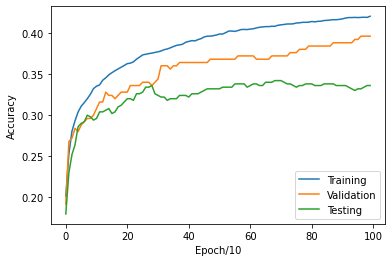

In [12]:
plot_accuracies(t_ac, v_ac, te_ac)


### Try different learning rates and plot graphs for all (20%)


In [14]:
# Initialize the best values
best_weights = weights
best_learning_rate = learning_rate
best_weight_decay = weight_decay
best_v_ac = 0.0

# TODO
# Repeat the above training and evaluation steps for the following learning rates and plot graphs
# You need to try 3 learning rates and submit all 3 graphs along with this notebook pdf to show your learning rate experiments
learning_rates = [0.0001, 0.001, 0.01]
weight_decay = 0.0  # No regularization for now

# FEEL FREE TO EXPERIMENT WITH OTHER VALUES. REPORT OTHER VALUES IF THEY ACHIEVE A BETTER PERFORMANCE

# for lr in learning_rates: Train the classifier and plot data
# Step 1. train_accu, val_accu, test_accu = train(lr, weight_decay)
# Step 2. plot_accuracies(train_accu, val_accu, test_accu)

learning_rate_info = {}

for learning_rate in learning_rates:
    # TODO: Train the classifier with different learning rates and plot
    # pass
    t_ac, v_ac, te_ac, weights = train(learning_rate, weight_decay)
    learning_rate_info[learning_rate] = [t_ac, v_ac, te_ac, weights]
    
    if best_v_ac < max(v_ac):
        best_weights = weights
        best_learning_rate = learning_rate
        best_weight_decay = weight_decay
        best_v_ac = max(v_ac)


  0%|          | 0/100 [00:00<?, ?it/s]

6.933181693106729
Epoch 0, Loss 6.933181693106729
6.823432478988021
6.717701536970414
6.61583915448215
6.51769950917072
6.42314081598912
6.332025437521973
6.244219960899385
6.159595244598504
6.078026438338689


  1%|          | 1/100 [00:03<05:45,  3.49s/it]

5.999392979145726
Epoch 0, Loss 5.999392979145726
5.92357856650278
5.850471119328637
5.779962717334069
5.711949529110847
5.646331729109758
5.583013405467914
5.5219024604549
5.462910505124044
5.405952749581289


  2%|▏         | 2/100 [00:06<05:19,  3.26s/it]

5.35094789012077
Epoch 0, Loss 5.35094789012077
5.297817994324201
5.246488385080667
5.196887524354689
5.148946897413148
5.102600898115558
5.057786715776623
5.014444224024684
4.97251587200356
4.931946578198068


  3%|▎         | 3/100 [00:09<04:51,  3.01s/it]

4.89268362710428
Epoch 0, Loss 4.89268362710428
4.8546765689136775
4.817877122335221
4.782239080640239
4.7477182209813655
4.714272217007966
4.681860554776084
4.650444451930307
4.619986780117858
4.59045199058098


  4%|▍         | 4/100 [00:12<05:02,  3.15s/it]

4.561806042862198
Epoch 0, Loss 4.561806042862198
4.534016336547781
4.507051645967499
4.48088205776323
4.455478911234984
4.4308147413701
4.406863224459763
4.383599126206194
4.360998252223898
4.339037400839053


  5%|▌         | 5/100 [00:16<05:05,  3.22s/it]

4.317694318092285
Epoch 0, Loss 4.317694318092285
4.2969476548517305
4.276776925945297
4.257162471223266
4.238085418464913
4.219527648045424
4.201471759282198
4.1839010383824276
4.166799427916778
4.150151497746857


  6%|▌         | 6/100 [00:18<04:41,  3.00s/it]

4.133942417337086
Epoch 0, Loss 4.133942417337086
4.118157929384452
4.102784324702439
4.08780841829824
4.073217526585044
4.058999445673823
4.045142430691656
4.031635176076032
4.018466796797039
4.005626810461614


  7%|▋         | 7/100 [00:21<04:40,  3.01s/it]

3.99310512025624
Epoch 0, Loss 3.99310512025624
3.980891998686639
3.968978072075012
3.95735430577736
3.946011990085256
3.9349427267782624
3.924138416294835
3.9135912454912383
3.903293675959477


  8%|▊         | 8/100 [00:24<04:20,  2.84s/it]

3.8932384328767653
3.88341849436045
Epoch 0, Loss 3.88341849436045
3.8738270813035993
3.8644576476677606
3.855303871210603
3.8463596446272517
3.8376190670852655
3.829076436134168
3.820726239971476
3.8125631500480606
3.804582013996545


  9%|▉         | 9/100 [00:26<04:12,  2.78s/it]

3.7967778488673
Epoch 0, Loss 3.7967778488673
3.78914583465736
3.781681308118345
3.7743797568301645
3.767236813527966
3.760248250670405
3.7534099752379437
3.746718023750411
3.7401685574936487
3.7337578579455295


 10%|█         | 10/100 [00:28<03:53,  2.59s/it]

3.727482322392161
Epoch 0, Loss 3.727482322392161
3.72133845972551
3.7153228864141443
3.7094323226391928
3.703663588587999
3.698013600898351
3.692479369246473
3.6870579930723473
3.681746658436191
3.676542635000286


 11%|█         | 11/100 [00:31<03:53,  2.62s/it]

3.6714432731305657
Epoch 0, Loss 3.6714432731305657
3.6664460011126847
3.6615483224775454
3.6567478134314504
3.652042120386367
3.6474289575859027
3.6429061048229023
3.638471405244671
3.634122763242107
3.629858142419137


 12%|█▏        | 12/100 [00:34<03:53,  2.65s/it]

3.6256755636390396
Epoch 0, Loss 3.6256755636390396
3.621573103144418
3.617548890747699
3.613601108089204
3.609727986959972
3.6059278076866352
3.602198897575773
3.5985396294152947
3.5949484200305206
3.591423728892679


 13%|█▎        | 13/100 [00:36<03:41,  2.54s/it]

3.5879640567777527
Epoch 0, Loss 3.5879640567777527
3.584567944473566
3.581233971533213
3.5779607550729344
3.5747469486126793
3.5715912409576416
3.5684923551191496
3.565449047273352
3.5624601057562133
3.5595243500933935


 14%|█▍        | 14/100 [00:39<03:44,  2.61s/it]

3.5566406300636517
Epoch 0, Loss 3.5566406300636517
3.55380782479448
3.551024841888702
3.5482906165808585
3.5456041109222425
3.542964312993463
3.5403702361435214
3.537820918254377
3.535315421030052
3.5328528293093333


 15%|█▌        | 15/100 [00:42<03:44,  2.65s/it]

3.5304322504012258
Epoch 0, Loss 3.5304322504012258
3.5280528134422675
3.5257136687749306
3.523413987346308
3.5211529601263423
3.5189297975448994
3.516743728946974
3.514594002065378
3.5124798825102976


 16%|█▌        | 16/100 [00:44<03:43,  2.66s/it]

3.5104006532750742
3.5083556142576637
Epoch 0, Loss 3.5083556142576637
3.5063440817971885
3.504365388225064
3.502418881430166
3.500503924437553
3.4986198950002683
3.496766185203764
3.494942201082488
3.493147362248249
3.491381101529914


 17%|█▋        | 17/100 [00:47<03:54,  2.83s/it]

3.4896428646240705
Epoch 0, Loss 3.4896428646240705
3.48793210975627
3.4862483073524957
3.484590939720489
3.482959500740634
3.48135349556604
3.4797724403315393
3.4782158618712864
3.4766832974446817
3.475174294470332


 18%|█▊        | 18/100 [00:51<04:15,  3.12s/it]

3.473688410267796
Epoch 0, Loss 3.473688410267796
3.4722252118068364
3.470784275463963
3.469365186785991
3.4679675402604198
3.4665909390923852
3.46523499498799
3.463899327943791
3.462583566042267
3.4612873452530457


 19%|█▉        | 19/100 [00:55<04:18,  3.19s/it]

3.4600103092397396
Epoch 0, Loss 3.4600103092397396
3.4587521091721807
3.457512403543912
3.456290857994751
3.4550871451382608
3.4539009443940123
3.45273194182443
3.451579829976136
3.4504443077256113
3.449325080129068


 20%|██        | 20/100 [00:57<03:49,  2.87s/it]

3.448221858276384
Epoch 0, Loss 3.448221858276384
3.4471343591489902
3.4460623054815835
3.445005425627545
3.4439634534279593
3.4429361280841215
3.4419231940334307
3.4409244008285613
3.4399395030198208
3.4389682600405984


 21%|██        | 21/100 [00:59<03:43,  2.82s/it]

3.4380104360958126
Epoch 0, Loss 3.4380104360958126
3.4370658000532632
3.436134125337813
3.43521518982831
3.434308775757161
3.4334146696125036
3.432532662042878
3.4316625477643328
3.430804125469897
3.4299571977413583


 22%|██▏       | 22/100 [01:02<03:37,  2.79s/it]

3.429121570963259
Epoch 0, Loss 3.429121570963259
3.4282970552390735
3.427483464309478
3.4266806154726823
3.4258883295067393
3.425106430593786
3.4243347462461746
3.423573107234417
3.4228213475169165
3.422079304171407


 23%|██▎       | 23/100 [01:05<03:27,  2.70s/it]

3.4213468173280908
Epoch 0, Loss 3.4213468173280908
3.4206237301043965
3.4199098885413255
3.4192051415413367
3.4185093408077476
3.4178223407855732
3.4171439986038075
3.416474174019069
3.4158127293606038
3.4151595294765875


 24%|██▍       | 24/100 [01:08<03:29,  2.76s/it]

3.4145144416817086
Epoch 0, Loss 3.4145144416817086
3.4138773357059837
3.4132480836447856
3.4126265599100414
3.412012641182573
3.4114062063655592
3.4108071365390673
3.4102153149156504
3.4096306267969743
3.4090529595314325


 25%|██▌       | 25/100 [01:10<03:17,  2.64s/it]

3.408482202472749
Epoch 0, Loss 3.408482202472749
3.407918246939526
3.407360986175715
3.4068103153119913
3.406266131328006
3.405728333015493
3.40519682094221
3.4046714974166967
3.4041522664538144
3.403639033741069


 26%|██▌       | 26/100 [01:12<03:08,  2.55s/it]

3.403131706605677
Epoch 0, Loss 3.403131706605677
3.4026301939823753
3.4021344063819345
3.4016442558603783
3.4011596559888817
3.4006805218243237
3.400206769880502
3.3997383180999634
3.399275085826457
3.398816993777988


 27%|██▋       | 27/100 [01:15<03:04,  2.53s/it]

3.398363964020452
Epoch 0, Loss 3.398363964020452
3.3979159199418456
3.397472786227028
3.3970344888330346
3.3966009549649128
3.3961721130520783
3.3957478927251796
3.395328224793452
3.394913041222554
3.394502275112871


 28%|██▊       | 28/100 [01:17<02:57,  2.46s/it]

3.394095860678285
Epoch 0, Loss 3.394095860678285
3.3936937332253803
3.393295829133098
3.3929020858328114
3.392512441788817
3.3921268364792336
3.3917452103773034
3.3913675049330734
3.3909936625554638
3.3906236265946954


 29%|██▉       | 29/100 [01:19<02:51,  2.42s/it]

3.3902573413250963
Epoch 0, Loss 3.3902573413250963
3.389894751928243
3.389535804476462
3.389180445916655
3.3888286240544687
3.388480287538772
3.388135385846458
3.3877938692675533
3.387455688890616
3.3871207965884453


 30%|███       | 30/100 [01:22<02:57,  2.53s/it]

3.386789145004063
Epoch 0, Loss 3.386789145004063
3.3864606875369856
3.3861353783297674
3.385813172254807
3.3854940249014254
3.3851778925631932
3.384864732225513
3.3845545015534437
3.3842471588797656
3.3839426631932823


 31%|███       | 31/100 [01:25<03:00,  2.62s/it]

3.383640974127349
Epoch 0, Loss 3.383640974127349
3.383342051948624
3.383045857546046
3.382752352420019
3.3824614986718076
3.3821732589931446
3.3818875966560373
3.3816044755027552
3.3813238599360385


 32%|███▏      | 32/100 [01:28<03:05,  2.73s/it]

3.381045714909467
3.3807700059180346
Epoch 0, Loss 3.3807700059180346
3.3804966989888885
3.3802257606722548
3.3799571580325285
3.379690858639547
3.3794268305600057
3.379165042349061
3.378905463042071
3.3786480621465076
3.378392809634007


 33%|███▎      | 33/100 [01:30<02:56,  2.63s/it]

3.3781396759325766
Epoch 0, Loss 3.3781396759325766
3.37788863191895
3.3776396489110763
3.37739269866075
3.3771477533463927
3.376904785565946
3.3766637683299074
3.376424675054502
3.376187479554961
3.3759521560389447


 34%|███▍      | 34/100 [01:33<03:02,  2.77s/it]

3.3757186791000664
Epoch 0, Loss 3.3757186791000664
3.3754870237115497
3.3752571652199945
3.375029079339257
3.374802742144442
3.3745781300660065
3.3743552198839617
3.3741339887221904
3.373914414042861
3.3736964736409414


 35%|███▌      | 35/100 [01:37<03:16,  3.02s/it]

3.3734801456388115
Epoch 0, Loss 3.3734801456388115
3.3732654084809788
3.373052240928877
3.3728406220557656
3.372630531241722
3.3724219481687134
3.3722148528157625
3.372009225454202
3.3718050466430025
3.3716022972241926


 36%|███▌      | 36/100 [01:40<03:16,  3.07s/it]

3.3714009583183575
Epoch 0, Loss 3.3714009583183575
3.3712010113202093
3.371002437894248
3.370805219970485
3.3706093397402483
3.3704147796520645
3.3702215224076006
3.3700295509576907
3.3698388484984187
3.3696493984672746


 37%|███▋      | 37/100 [01:44<03:19,  3.17s/it]

3.3694611845393814
Epoch 0, Loss 3.3694611845393814
3.3692741906237753
3.3690884008597664
3.368903799613342
3.3687203714736476
3.368538101249524
3.368356973966097
3.3681769748614308
3.3679980893832444
3.3678203031856664


 38%|███▊      | 38/100 [01:47<03:23,  3.28s/it]

3.367643602126063
Epoch 0, Loss 3.367643602126063
3.367467972261909
3.367293399847716
3.3671198713320067
3.3669473733543516
3.3667758927424427
3.36660541650922
3.3664359318500545
3.366267426139968
3.366099886930899


 39%|███▉      | 39/100 [01:51<03:25,  3.36s/it]

3.3659333019490245
Epoch 0, Loss 3.3659333019490245
3.3657676590921186
3.365602946426949
3.365439152186733
3.365276264768619
3.3651142727312235
3.364953164792194
3.3647929298258257
3.3646335568607117
3.364475035077427


 40%|████      | 40/100 [01:53<03:06,  3.10s/it]

3.3643173538062547
Epoch 0, Loss 3.3643173538062547
3.3641605025249617
3.364004470856579
3.3638492485672535
3.3636948255641124
3.3635411918931695
3.363388337737261
3.3632362534140294
3.363084929373915
3.362934356198203


 41%|████      | 41/100 [01:56<02:54,  2.95s/it]

3.36278452459709
Epoch 0, Loss 3.36278452459709
3.3626354254077833
3.362487049592633
3.362339388237292
3.3621924325489063
3.3620461738543352
3.3619006035983974
3.361755713342145
3.361611494761168
3.3614679396439264


 42%|████▏     | 42/100 [01:59<02:46,  2.87s/it]

3.3613250398901
Epoch 0, Loss 3.3613250398901
3.3611827875089753
3.361041174617855
3.3609001934404827
3.360759836305509
3.360620095644968
3.360480963992787
3.360342433983308
3.3602044983498507
3.3600671499232786


 43%|████▎     | 43/100 [02:02<02:53,  3.04s/it]

3.3599303816305954
Epoch 0, Loss 3.3599303816305954
3.3597941864935725
3.3596585576273785
3.3595234882392493
3.359388971627164
3.3592550011785507
3.3591215703690085
3.35898867276105
3.358856302002862
3.358724451827087


 44%|████▍     | 44/100 [02:05<02:57,  3.16s/it]

3.3585931160496245
Epoch 0, Loss 3.3585931160496245
3.358462288568444
3.358331963362428
3.3582021344902198
3.3580727960891
3.357943942373869
3.3578155676357597
3.3576876662413553
3.3575602326315304
3.3574332613204034


 45%|████▌     | 45/100 [02:09<03:08,  3.43s/it]

3.3573067468943076
Epoch 0, Loss 3.3573067468943076
3.3571806840107814
3.357055067397564
3.3569298918516166
3.3568051522381497
3.356680843489675
3.3565569606050603
3.3564334986486095
3.356310452749143
3.3561878180991096


 46%|████▌     | 46/100 [02:12<02:55,  3.24s/it]

3.3560655899536944
Epoch 0, Loss 3.3560655899536944
3.355943763629949
3.355822334505941
3.3557012980198935
3.3555806496693674
3.3554603850104323
3.35534049965686
3.3552209892793305
3.3551018496046425
3.3549830764149458


 47%|████▋     | 47/100 [02:15<02:44,  3.11s/it]

3.3548646655469776
Epoch 0, Loss 3.3548646655469776
3.354746612891312
3.35462891439162
3.354511566043943
3.354394563895975
3.354277904046355
3.3541615826439672
3.3540455958872637
3.3539299400235754
3.353814611348455


 48%|████▊     | 48/100 [02:18<02:41,  3.11s/it]

3.353699606205019
Epoch 0, Loss 3.353699606205019
3.3535849209832937
3.3534705521195867
3.353356496095851
3.353242749439068
3.3531293087206397
3.3530161705557817
3.352903331602936
3.3527907885631834
3.352678538179665


 49%|████▉     | 49/100 [02:21<02:33,  3.02s/it]

3.3525665772370217
Epoch 0, Loss 3.3525665772370217
3.3524549025608263
3.352343511017044
3.3522323995114727
3.3521215649892215
3.3520110044341753
3.3519007148684783
3.3517906933520156
3.3516809369819147
3.351571442892041


 50%|█████     | 50/100 [02:24<02:30,  3.02s/it]

3.3514622082525096
Epoch 0, Loss 3.3514622082525096
3.351353230269202
3.3512445061832827
3.3511360332707376
3.3510278088419008
3.350919830241005
3.3508120948457254
3.3507046000667375
3.3505973433472764


 51%|█████     | 51/100 [02:27<02:25,  2.97s/it]

3.35049032216271
3.3503835340201062
Epoch 0, Loss 3.3503835340201062
3.350276976457819
3.3501706470450703
3.350064543381541
3.349958663096976
3.3498530038507774
3.349747563331618
3.3496423392570565
3.349537329373156
3.349432531454108


 52%|█████▏    | 52/100 [02:30<02:24,  3.01s/it]

3.3493279433018617
Epoch 0, Loss 3.3493279433018617
3.349223562745763
3.349119387642191
3.3490154158742045
3.348911645351195
3.348808074008536
3.3487046998072505
3.3486015207336672
3.348498534799097
3.3483957400395044


 53%|█████▎    | 53/100 [02:33<02:15,  2.87s/it]

3.3482931345151825
Epoch 0, Loss 3.3482931345151825
3.348190716310441
3.348088483533291
3.347986434315135
3.3478845668104666
3.3477828791965645
3.3476813696732046
3.3475800364623605
3.3474788778079168
3.347377891975392


 54%|█████▍    | 54/100 [02:36<02:16,  2.97s/it]

3.3472770772516487
Epoch 0, Loss 3.3472770772516487
3.3471764319446273
3.3470759543830613
3.3469756429162207
3.3468754959136393
3.346775511764857
3.3466756888791602
3.3465760256853274
3.3464765206313776
3.3463771721843245


 55%|█████▌    | 55/100 [02:39<02:13,  2.97s/it]

3.346277978829933
Epoch 0, Loss 3.346277978829933
3.3461789390724737
3.3460800514344915
3.3459813144565635
3.345882726697078
3.345784286731998
3.3456859931546346
3.3455878445754377
3.3454898396217616
3.345391976937659


 56%|█████▌    | 56/100 [02:42<02:10,  2.97s/it]

3.345294255183662
Epoch 0, Loss 3.345294255183662
3.345196673036578
3.345099229189276
3.3450019223504848
3.3449047512445893
3.344807714611435
3.344710811206129
3.344614039798845
3.344517399174633


 57%|█████▋    | 57/100 [02:44<02:01,  2.83s/it]

3.344420888133229
3.344324505488873
Epoch 0, Loss 3.344324505488873
3.344228250070121
3.344132120719663
3.344036116294149
3.3439402356640073
3.3438444777132714
3.3437488413394125
3.343653325453162
3.34355792897835
3.343462650851739


 58%|█████▊    | 58/100 [02:48<02:08,  3.07s/it]

3.343367490022859
Epoch 0, Loss 3.343367490022859
3.3432724454538483
3.3431775161192956
3.3430827010060793
3.3429879991132188
3.3428934094517158
3.342798931044409
3.342704562925821
3.3426103041420174
3.342516153750456


 59%|█████▉    | 59/100 [02:51<02:12,  3.22s/it]

3.3424221108198466
Epoch 0, Loss 3.3424221108198466
3.342328174430012
3.3422343436717443
3.3421406176466744
3.3420469954671304
3.341953476256003
3.341860059146622
3.341766743282619
3.341673527817797
3.3415804119160124


 60%|██████    | 60/100 [02:54<02:07,  3.19s/it]

3.341487394751041
Epoch 0, Loss 3.341487394751041
3.341394475506461
3.3413016533755235
3.3412089275610404
3.3411162972752626
3.3410237617397573
3.340931320185301
3.3408389718517584
3.3407467159879745
3.34065455185166


 61%|██████    | 61/100 [02:57<02:02,  3.13s/it]

3.340562478709285
Epoch 0, Loss 3.340562478709285
3.3404704958359632
3.3403786025153535
3.340286798039549
3.3401950817089747
3.340103452832286
3.340011910726262
3.3399204547157098
3.339829084133363
3.3397377983197853


 62%|██████▏   | 62/100 [03:00<01:55,  3.03s/it]

3.339646596623277
Epoch 0, Loss 3.339646596623277
3.3395554783997703
3.3394644430127456
3.3393734898331315
3.339282618239218
3.339191827616564
3.339101117357906
3.3390104868630734
3.3389199355388985
3.3388294627991333


 63%|██████▎   | 63/100 [03:04<01:55,  3.12s/it]

3.338739068064363
Epoch 0, Loss 3.338739068064363
3.3386487507619207
3.3385585103258086
3.3384683461966134
3.338378257821428
3.338288244653766
3.338198306153492
3.3381084417867375
3.338018651025827
3.3379289333492017


 64%|██████▍   | 64/100 [03:08<02:06,  3.50s/it]

3.3378392882413443
Epoch 0, Loss 3.3378392882413443
3.3377497151927065
3.3376602136996336
3.337570783264298
3.3374814233946215
3.337392133604212
3.3373029134122874
3.3372137623436116
3.33712467992843
3.337035665702393


 65%|██████▌   | 65/100 [03:11<01:56,  3.32s/it]

3.3369467192065008
Epoch 0, Loss 3.3369467192065008
3.3368578399870343
3.3367690275954853
3.3366802815885075
3.3365916015278376
3.336502986980245
3.336414437517465
3.336325952716143
3.33623753215777
3.3361491754286305


 66%|██████▌   | 66/100 [03:14<01:51,  3.28s/it]

3.3360608821197357
Epoch 0, Loss 3.3360608821197357
3.335972651826776
3.3358844841500557
3.335796378694446
3.3357083350693206
3.335620352888507
3.335532431770236
3.335444571337078
3.3353567712159014


 67%|██████▋   | 67/100 [03:17<01:42,  3.11s/it]

3.335269031037814
3.3351813504381167
Epoch 0, Loss 3.3351813504381167
3.335093729056247
3.3350061665357367
3.3349186625241565
3.33483121667307
3.3347438286379854
3.3346564980783095
3.3345692246572973
3.3344820080420106
3.3343948479032655


 68%|██████▊   | 68/100 [03:20<01:37,  3.05s/it]

3.334307743915597
Epoch 0, Loss 3.334307743915597
3.3342206957572045
3.334133703109914
3.334046765659134
3.33395988309381
3.333873055106384
3.3337862813927535
3.333699561652227
3.3336128955874877
3.3335262829045478


 69%|██████▉   | 69/100 [03:23<01:34,  3.03s/it]

3.3334397233127144
Epoch 0, Loss 3.3334397233127144
3.333353216524547
3.3332667622558154
3.3331803602254713
3.333094010155598
3.3330077117713817
3.3329214648010734
3.332835268975948
3.3327491240302733
3.33266302970127


 70%|███████   | 70/100 [03:26<01:33,  3.12s/it]

3.332576985729082
Epoch 0, Loss 3.332576985729082
3.332490991856735
3.332405047830107
3.3323191533978935
3.3322333083115723
3.3321475123253723
3.3320617651962414
3.33197606668381
3.3318904165503644
3.331804814560812


 71%|███████   | 71/100 [03:30<01:34,  3.25s/it]

3.3317192604826515
Epoch 0, Loss 3.3317192604826515
3.3316337540859418
3.3315482951432713
3.331462883429729
3.331377518722875
3.3312922008027086
3.3312069294516413
3.33112170445447
3.3310365255983467
3.3309513926727496


 72%|███████▏  | 72/100 [03:34<01:43,  3.69s/it]

3.3308663054694585
Epoch 0, Loss 3.3308663054694585
3.330781263782525
3.3306962674082476
3.330611316145143
3.330526409793923
3.3304415481574674
3.330356731040794
3.3302719582510423
3.3301872295974393
3.3301025448912798


 73%|███████▎  | 73/100 [03:37<01:30,  3.33s/it]

3.330017903945905
Epoch 0, Loss 3.330017903945905
3.329933306576671
3.329848752600929
3.329764241838003
3.3296797741091644
3.329595349237611
3.3295109670484404
3.3294266273686346
3.3293423300270297
3.329258074854302


 74%|███████▍  | 74/100 [03:39<01:21,  3.14s/it]

3.3291738616829405
Epoch 0, Loss 3.3291738616829405
3.3290896903472262
3.3290055606832167
3.3289214725287173
3.3288374257232674
3.328753420108116
3.3286694555262017
3.328585531822136
3.328501648842182
3.3284178064342327


 75%|███████▌  | 75/100 [03:42<01:15,  3.04s/it]

3.328334004447797
Epoch 0, Loss 3.328334004447797
3.3282502427339753
3.328166521145444
3.3280828395364392
3.3279991977627317
3.327915595681617
3.327832033151891
3.3277485100338366
3.327665026189205
3.327581581481197


 76%|███████▌  | 76/100 [03:46<01:15,  3.15s/it]

3.3274981757744495
Epoch 0, Loss 3.3274981757744495
3.327414808935015
3.3273314808303485
3.3272481913292893
3.3271649403020427
3.3270817276201705
3.326998553156569
3.3269154167854555
3.326832318382354
3.326749257824078


 77%|███████▋  | 77/100 [03:49<01:14,  3.23s/it]

3.3266662349887177
Epoch 0, Loss 3.3266662349887177
3.3265832497556236
3.3265003020053934
3.326417391619853
3.3263345184820508
3.326251682476234
3.3261688834878407
3.3260861214034843
3.326003396110942
3.325920707499135


 78%|███████▊  | 78/100 [03:52<01:07,  3.06s/it]

3.325838055458122
Epoch 0, Loss 3.325838055458122
3.3257554398790847
3.3256728606543127
3.3255903176771895
3.3255078108421836
3.3254253400448355
3.325342905181741
3.3252605061505456
3.3251781428499267


 79%|███████▉  | 79/100 [03:55<01:07,  3.19s/it]

3.325095815179583
3.3250135230402247
Epoch 0, Loss 3.3250135230402247
3.3249312663335595
3.324849044962285
3.3247668588300696
3.3246847078415507
3.324602591902316
3.324520510918896
3.324438464798753
3.32435645345027
3.324274476782739


 80%|████████  | 80/100 [03:58<00:59,  2.95s/it]

3.324192534706353
Epoch 0, Loss 3.324192534706353
3.3241106271321925
3.324028753972217
3.3239469151392553
3.323865110546996
3.3237833401099746
3.3237016037435665
3.3236199013639767
3.3235382328882306
3.3234565982341624


 81%|████████  | 81/100 [04:00<00:53,  2.82s/it]

3.3233749973204083
Epoch 0, Loss 3.3233749973204083
3.3232934300663968
3.3232118963923396
3.323130396219221
3.32304892946879
3.322967496063553
3.3228860959267648
3.3228047289824167
3.3227233951552306


 82%|████████▏ | 82/100 [04:03<00:49,  2.76s/it]

3.322642094370653
3.3225608265548416
Epoch 0, Loss 3.3225608265548416
3.322479591634661
3.3223983895376734
3.3223172201921285
3.322236083526961
3.3221549794717764
3.3220739079568493
3.3219928689131093
3.321911862272139
3.3218308879661653


 83%|████████▎ | 83/100 [04:06<00:49,  2.92s/it]

3.321749945928049
Epoch 0, Loss 3.321749945928049
3.3216690360912824
3.3215881583899765
3.32150731275886
3.321426499133267
3.3213457174491334
3.3212649676429886
3.3211842496519473
3.3211035634137094
3.3210229088665426


 84%|████████▍ | 84/100 [04:09<00:46,  2.89s/it]

3.320942285949286
Epoch 0, Loss 3.320942285949286
3.3208616946013354
3.320781134762647
3.3207006063737197
3.3206201093755947
3.320539643709852
3.320459209318598
3.320378806144465
3.3202984341306
3.320218093220664


 85%|████████▌ | 85/100 [04:12<00:43,  2.89s/it]

3.320137783358823
Epoch 0, Loss 3.320137783358823
3.320057504489743
3.3199772565585848
3.319897039510998
3.3198168532931147
3.3197366978515457
3.319656573133373
3.319576479086147
3.3194964156578792
3.319416382797037


 86%|████████▌ | 86/100 [04:15<00:40,  2.92s/it]

3.319336380452539
Epoch 0, Loss 3.319336380452539
3.319256408573753
3.3191764671104815
3.319096556012971
3.3190166752318935
3.3189368247183473
3.318857004423857
3.318777214300359
3.318697454300205
3.3186177243761517


 87%|████████▋ | 87/100 [04:18<00:37,  2.91s/it]

3.3185380244813594
Epoch 0, Loss 3.3185380244813594
3.318458354569387
3.318378714594186
3.3182991045100994
3.3182195242718526
3.318139973834552
3.3180604531536835
3.317980962185099
3.3179015008850237
3.3178220692100426


 88%|████████▊ | 88/100 [04:20<00:34,  2.85s/it]

3.3177426671171037
Epoch 0, Loss 3.3177426671171037
3.3176632945635083
3.317583951506908
3.317504637905304
3.317425353717043
3.317346098900807
3.317266873415618
3.3171876772208266
3.3171085102761135
3.3170293725414863


 89%|████████▉ | 89/100 [04:24<00:32,  2.98s/it]

3.31695026397727
Epoch 0, Loss 3.31695026397727
3.316871184544109
3.3167921342029625
3.3167131129150986
3.316634120642092
3.316555157345823
3.31647622298847
3.316397317532509
3.316318440940711
3.316239593176132


 90%|█████████ | 90/100 [04:26<00:29,  2.93s/it]

3.316160774202121
Epoch 0, Loss 3.316160774202121
3.316081983982308
3.3160032224806026
3.3159244896611937
3.3158457854885426
3.3157671099273833
3.3156884629427172
3.315609844499811
3.3155312545641946
3.3154526931016557


 91%|█████████ | 91/100 [04:29<00:26,  2.90s/it]

3.315374160078237
Epoch 0, Loss 3.315374160078237
3.315295655460241
3.3152171792142147
3.315138731306954
3.3150603117055013
3.314981920377143
3.3149035572894014
3.314825222410039
3.314746915707051
3.3146686371486664


 92%|█████████▏| 92/100 [04:32<00:22,  2.83s/it]

3.314590386703341
Epoch 0, Loss 3.314590386703341
3.314512164339758
3.314433970026826
3.3143558037336756
3.3142776654296533
3.3141995550843264
3.3141214726674737
3.3140434181490894
3.3139653914993725
3.3138873926887347


 93%|█████████▎| 93/100 [04:35<00:20,  2.97s/it]

3.3138094216877896
Epoch 0, Loss 3.3138094216877896
3.3137314784673517
3.313653562998442
3.3135756752522743
3.3134978152002623
3.31341998281401
3.3133421780653167
3.31326440092617
3.313186651368745
3.3131089293654012


 94%|█████████▍| 94/100 [04:39<00:18,  3.13s/it]

3.3130312348886846
Epoch 0, Loss 3.3130312348886846
3.312953567911321
3.3128759284062137
3.312798316346449
3.312720731705282
3.312643174456146
3.312565644572644
3.3124881420285517
3.312410666797809
3.3123332188545227


 95%|█████████▌| 95/100 [04:42<00:15,  3.18s/it]

3.3122557981729663
Epoch 0, Loss 3.3122557981729663
3.312178404727575
3.312101038492941
3.312023699443821
3.3119463875551265
3.311869102801923
3.311791845159432
3.3117146146030256
3.3116374111082263
3.311560234650709


 96%|█████████▌| 96/100 [04:46<00:13,  3.40s/it]

3.3114830852062895
Epoch 0, Loss 3.3114830852062895
3.3114059627509342
3.3113288672607526
3.3112517987119947
3.311174757081052
3.3110977423444568
3.3110207544788777
3.310943793461121
3.310866859268126
3.3107899518769663


 97%|█████████▋| 97/100 [04:49<00:09,  3.25s/it]

3.3107130712648476
Epoch 0, Loss 3.3107130712648476
3.3106362174091064
3.310559390287206
3.3104825898767407
3.3104058161554297
3.310329069101116
3.3102523486917663
3.310175654905471
3.3100989877204405
3.310022347115005


 98%|█████████▊| 98/100 [04:51<00:05,  2.94s/it]

3.309945733067613
Epoch 0, Loss 3.309945733067613
3.309869145556829
3.3097925845613347
3.3097160500599254
3.3096395420315097
3.3095630604551096
3.3094866053098553
3.309410176574989
3.3093337742298594
3.3092573982539255


 99%|█████████▉| 99/100 [04:54<00:02,  2.89s/it]

3.309181048626749
Epoch 0, Loss 3.309181048626749
3.3091047253279986
3.309028428337446
3.308952157634966
3.3088759132005356
3.308799695014231
3.3087235030562296
3.3086473373068053
3.308571197746333
3.3084950843552776


  0%|          | 0/100 [00:00<?, ?it/s]

6.931534815935584
Epoch 0, Loss 6.931534815935584
5.926292003548394
5.25304361000745
4.7923768848017145
4.4684397050810345
4.234397050481829
4.061100855783728
3.9299967231746065
3.8289499606189605
3.749806392373473


  1%|          | 1/100 [00:03<06:02,  3.66s/it]

3.6869457396882703
Epoch 0, Loss 3.6869457396882703
3.636403696460181
3.595325405285082
3.5616165203743937
3.533715002338795
3.510438497039197
3.4908801420518687
3.4743360811628032
3.460254161337787
3.4481970457338322


  2%|▏         | 2/100 [00:06<05:03,  3.10s/it]

3.4378153070468063
Epoch 0, Loss 3.4378153070468063
3.4288275400929913
3.4210054833233055
3.4141627629825417
3.4081462899869055
3.4028296217110117
3.3981077947957683
3.393893270181196
3.390112726863284
3.386704508886664


  3%|▎         | 3/100 [00:08<04:38,  2.87s/it]

3.3836165791603867
Epoch 0, Loss 3.3836165791603867
3.3808048694608517
3.3782319423204674
3.37586590006163
3.373679490889818
3.3716493730268486
3.369755506287231
3.367980646955827
3.3663099268066037
3.364730500971482


  4%|▍         | 4/100 [00:11<04:28,  2.80s/it]

3.3632312523920027
Epoch 0, Loss 3.3632312523920027
3.361802542963253
3.360436003358032
3.35912435501183
3.3578612589410732
3.356641187023431
3.355459312139828
3.354311414201729
3.353193799594632
3.3521032319825674


  5%|▌         | 5/100 [00:14<04:19,  2.73s/it]

3.351036872757637
Epoch 0, Loss 3.351036872757637
3.3499922296973894
3.348967112622982
3.347959595041424
3.3469679809134236
3.345990775820071
3.3450266619116396
3.3440744761139984
3.3431331911455398
3.3422018989628097


  6%|▌         | 6/100 [00:16<04:02,  2.58s/it]

3.3412797963080156
Epoch 0, Loss 3.3412797963080156
3.3403661720782227
3.339460396275561
3.338561910331341
3.3376702186255978
3.3367848810479797
3.3359055064667977
3.335031746990926
3.3341632929245653
3.3332998683281243


  7%|▋         | 7/100 [00:19<04:06,  2.65s/it]

3.3324412271097783
Epoch 0, Loss 3.3324412271097783
3.3315871495820883
3.330737439426512
3.329891921015954
3.3290504370518175
3.328212846477547
3.3273790226353808
3.326548851637201
3.325722230923948
3.3248990679912547


  8%|▊         | 8/100 [00:22<04:22,  2.86s/it]

3.3240792792616247
Epoch 0, Loss 3.3240792792616247
3.3232627890859434
3.3224495288591345
3.3216394362366573
3.3208324544400893
3.3200285316414844
3.31922762041738
3.318429677264452
3.3176346621697204
3.3168425382290576


  9%|▉         | 9/100 [00:25<04:07,  2.71s/it]

3.3160532713085007
Epoch 0, Loss 3.3160532713085007
3.3152668297434658
3.3144831840715803
3.313702306795308
3.312924172171012
3.3121487560214535
3.3113760355691113
3.310605989287961
3.3098385967716633
3.3090738386163054


 10%|█         | 10/100 [00:27<04:02,  2.69s/it]

3.308311696316085
Epoch 0, Loss 3.308311696316085
3.307552152170495
3.3067951892017047
3.306040791081039
3.3052889420635156
3.3045396269295635
3.3037928309331237
3.303048539755424
3.302306739463806
3.3015674164750455


 11%|█         | 11/100 [00:31<04:31,  3.05s/it]

3.300830557522663
Epoch 0, Loss 3.300830557522663
3.300096149627808
3.2993641800732907
3.2986346363804464
3.2979075062885044
3.2971827777361957
3.2964604388453393
3.2957404779062163
3.2950228833645054
3.2943076438096366


 12%|█▏        | 12/100 [00:35<04:59,  3.40s/it]

3.293594747964393
Epoch 0, Loss 3.293594747964393
3.2928841846756245
3.292175942905954
3.2914700117263784
3.290766380309647
3.2900650379243475
3.2893659739296166
3.288669177770411
3.2879746389732727
3.287282347142535


 13%|█▎        | 13/100 [00:39<04:51,  3.35s/it]

3.2865922919569277
Epoch 0, Loss 3.2865922919569277
3.2859044631665326
3.285218850590051
3.2845354441123487
3.2838542336822547
3.2831752093105813
3.282498361068331
3.281823679085096
3.2811511535476012
3.2804807746983955


 14%|█▍        | 14/100 [00:42<04:43,  3.29s/it]

3.279812532834659
Epoch 0, Loss 3.279812532834659
3.279146418307131
3.2784824215191266
3.277820532925654
3.277160743032593
3.27650304239596
3.275847421621224
3.275193871362686
3.274542382322897
3.273892945252134


 15%|█▌        | 15/100 [00:44<04:22,  3.09s/it]

3.273245550947903
Epoch 0, Loss 3.273245550947903
3.2726001902544826
3.271956854062496
3.271315533308514
3.2706762189746783
3.270038902088353
3.2694035737217813
3.268770224991784
3.268138847059444
3.2675094311298305


 16%|█▌        | 16/100 [00:47<04:14,  3.03s/it]

3.2668819684517185
Epoch 0, Loss 3.2668819684517185
3.2662564503173246
3.2656328680620565
3.265011213064264
3.264391476745
3.2637736505677934
3.26315772603842
3.262543694704684
3.2619315481562032
3.2613212780241967


 17%|█▋        | 17/100 [00:50<04:07,  2.99s/it]

3.260712875981281
Epoch 0, Loss 3.260712875981281
3.260106333741265
3.2595016430589454
3.2588987957299183
3.258297783590374
3.2576985985169107
3.2571012324263413
3.256505677275502
3.255911925061068
3.255319967819368


 18%|█▊        | 18/100 [00:53<03:52,  2.84s/it]

3.254729797626193
Epoch 0, Loss 3.254729797626193
3.2541414065966197
3.2535547868848247
3.252969930683903
3.252386830225689
3.251805477780575
3.251225865657332
3.250647986202933
3.250071831802377
3.249497394878506


 19%|█▉        | 19/100 [00:55<03:51,  2.86s/it]

3.248924667891838
Epoch 0, Loss 3.248924667891838
3.2483536433403835
3.247784313759475
3.247216671721591
3.2466507098361834
3.2460864207495015
3.245523797144423
3.244962831740278
3.244403517292682
3.2438458465933597


 20%|██        | 20/100 [00:59<04:06,  3.08s/it]

3.2432898124699774
Epoch 0, Loss 3.2432898124699774
3.2427354077859687
3.242182625440373
3.241631458367658
3.2410818995375528
3.240533941954883
3.239987578659399
3.23944280272561
3.238899607262619
3.238357985413954


 21%|██        | 21/100 [01:01<03:48,  2.89s/it]

3.2378179303574015
Epoch 0, Loss 3.2378179303574015
3.237279435304845
3.236742493502097
3.236207098228733
3.235673242797932
3.2351409205563115
3.2346101248837633
3.2340808491932926
3.233553086930855
3.2330268315751964


 22%|██▏       | 22/100 [01:04<03:42,  2.85s/it]

3.232502076637693
Epoch 0, Loss 3.232502076637693
3.231978815662187
3.231457042224832
3.2309367499339308
3.2304179324297775
3.2299005833844996
3.2293846965019006
3.2288702655173025
3.228357284197389
3.22784574634005


 23%|██▎       | 23/100 [01:07<03:39,  2.85s/it]

3.227335645774227
Epoch 0, Loss 3.227335645774227
3.226826976359759
3.2263197319872234
3.2258139065777893
3.2253094940830596
3.2248064884849197
3.224304883795386
3.223804674056453
3.2233058533399475
3.22280841574737


 24%|██▍       | 24/100 [01:10<03:34,  2.82s/it]

3.2223123554097506
Epoch 0, Loss 3.2223123554097506
3.2218176664875
3.221324343170259
3.2208323796767515
3.2203417702546364
3.219852509180362
3.2193645907590187
3.2188780093241935
3.218392759237827
3.2179088348900637


 25%|██▌       | 25/100 [01:12<03:17,  2.64s/it]

3.217426230699116
Epoch 0, Loss 3.217426230699116
3.2169449411111124
3.216464960599962
3.215986283667208
3.2155089048418857
3.2150328186803883
3.2145580197663155
3.214084502710346
3.2136122621500878
3.213141292749945


 26%|██▌       | 26/100 [01:15<03:16,  2.65s/it]

3.2126715892009794
Epoch 0, Loss 3.2126715892009794
3.212203146220774
3.2117359585532905
3.2112700209687417
3.2108053282634503
3.2103418752597137
3.209879656805673
3.209418667775175
3.2089589030676433
3.2085003576079405


 27%|██▋       | 27/100 [01:19<03:41,  3.03s/it]

3.208043026346243
Epoch 0, Loss 3.208043026346243
3.2075869042579015
3.207131986343316
3.2066782676278036
3.206225743161469
3.205774408019073
3.20532425729991
3.2048752861276713
3.204427489650325
3.2039808630399875


 28%|██▊       | 28/100 [01:21<03:26,  2.87s/it]

3.2035354014927937
Epoch 0, Loss 3.2035354014927937
3.203091100228777
3.2026479544917392
3.202205959549128
3.2017651106919156
3.201325403234469
3.200886832514435
3.2004493938926126
3.2000130827528315


 29%|██▉       | 29/100 [01:23<03:11,  2.70s/it]

3.199577894501835
3.199143824569156
Epoch 0, Loss 3.199143824569156
3.198710868406998
3.1982790214901167
3.1978482793157
3.197418637403249
3.1969900912944653
3.1965626365531272
3.196136268764976
3.195710983537604
3.195286776500332


 30%|███       | 30/100 [01:26<03:15,  2.79s/it]

3.1948636433041
Epoch 0, Loss 3.1948636433041
3.19444157962135
3.1940205811459137
3.193600643592899
3.193181762698578
3.1927639342202725
3.1923471539362467
3.1919314176455926
3.1915167211681204
3.191103060344251


 31%|███       | 31/100 [01:30<03:24,  2.97s/it]

3.1906904310349034
Epoch 0, Loss 3.1906904310349034
3.1902788291213877
3.1898682505052975
3.1894586911084004
3.1890501468725323
3.1886426137594897
3.188236087750925
3.1878305648482397
3.1874260410724804
3.187022512464235


 32%|███▏      | 32/100 [01:33<03:18,  2.92s/it]

3.1866199750835236
Epoch 0, Loss 3.1866199750835236
3.186218425009704
3.1858178583413608
3.1854182711962067
3.185019659710981
3.184622020041346
3.184225348361789
3.1838296408655187
3.183434893764369
3.1830411032886965


 33%|███▎      | 33/100 [01:35<03:11,  2.86s/it]

3.1826482656872845
Epoch 0, Loss 3.1826482656872845
3.182256377227243
3.181865434193911
3.181475432890759
3.1810863696392944
3.1806982407789643
3.1803110426670553
3.1799247716786074
3.179539424206309
3.1791549966604125


 34%|███▍      | 34/100 [01:38<03:03,  2.78s/it]

3.1787714854686313
Epoch 0, Loss 3.1787714854686313
3.1783888870760535
3.1780071979450457
3.1776264145551614
3.1772465334030495
3.1768675510023625
3.1764894638836654
3.176112268594346
3.175735961698528
3.1753605397769706


 35%|███▌      | 35/100 [01:41<03:08,  2.90s/it]

3.1749859994269944
Epoch 0, Loss 3.1749859994269944
3.174612337262383
3.174239549913299
3.173867634026192
3.1734965862637186
3.173126403304648
3.172757081843783
3.1723886185918686
3.1720210102755106
3.171654253637089


 36%|███▌      | 36/100 [01:44<02:59,  2.81s/it]

3.171288345434672
Epoch 0, Loss 3.171288345434672
3.1709232824419367
3.170559061448082
3.1701956792577444
3.16983313269092
3.1694714185828805
3.169110533784088
3.1687504751601194
3.1683912395915828
3.1680328239740345


 37%|███▋      | 37/100 [01:47<02:59,  2.84s/it]

3.167675225217903
Epoch 0, Loss 3.167675225217903
3.167318440248411
3.166962466005491
3.1666072994437093
3.1662529375321875
3.1658993772545254
3.1655466156087244
3.1651946496071064
3.164843476276244
3.1644930926568753


 38%|███▊      | 38/100 [01:50<02:59,  2.89s/it]

3.1641434958038386
Epoch 0, Loss 3.1641434958038386
3.163794682785988
3.163446650686123
3.163099396600917
3.1627529176408338
3.162407210930063
3.1620622736064448
3.1617181028213914
3.1613746957398217
3.1610320495400868


 39%|███▉      | 39/100 [01:53<03:03,  3.01s/it]

3.1606901614138954
Epoch 0, Loss 3.1606901614138954
3.1603490285662477
3.1600086482153587
3.1596690175925946
3.159330133942395
3.158991994522209
3.1586545966024215
3.15831793746629
3.15798201440987
3.1576468247419487


 40%|████      | 40/100 [01:56<02:55,  2.92s/it]

3.15731236578398
Epoch 0, Loss 3.15731236578398
3.156978634870012
3.156645629346624
3.156313346572859
3.1559817839201543
3.15565093877228
3.1553208085252704
3.154991390587359
3.1546626823789135
3.1543346813323745


 41%|████      | 41/100 [01:58<02:50,  2.88s/it]

3.1540073848921857
Epoch 0, Loss 3.1540073848921857
3.153680790514735
3.153354895668286
3.1530296978329213
3.1527051945004736
3.152381383174467
3.152058261370053
3.1517358266139515
3.151414076444383
3.151093008411016


 42%|████▏     | 42/100 [02:02<03:01,  3.13s/it]

3.150772620074902
Epoch 0, Loss 3.150772620074902
3.150452909008411
3.15013387279518
3.149815509030047
3.1494978153189943
3.1491807892790877
3.148864428538419
3.148548730736047
3.1482336935219424
3.1479193145569213


 43%|████▎     | 43/100 [02:05<02:55,  3.07s/it]

3.1476055915126
Epoch 0, Loss 3.1476055915126
3.1472925220713295
3.1469801039261376
3.14666833478068
3.1463572123491783
3.1460467343563656
3.14573689853743
3.145427702637961
3.145119144413895
3.1448112216314565


 44%|████▍     | 44/100 [02:08<02:43,  2.92s/it]

3.144503932067111
Epoch 0, Loss 3.144503932067111
3.1441972735075012
3.143891243749406
3.1435858405996733
3.1432810618751783
3.142976905402762
3.1426733690191853
3.142370450571074
3.142068147914865
3.141766458916758


 45%|████▌     | 45/100 [02:13<03:13,  3.51s/it]

3.1414653814526625
Epoch 0, Loss 3.1414653814526625
3.1411649134081463
3.140865052678387
3.1405657971681165
3.1402671447915784
3.1399690934724696
3.1396716411438983
3.1393747857483283
3.1390785252375357
3.1387828575725525


 46%|████▌     | 46/100 [02:15<02:58,  3.31s/it]

3.1384877807236276
Epoch 0, Loss 3.1384877807236276
3.1381932926701706
3.1378993914007074
3.1376060749128323
3.137313341213157
3.1370211883172727
3.13672961424969
3.1364386170438032
3.1361481947418373
3.1358583453948055


 47%|████▋     | 47/100 [02:18<02:45,  3.12s/it]

3.135569067062464
Epoch 0, Loss 3.135569067062464
3.1352803578132593
3.1349922157242927
3.134704638881268
3.13441762537845
3.134131173318617
3.133845280813021
3.133559945981339
3.133275166951631
3.1329909418602973


 48%|████▊     | 48/100 [02:21<02:37,  3.02s/it]

3.132707268852032
Epoch 0, Loss 3.132707268852032
3.132424146079785
3.132141571704714
3.131859543896143
3.131578060831525
3.13129712069639
3.131016721684312
3.130736861996863
3.1304575398435723
3.130178753441886


 49%|████▉     | 49/100 [02:24<02:32,  2.98s/it]

3.1299005010171244
Epoch 0, Loss 3.1299005010171244
3.1296227808024426
3.12934559103879
3.129068929974868
3.1287927958670925
3.1285171869795536
3.128242101583972
3.1279675379596656
3.1276934943935073
3.1274199691798845


 50%|█████     | 50/100 [02:27<02:27,  2.96s/it]

3.1271469606206637
Epoch 0, Loss 3.1271469606206637
3.1268744670251496
3.126602486710046
3.1263310179994206
3.1260600592246655
3.1257896087244577
3.125519664844726
3.12525022593861
3.124981290366422
3.124712856495616


 51%|█████     | 51/100 [02:30<02:24,  2.94s/it]

3.124444922700745
Epoch 0, Loss 3.124444922700745
3.124177487363427
3.1239105488723093
3.1236441056230317
3.12337815601819
3.123112698467302
3.1228477313867704
3.122583253199848
3.1223192623366045
3.1220557572338867


 52%|█████▏    | 52/100 [02:32<02:17,  2.87s/it]

3.1217927363352924
Epoch 0, Loss 3.1217927363352924
3.1215301980911265
3.1212681409583722
3.121006563400657
3.1207454638882144
3.1204848408978565
3.1202246929129362
3.119965018423315
3.1197058159253284
3.119447083921757


 53%|█████▎    | 53/100 [02:35<02:19,  2.97s/it]

3.1191888209217895
Epoch 0, Loss 3.1191888209217895
3.118931025440991
3.1186736960012738
3.118416831130859
3.1181604293642526
3.1179044892422065
3.117649009311689
3.117393988125855
3.1171394242440136
3.116885316231597


 54%|█████▍    | 54/100 [02:38<02:15,  2.95s/it]

3.116631662660127
Epoch 0, Loss 3.116631662660127
3.11637846210719
3.1161257131563986
3.115873414397371
3.1156215644256893
3.1153701618428795
3.115119205256375
3.114868693279489
3.1146186245313854
3.1143689976370488


 55%|█████▌    | 55/100 [02:41<02:05,  2.80s/it]

3.114119811227255
Epoch 0, Loss 3.114119811227255
3.113871063938543
3.1136227544131834
3.1133748812991526
3.1131274432501024
3.112880438925331
3.1126338669897566
3.112387726113889
3.112142014973799
3.111896732251093


 56%|█████▌    | 56/100 [02:44<02:12,  3.01s/it]

3.111651876632884
Epoch 0, Loss 3.111651876632884
3.1114074468117665
3.1111634414857847
3.1109198593584093
3.1106766991385104
3.110433959540324
3.110191639283435
3.109949737092744
3.109708251698443
3.109467181835987


 57%|█████▋    | 57/100 [02:47<02:06,  2.93s/it]

3.1092265262460717
Epoch 0, Loss 3.1092265262460717
3.1089862836746023
3.108746452872674
3.108507032596538
3.1082680216075858
3.1080294186723134
3.107791222562303
3.1075534320541967
3.1073160459296676
3.1070790629754006


 58%|█████▊    | 58/100 [02:50<02:00,  2.86s/it]

3.1068424819830636
Epoch 0, Loss 3.1068424819830636
3.1066063017492827
3.106370521075619
3.106135138768547
3.1059001536394226
3.1056655645044677
3.105431370184741
3.1051975695061147
3.104964161299252
3.104731144399584


 59%|█████▉    | 59/100 [02:52<01:54,  2.78s/it]

3.1044985176472837
Epoch 0, Loss 3.1044985176472837
3.1042662798872436
3.104034429969055
3.1038029667469833
3.103571889079942
3.1033411958314745
3.10311088586973
3.102880958067438
3.1026514113018915
3.1024222444549174


 60%|██████    | 60/100 [02:55<01:45,  2.64s/it]

3.1021934564128637
Epoch 0, Loss 3.1021934564128637
3.101965046066566
3.1017370123113364
3.101509354046934
3.101282070177547
3.10105515961177
3.100828621262582
3.1006024540473276
3.1003766568876903
3.1001512287096777


 61%|██████    | 61/100 [02:59<01:59,  3.07s/it]

3.099926168443597
Epoch 0, Loss 3.099926168443597
3.0997014750240335
3.0994771473898317
3.099253184484075
3.099029585254063
3.0988063486512907
3.098583473631431
3.0983609591543146
3.0981388041839057
3.0979170076882854


 62%|██████▏   | 62/100 [03:01<01:49,  2.88s/it]

3.0976955686396304
Epoch 0, Loss 3.0976955686396304
3.0974744860141956
3.09725375879229
3.0970333859582624
3.096813366500477
3.096593699411298
3.096374383687066
3.0961554183280855
3.0959368023385974


 63%|██████▎   | 63/100 [03:03<01:38,  2.67s/it]

3.095718534726767
3.095500614504662
Epoch 0, Loss 3.095500614504662
3.0952830406882352
3.0950658122973036
3.0948489283555305
3.094632387890411
3.0944161899332476
3.0942003335191344
3.0939848176869438
3.0937696414792986
3.093554803942562


 64%|██████▍   | 64/100 [03:06<01:38,  2.74s/it]

3.0933403041268175
Epoch 0, Loss 3.0933403041268175
3.0931261410858504
3.0929123138771306
3.0926988215617954
3.09248566320463
3.0922728378740536
3.092060344642101
3.0918481825844024
3.09163635078017
3.0914248483121796


 65%|██████▌   | 65/100 [03:10<01:45,  3.02s/it]

3.0912136742667533
Epoch 0, Loss 3.0912136742667533
3.091002827733744
3.090792307806516
3.090582113581932
3.0903722441603327
3.090162698645526
3.0899534761447627
3.089744575768726
3.0895359966315143
3.0893277378506245


 66%|██████▌   | 66/100 [03:13<01:38,  2.90s/it]

3.0891197985469363
Epoch 0, Loss 3.0891197985469363
3.0889121778446937
3.088704874871495
3.0884978887582704
3.088291218639272
3.088084863652052
3.0878788229374545
3.0876730956395946
3.0874676809058434
3.0872625778868183


 67%|██████▋   | 67/100 [03:15<01:33,  2.84s/it]

3.0870577857363597
Epoch 0, Loss 3.0870577857363597
3.08685330361152
3.086649130672551
3.0864452660828836
3.086241709009117
3.0860384586210037
3.085835514091431
3.0856328745964103
3.0854305393150625
3.085228507429601


 68%|██████▊   | 68/100 [03:18<01:29,  2.80s/it]

3.0850267781253184
Epoch 0, Loss 3.0850267781253184
3.084825350590573
3.0846242240167743
3.084423397598367
3.0842228705328205
3.0840226420206105
3.0838227112652095
3.0836230774730695
3.0834237398536097
3.0832246976192015


 69%|██████▉   | 69/100 [03:21<01:26,  2.80s/it]

3.0830259499851587
Epoch 0, Loss 3.0830259499851587
3.0828274961697177
3.0826293353940297
3.0824314668821433
3.082233889860995
3.082036603560392
3.0818396072130008
3.081642900054333
3.081446481322736
3.081250350259374


 70%|███████   | 70/100 [03:24<01:23,  2.80s/it]

3.0810545061082215
Epoch 0, Loss 3.0810545061082215
3.0808589481160427
3.080663675532387
3.0804686876095704
3.0802739836026642
3.080079562769485
3.0798854243705778
3.0796915676692076
3.079497991931345
3.079304696425652


 71%|███████   | 71/100 [03:26<01:20,  2.79s/it]

3.079111680423474
Epoch 0, Loss 3.079111680423474
3.078918943198825
3.0787264840283743
3.078534302191438
3.0783423969699633
3.0781507676485176
3.07795941351428
3.077768333857023
3.0775775279691064
3.077386995145463


 72%|███████▏  | 72/100 [03:30<01:28,  3.16s/it]

3.0771967346835867
Epoch 0, Loss 3.0771967346835867
3.0770067458835237
3.076817028047855
3.0766275804816927
3.0764384024926623
3.076249493390895
3.076060852489014
3.075872479102126
3.075684372547806
3.07549653214609


 73%|███████▎  | 73/100 [03:33<01:21,  3.00s/it]

3.0753089572194625
Epoch 0, Loss 3.0753089572194625
3.075121647092846
3.074934601093589
3.074747818551455
3.074561298798612
3.0743750411696253
3.0741890450014386
3.0740033096333725
3.0738178344071065


 74%|███████▍  | 74/100 [03:36<01:17,  2.97s/it]

3.0736326186666743
3.0734476617584487
Epoch 0, Loss 3.0734476617584487
3.0732629630311328
3.0730785218357513
3.0728943375256375
3.072710409456425
3.072526736986036
3.072343319474672
3.072160156284803
3.0719772467811595
3.0717945903307182


 75%|███████▌  | 75/100 [03:38<01:07,  2.71s/it]

3.071612186302696
Epoch 0, Loss 3.071612186302696
3.0714300340685394
3.0712481330019137
3.071066482478692
3.070885081876948
3.0707039305769452
3.0705230279611273
3.0703423734141078
3.0701619663226607
3.0699818060757122


 76%|███████▌  | 76/100 [03:41<01:08,  2.85s/it]

3.0698018920643313
Epoch 0, Loss 3.0698018920643313
3.0696222236817157
3.0694428003231913
3.0692636213861935
3.069084686270264
3.06890599437704
3.0687275451102436
3.0685493378756736
3.0683713720811983
3.0681936471367433


 77%|███████▋  | 77/100 [03:44<01:04,  2.81s/it]

3.068016162454284
Epoch 0, Loss 3.068016162454284
3.067838917447836
3.067661911533449
3.067485144129194
3.067308614655155
3.067132322533424
3.066956267188087
3.0667804480452214
3.0666048645328785
3.066429516081087


 78%|███████▊  | 78/100 [03:47<01:03,  2.87s/it]

3.0662544021218325
Epoch 0, Loss 3.0662544021218325
3.0660795220890558
3.065904875418644
3.0657304615484184
3.065556279918132
3.0653823299694554
3.0652086111459713
3.065035122893165
3.06486186465842
3.0646888358910047


 79%|███████▉  | 79/100 [03:50<00:59,  2.84s/it]

3.0645160360420642
Epoch 0, Loss 3.0645160360420642
3.0643434645646193
3.06417112091355
3.063999004545591
3.0638271149193264
3.063655451495177
3.0634840137353954
3.063312801104057
3.063141813067051
3.0629710490920763


 80%|████████  | 80/100 [03:52<00:55,  2.77s/it]

3.0628005086486314
Epoch 0, Loss 3.0628005086486314
3.062630191208005
3.062460096243273
3.062290223229285
3.0621205716426614
3.0619511409617846
3.0617819306667897
3.0616129402395607
3.0614441691637175
3.061275616924616


 81%|████████  | 81/100 [03:55<00:53,  2.81s/it]

3.0611072830093335
Epoch 0, Loss 3.0611072830093335
3.060939166906665
3.060771268107116
3.060603586102894
3.060436120387903
3.060268870457733
3.0601018358096574
3.0599350159426235
3.0597684103572433
3.059602018555791


 82%|████████▏ | 82/100 [03:58<00:50,  2.81s/it]

3.059435840042192
Epoch 0, Loss 3.059435840042192
3.059269874322018
3.0591041209024805
3.0589385792924233
3.0587732490023125
3.0586081295442353
3.058443220431892
3.0582785211805827
3.0581140313072095
3.0579497503302644


 83%|████████▎ | 83/100 [04:01<00:46,  2.75s/it]

3.0577856777698247
Epoch 0, Loss 3.0577856777698247
3.057621813147546
3.0574581559866543
3.057294705811941
3.0571314621497554
3.0569684245279998
3.0568055924761226
3.0566429655251084
3.0564805432074755
3.05631832505727


 84%|████████▍ | 84/100 [04:03<00:42,  2.64s/it]

3.0561563106100564
Epoch 0, Loss 3.0561563106100564
3.055994499402912
3.0558328909744223
3.0556714848646744
3.0555102806152497
3.0553492777692166
3.0551884758711285
3.0550278744670125
3.054867473104369
3.05470727133216


 85%|████████▌ | 85/100 [04:06<00:39,  2.63s/it]

3.0545472687008055
Epoch 0, Loss 3.0545472687008055
3.0543874647621783
3.0542278590695986
3.054068451177825
3.0539092406430504
3.053750227022895
3.053591409876405
3.0534327887640402
3.053274363247671
3.0531161328905747


 86%|████████▌ | 86/100 [04:09<00:38,  2.74s/it]

3.052958097257426
Epoch 0, Loss 3.052958097257426
3.0528002559142946
3.0526426084286373
3.0524851543692924
3.0523278933064755
3.052170824811774
3.0520139484581383
3.05185726381988
3.051700770472665
3.0515444679935073


 87%|████████▋ | 87/100 [04:11<00:34,  2.64s/it]

3.0513883559607633
Epoch 0, Loss 3.0513883559607633
3.0512324339541306
3.051076701554634
3.050921158344629
3.0507658039077916
3.0506106378291133
3.050455659694897
3.050300869092751
3.0501462656115836
3.049991848841601


 88%|████████▊ | 88/100 [04:14<00:31,  2.65s/it]

3.0498376183742923
Epoch 0, Loss 3.0498376183742923
3.0496835738024384
3.0495297147200957
3.049376040722598
3.049222551406541
3.049069246369794
3.0489161252114805
3.0487631875319763
3.048610432932908
3.0484578610171464


 89%|████████▉ | 89/100 [04:16<00:29,  2.70s/it]

3.0483054713888005
Epoch 0, Loss 3.0483054713888005
3.0481532636532145
3.0480012374169583
3.0478493922878305
3.0476977278748443
3.0475462437882306
3.0473949396394273
3.04724381504108
3.0470928696070305
3.046942102952317


 90%|█████████ | 90/100 [04:20<00:28,  2.85s/it]

3.046791514693171
Epoch 0, Loss 3.046791514693171
3.0466411044470045
3.046490871832414
3.046340816469171
3.0461909379782193
3.046041235981668
3.045891710102791
3.0457423599660163
3.045593185196927


 91%|█████████ | 91/100 [04:22<00:24,  2.68s/it]

3.0454441854222574
3.0452953602698805
Epoch 0, Loss 3.0452953602698805
3.045146709368813
3.0449982323492044
3.0448499288423365
3.0447017984806157
3.04455384089757
3.0444060557278463
3.0442584426072026
3.0441110011725057
3.043963731061729


 92%|█████████▏| 92/100 [04:25<00:22,  2.81s/it]

3.043816631913942
Epoch 0, Loss 3.043816631913942
3.0436697033693125
3.0435229450690975
3.0433763566556427
3.0432299377723764
3.043083688063804
3.0429376071755074
3.0427916947541362
3.042645950447408
3.042500373904102


 93%|█████████▎| 93/100 [04:27<00:18,  2.69s/it]

3.0423549647740527
Epoch 0, Loss 3.0423549647740527
3.0422097227081517
3.0420646473583375
3.0419197383775947
3.0417749954199507
3.041630418140468
3.0414860061952433
3.041341759241404
3.0411976769371005


 94%|█████████▍| 94/100 [04:30<00:15,  2.61s/it]

3.0410537589415063
3.040910004914812
Epoch 0, Loss 3.040910004914812
3.0407664145182216
3.040622987413947
3.04047972326521
3.0403366217362304
3.040193682492227
3.0400509051994136
3.0399082895249956
3.0397658351371613
3.0396235417050836


 95%|█████████▌| 95/100 [04:34<00:14,  2.95s/it]

3.039481408898917
Epoch 0, Loss 3.039481408898917
3.039339436389786
3.0391976238497924
3.039055970952001
3.0389144773704437
3.038773142780112
3.0386319668569546
3.0384909492778713
3.0383500897207147
3.038209387864281


 96%|█████████▌| 96/100 [04:36<00:11,  2.88s/it]

3.0380688433883103
Epoch 0, Loss 3.0380688433883103
3.03792845597348
3.0377882253014024
3.0376481510546234
3.0375082329166165
3.0373684705717783
3.037228863705428
3.037089412003801
3.036950115154048
3.036810972844231


 97%|█████████▋| 97/100 [04:40<00:09,  3.04s/it]

3.0366719847633177
Epoch 0, Loss 3.0366719847633177
3.036533150601181
3.0363944700485934
3.0362559427972244
3.0361175685396375
3.0359793469692864
3.035841277780512
3.035703360668539
3.035565595329472
3.035427981460293


 98%|█████████▊| 98/100 [04:43<00:06,  3.09s/it]

3.0352905187588566
Epoch 0, Loss 3.0352905187588566
3.0351532069238893
3.0350160456549853
3.034879034652601
3.0347421736180555
3.034605462253523
3.034468900262035
3.0343324873474717
3.0341962232145625
3.0340601075688824


 99%|█████████▉| 99/100 [04:46<00:03,  3.21s/it]

3.0339241401168455
Epoch 0, Loss 3.0339241401168455
3.0337883205657077
3.0336526486235584
3.033517123999321
3.033381746402745
3.03324651554441
3.033111431135716
3.032976492888885
3.0328417005169555
3.03270705373378


  0%|          | 0/100 [00:00<?, ?it/s]

6.9288577698436615
Epoch 0, Loss 6.9288577698436615
3.516369044505578
3.418297742783217
3.379027382644278
3.3618549319425823
3.350875234647689
3.3415484094935035
3.3328170378022968
3.3244441151945505
3.316369326705538


  1%|          | 1/100 [00:03<06:09,  3.74s/it]

3.308569918091489
Epoch 0, Loss 3.308569918091489
3.301031493177308
3.293741877273615
3.2866898010605397
3.279864600961798
3.2732561373610736
3.2668547606142457
3.2606512879537224
3.254636983097706
3.2488035367262915


  2%|▏         | 2/100 [00:07<06:14,  3.82s/it]

3.2431430474358254
Epoch 0, Loss 3.2431430474358254
3.2376480031242583
3.2323112628391546
3.2271260391331045
3.222085880967094
3.217184657193939
3.2124165406449086
3.2077759928344185
3.2032577492903678
3.1988568055115376


  3%|▎         | 3/100 [00:11<06:22,  3.94s/it]

3.1945684035482116
Epoch 0, Loss 3.1945684035482116
3.1903880191979366
3.1863113498048166
3.1823343026479542
3.1784529839024858
3.1746636881550025
3.1709628884539347
3.1673472268746803
3.1638135055787258
3.160358678345791


  4%|▍         | 4/100 [00:15<05:54,  3.69s/it]

3.156979842558015
Epoch 0, Loss 3.156979842558015
3.1536742316153563
3.150439207761707
3.1472722553016372
3.1441709741882278
3.1411330739630166
3.1381563680297586
3.135238768244347
3.132378279803979
3.1295729964193475


  5%|▌         | 5/100 [00:18<05:45,  3.64s/it]

3.1268210957543565
Epoch 0, Loss 3.1268210957543565
3.124120835118603
3.1214705473985442
3.118868637213991
3.1163135772872277
3.113803905012734
3.1113382192160954
3.108915177091343
3.106533491306507
3.1041919272677476


  6%|▌         | 6/100 [00:21<05:32,  3.54s/it]

3.1018893005329975
Epoch 0, Loss 3.1018893005329975
3.099624474366501
3.097396357426178
3.0952039015761708
3.0930460998173968
3.0909219843293245
3.088830624616593
3.0867711257544728
3.0847426267275195
3.082744298856085


  7%|▋         | 7/100 [00:24<05:03,  3.27s/it]

3.0807753443056884
Epoch 0, Loss 3.0807753443056884
3.0788349946745357
3.076922509654735
3.0750371757630695
3.0731783051373593
3.0713452343947565
3.069537323548474
3.067753954979689
3.0659945324615334
3.064258480232294


  8%|▊         | 8/100 [00:28<05:07,  3.34s/it]

3.0625452421150725
Epoch 0, Loss 3.0625452421150725
3.060854280681362
3.0591850764561115
3.0575371271620053
3.0559099470008295
3.054303065969896
3.0527160292116315
3.0511483963945394
3.049599741123861
3.04806965038033


  9%|▉         | 9/100 [00:32<05:25,  3.58s/it]

3.046557723985546
Epoch 0, Loss 3.046557723985546
3.0450635740925325
3.0435868247001774
3.0421271111902715
3.040684079885995
3.039257387630706
3.037846701386004
3.0364516978480545
3.035072063081255
3.033707492168344


 10%|█         | 10/100 [00:35<05:06,  3.40s/it]

3.0323576888761186
Epoch 0, Loss 3.0323576888761186
3.0310223653359913
3.0297012417385982
3.0283940460418033
3.027100513691393
3.0258203873538534
3.02455341666063
3.023299357963302
3.0220579740991385
3.0208290341665416


 11%|█         | 11/100 [00:37<04:24,  2.97s/it]

3.0196123133098913
Epoch 0, Loss 3.0196123133098913
3.01840759251334
3.017214658403132
3.016033303058042
3.014863323827552
3.013704523157393
3.0125567084221188
3.011419691764378
3.010293289940574
3.009177324172625


 12%|█▏        | 12/100 [00:39<04:08,  2.83s/it]

3.0080716200055395
Epoch 0, Loss 3.0080716200055395
3.0069760071705396
3.005890319453493
3.0048143945684016
3.003748074035731
3.002691203065357
3.001643630443929
3.0006052084264585
2.999575792631942
2.9985552419428463


 13%|█▎        | 13/100 [00:42<04:02,  2.79s/it]

2.997543418408292
Epoch 0, Loss 2.997543418408292
2.996540187150765
2.9955454162762205
2.9945589767874243
2.9935807425003973
2.992610589963836
2.9916483983813755
2.990694049536594
2.9897474277206197
2.9888084196622664


 14%|█▍        | 14/100 [00:45<04:07,  2.88s/it]

2.9878769144605566
Epoch 0, Loss 2.9878769144605566
2.9869528035195754
2.986035980485522
2.9851263411858984
2.9842237835707413
2.9833282076558163
2.982439515467686
2.9815576109906012
2.980682400115125
2.9798137905884317


 15%|█▌        | 15/100 [00:48<03:56,  2.79s/it]

2.9789516919662073
Epoch 0, Loss 2.9789516919662073
2.9780960155661096
2.9772466744226964
2.976403583243803
2.975566658368282
2.9747358177250773
2.9739109807935704
2.9730920685651574
2.972279003506006
2.971471709520951


 16%|█▌        | 16/100 [00:50<03:45,  2.68s/it]

2.9706701119184977
Epoch 0, Loss 2.9706701119184977
2.9698741373768742
2.969083713911109
2.9682987708410877
2.967519238760568
2.9667450495070984
2.9659761361328303
2.9652124328761755
2.9644538751342897
2.9637003994363473


 17%|█▋        | 17/100 [00:53<03:48,  2.75s/it]

2.962951943417588
Epoch 0, Loss 2.962951943417588
2.9622084457940945
2.9614698463382974
2.960736085855161
2.960007106159044
2.9592828500511974
2.9585632612978965
2.9578482846091676
2.9571378656181015
2.9564319508607335


 18%|█▊        | 18/100 [00:56<03:44,  2.74s/it]

2.95573048775646
Epoch 0, Loss 2.95573048775646
2.9550334245889993
2.9543407104878456
2.953652295410227
2.9529681301235464
2.9522881661882754
2.9516123559413043
2.950940652479727
2.9502730096450427
2.9496093820077713


 19%|█▉        | 19/100 [00:58<03:28,  2.57s/it]

2.9489497248524583
Epoch 0, Loss 2.9489497248524583
2.9482939941630706
2.947642146608757
2.9469941395299717
2.9463499309249506
2.9457094794365193
2.9450727443392366
2.9444396855268504
2.943810263500073
2.943184439354644


 20%|██        | 20/100 [01:00<03:19,  2.49s/it]

2.9425621747696953
Epoch 0, Loss 2.9425621747696953
2.9419434319963917
2.9413281738468515
2.940716363683332
2.9401079654076705
2.9395029434509823
2.938901262763603
2.9383028888052594
2.937707787535486
2.93711592540425


 21%|██        | 21/100 [01:02<03:12,  2.43s/it]

2.936527269342809
Epoch 0, Loss 2.936527269342809
2.935941786754769
2.9353594455073533
2.934780213922872
2.934204060770387
2.9336309552575632
2.933060867022706
2.932493766126981
2.9319296230467997
2.931368408666388


 22%|██▏       | 22/100 [01:06<03:25,  2.63s/it]

2.9308100942705058
Epoch 0, Loss 2.9308100942705058
2.930254651537337
2.929702052531535
2.929152269697418
2.9286052758523096
2.9280610441800357
2.9275195482245486
2.9269807618836974
2.926444659403127
2.925911215370311


 23%|██▎       | 23/100 [01:08<03:22,  2.63s/it]

2.925380404708709
Epoch 0, Loss 2.925380404708709
2.9248522026720476
2.924326584838724
2.923803527106324
2.923283005686257
2.922764997098503
2.9222494781664645
2.921736426011929
2.921225818050132
2.9207176319849246


 24%|██▍       | 24/100 [01:11<03:30,  2.77s/it]

2.9202118458040345
Epoch 0, Loss 2.9202118458040345
2.919708437774428
2.9192073864377615
2.918708670605929
2.918212269356696
2.917718162029417
2.917226328220849
2.916736747781035
2.9162494008092783
2.915764267650191


 25%|██▌       | 25/100 [01:14<03:24,  2.73s/it]

2.9152813288898214
Epoch 0, Loss 2.9152813288898214
2.914800565351855
2.9143219580938955
2.9138454884038056
2.9133711377961324
2.9128988880085918
2.9124287209986224
2.9119606189400065
2.9114945642195553
2.911030539433852


 26%|██▌       | 26/100 [01:17<03:22,  2.74s/it]

2.9105685273860646
Epoch 0, Loss 2.9105685273860646
2.910108511082809
2.9096504737310807
2.9091943987352322
2.9087402696940163
2.9082880703976803
2.9078377848251105
2.907389397141037
2.90694289169328
2.9064982530100516


 27%|██▋       | 27/100 [01:20<03:25,  2.82s/it]

2.90605546579731
Epoch 0, Loss 2.90605546579731
2.9056145149361505
2.9051753854802556
2.904738062653384
2.9043025318469033
2.903868778617374
2.903436788684166
2.903006547927129
2.9025780423842917
2.9021512582496114


 28%|██▊       | 28/100 [01:22<03:22,  2.81s/it]

2.9017261818707585
Epoch 0, Loss 2.9017261818707585
2.901302799746938
2.900881098526754
2.9004610650061036
2.9000426861261177
2.8996259489711287
2.899210840766671
2.898797348877524
2.8983854608057884
2.8979751641889835


 29%|██▉       | 29/100 [01:26<03:25,  2.90s/it]

2.8975664467981903
Epoch 0, Loss 2.8975664467981903
2.8971592965362136
2.896753701435791
2.8963496496578105
2.89594712948958
2.8955461293431073
2.89514663775342
2.8947486433769103
2.894352134989703
2.8939571014860546


 30%|███       | 30/100 [01:29<03:25,  2.93s/it]

2.8935635318767794
Epoch 0, Loss 2.8935635318767794
2.893171415287696
2.892780740958106
2.8923914982392893
2.8920036765930326
2.891617265590173
2.8912322549091716
2.8908486343347044
2.890466393756282
2.8900855231668863


 31%|███       | 31/100 [01:31<03:13,  2.80s/it]

2.889706012661628
Epoch 0, Loss 2.889706012661628
2.889327852436432
2.8889510327867334
2.888575544106204
2.888201376885492
2.887828521710986
2.8874569692635914
2.887086710317535
2.8867177357391807
2.886350036485865


 32%|███▏      | 32/100 [01:34<03:14,  2.86s/it]

2.8859836036047546
Epoch 0, Loss 2.8859836036047546
2.885618428231715
2.8852545015902007
2.8848918149901635
2.884530359826972
2.884170127580351
2.883811109813338
2.883453298171253
2.883096684380682
2.8827412602484843


 33%|███▎      | 33/100 [01:37<03:06,  2.78s/it]

2.8823870176608044
Epoch 0, Loss 2.8823870176608044
2.8820339485821003
2.8816820450541956
2.881331299195333
2.8809817031992475
2.8806332493342612
2.8802859299423687
2.8799397374383666
2.879594664308967
2.8792507031119428


 34%|███▍      | 34/100 [01:39<02:54,  2.64s/it]

2.878907846475277
Epoch 0, Loss 2.878907846475277
2.8785660870963303
2.878225417741009
2.87788583124296
2.877547320502766
2.8772098784871574
2.876873498228234
2.8765381728226975
2.876203895431098
2.875870659277084


 35%|███▌      | 35/100 [01:43<03:10,  2.93s/it]

2.8755384576466705
Epoch 0, Loss 2.8755384576466705
2.8752072838875145
2.874877131408199
2.8745479936775293
2.8742198642238406
2.873892736634308
2.873566604554275
2.8732414616865873
2.8729173017909333
2.8725941186832005


 36%|███▌      | 36/100 [01:45<02:58,  2.79s/it]

2.8722719062348316
Epoch 0, Loss 2.8722719062348316
2.871950658372198
2.871630369075978
2.8713110323805404
2.870992642373344
2.870675193194339
2.8703586790353772
2.870043094139635
2.8697284328010375
2.8694146893636954


 37%|███▋      | 37/100 [01:48<03:01,  2.89s/it]

2.8691018582213457
Epoch 0, Loss 2.8691018582213457
2.868789933816803
2.868478910641419
2.8681687832345415
2.8678595461829914
2.867551194120537
2.8672437217273847
2.866937123729667
2.8666313948989415
2.8663265300517002


 38%|███▊      | 38/100 [01:52<03:22,  3.27s/it]

2.8660225240488777
Epoch 0, Loss 2.8660225240488777
2.865719371795371
2.8654170682395654
2.8651156083728613
2.8648149872292175
2.864515199884688
2.864216241456974
2.8639181071049764
2.8636207920283607
2.863324291467116


 39%|███▉      | 39/100 [01:55<03:15,  3.20s/it]

2.863028600701133
Epoch 0, Loss 2.863028600701133
2.8627337150497763
2.862439629871468
2.8621463405632777
2.861853842560513
2.861562131336316
2.8612712024012708
2.8609810513030083
2.860691673625819
2.8604030649902707


 40%|████      | 40/100 [01:59<03:15,  3.26s/it]

2.860115221052837
Epoch 0, Loss 2.860115221052837
2.859828137505512
2.8595418100754575
2.859256234524626
2.858971406649411
2.858687322280287
2.858403977281462
2.858121367550533
2.857839489018136
2.8575583376476206


 41%|████      | 41/100 [02:02<03:13,  3.27s/it]

2.8572779094347096
Epoch 0, Loss 2.8572779094347096
2.856998200407169
2.8567192066244864
2.8564409241775466
2.8561633491883156
2.855886477809529
2.8556103062243765
2.8553348306462025
2.8550600473181977
2.8547859525131076


 42%|████▏     | 42/100 [02:05<03:00,  3.11s/it]

2.854512542532928
Epoch 0, Loss 2.854512542532928
2.8542398137086216
2.853967762399825
2.8536963849945667
2.853425677908982
2.853155637587041
2.8528862605002683
2.8526175431474723
2.85234948205448
2.8520820737738695


 43%|████▎     | 43/100 [02:08<02:53,  3.04s/it]

2.851815314884708
Epoch 0, Loss 2.851815314884708
2.8515492019922926
2.8512837317278965
2.851018900748513
2.8507547057366067
2.850491143399869
2.8502282104709686
2.8499659037073135
2.849704219890813
2.849443155827639


 44%|████▍     | 44/100 [02:10<02:44,  2.94s/it]

2.849182708347997
Epoch 0, Loss 2.849182708347997
2.848922874305889
2.848663650578893
2.848405034067932
2.8481470216970552
2.8478896104132163
2.8476327971860553
2.8473765790076833
2.847120952892471
2.846865915876839


 45%|████▌     | 45/100 [02:13<02:39,  2.90s/it]

2.846611465019046
Epoch 0, Loss 2.846611465019046
2.8463575973989874
2.846104310117991
2.8458516002986136
2.845599465084445
2.8453479016399092
2.8450969071500736
2.844846478820453
2.8445966138768206
2.8443473095650216


 46%|████▌     | 46/100 [02:16<02:39,  2.96s/it]

2.844098563150785
Epoch 0, Loss 2.844098563150785
2.843850371919542
2.843602733176244
2.8433556442451797
2.8431091024698016
2.8428631052125484
2.8426176498546716
2.842372733796059
2.8421283544550726
2.841884509268374


 47%|████▋     | 47/100 [02:19<02:34,  2.91s/it]

2.8416411956907623
Epoch 0, Loss 2.8416411956907623
2.841398411195004
2.8411561532716765
2.8409144194290024
2.840673207192692
2.8404325141057867
2.8401923377284977
2.8399526756380618
2.8397135254285777


 48%|████▊     | 48/100 [02:22<02:24,  2.79s/it]

2.839474884710863
2.8392367511123004
Epoch 0, Loss 2.8392367511123004
2.838999122276694
2.838761995864118
2.838525369550776
2.838289241028858
2.8380536080063945
2.8378184682071224
2.8375838193703413
2.837349659250781
2.8371159856184613


 49%|████▉     | 49/100 [02:25<02:26,  2.88s/it]

2.8368827962585605
Epoch 0, Loss 2.8368827962585605
2.836650088971284
2.8364178615717255
2.8361861118897482
2.8359548377698474
2.8357240370710253
2.8354937076666658
2.83526384744441
2.835034454306033


 50%|█████     | 50/100 [02:29<02:46,  3.34s/it]

2.834805526167319
2.834577060957943
Epoch 0, Loss 2.834577060957943
2.8343490566213525
2.834121511114645
2.8338944224084517
2.8336677884868267
2.833441607347125
2.833215876999893
2.8329905954687558
2.832765760790304
2.8325413710139853


 51%|█████     | 51/100 [02:32<02:39,  3.26s/it]

2.8323174242019955
Epoch 0, Loss 2.8323174242019955
2.8320939184291705
2.8318708517828752
2.8316482223629076
2.8314260282813817
2.8312042676626334
2.8309829386431153
2.8307620393712907
2.830541568007542
2.830321522724062


 52%|█████▏    | 52/100 [02:35<02:28,  3.10s/it]

2.8301019017047593
Epoch 0, Loss 2.8301019017047593
2.8298827031451648
2.829663925252325
2.829445566244718
2.829227624352151
2.8290100978156665
2.828792984887457
2.8285762838307633
2.8283599929197916
2.8281441104396183


 53%|█████▎    | 53/100 [02:38<02:21,  3.01s/it]

2.827928634686104
Epoch 0, Loss 2.827928634686104
2.8277135639658004
2.827498896595871
2.8272846309039976
2.8270707652282954
2.826857297917232
2.826644227329539
2.8264315518341325
2.826219269810027
2.8260073796462555


 54%|█████▍    | 54/100 [02:41<02:26,  3.18s/it]

2.8257958797417912
Epoch 0, Loss 2.8257958797417912
2.8255847685054625
2.825374044355878
2.8251637057213443
2.824953751039792
2.8247441787586958
2.8245349873350003
2.824326175235043
2.82411774093448
2.823909682918212


 55%|█████▌    | 55/100 [02:45<02:24,  3.22s/it]

2.823701999680312
Epoch 0, Loss 2.823701999680312
2.8234946897239497
2.8232877515613217
2.8230811837135823
2.822874984710767
2.8226691530917276
2.822463687404063
2.822258586204047
2.8220538480565596
2.821849471535031


 56%|█████▌    | 56/100 [02:49<02:33,  3.48s/it]

2.821645455221356
Epoch 0, Loss 2.821645455221356
2.8214417977058446
2.8212384975871485
2.821035553472198
2.8208329639761374
2.8206307277222606
2.820428843341953
2.8202273094746193
2.8200261247676335
2.819825287876268


 57%|█████▋    | 57/100 [02:51<02:18,  3.22s/it]

2.8196247974636375
Epoch 0, Loss 2.8196247974636375
2.819424652200638
2.819224850765888
2.819025391845666
2.8188262741338574
2.8186274963318927
2.8184290571486925
2.818230955300605
2.8180331895113584
2.817835758511998


 58%|█████▊    | 58/100 [02:54<02:04,  2.97s/it]

2.817638661040835
Epoch 0, Loss 2.817638661040835
2.8174418958433898
2.817245461672336
2.8170493572874493
2.816853581455556
2.816658132950475
2.816463010552967
2.816268213050685
2.8160737392381217
2.815879587916557


 59%|█████▉    | 59/100 [02:57<02:00,  2.95s/it]

2.815685757894009
Epoch 0, Loss 2.815685757894009
2.815492247985185
2.815299057011428
2.8151061838006717
2.8149136271873907
2.8147213860125486
2.814529459123558
2.814337845374224
2.8141465436247035
2.8139555527414557


 60%|██████    | 60/100 [03:01<02:18,  3.47s/it]

2.813764871597199
Epoch 0, Loss 2.813764871597199
2.813574499070859
2.813384434047531
2.8131946754184307
2.8130052220808492
2.8128160729381095
2.812627226899525
2.8124386828803516
2.8122504398017503
2.812062496590741


 61%|██████    | 61/100 [03:05<02:21,  3.63s/it]

2.8118748521801593
Epoch 0, Loss 2.8118748521801593
2.8116875055086163
2.81150045552046
2.811313701165727
2.81112724140011
2.8109410751849104
2.810755201487002
2.8105696192787906
2.8103843275381744
2.8101993252485045


 62%|██████▏   | 62/100 [03:08<02:13,  3.51s/it]

2.8100146113985485
Epoch 0, Loss 2.8100146113985485
2.8098301849824465
2.8096460449996807
2.8094621904550316
2.809278620358546
2.8090953337254905
2.8089123295763274
2.8087296069366694
2.808547164837246
2.8083650023138684


 63%|██████▎   | 63/100 [03:11<02:05,  3.38s/it]

2.8081831184073915
Epoch 0, Loss 2.8081831184073915
2.808001512163683
2.807820182633584
2.8076391288728786
2.8074583499422547
2.8072778449072753
2.8070976128383403
2.8069176528106556
2.806737963904199
2.8065585452036896


 64%|██████▍   | 64/100 [03:15<02:00,  3.34s/it]

2.8063793957985492
Epoch 0, Loss 2.8063793957985492
2.806200514782878
2.8060219012554155
2.805843554319513
2.8056654730831014
2.8054876566586584
2.8053101041631785
2.8051328147181427
2.804955787449486
2.8047790214875716


 65%|██████▌   | 65/100 [03:18<01:56,  3.33s/it]

2.8046025159671566
Epoch 0, Loss 2.8046025159671566
2.8044262700273612
2.804250282811646
2.8040745534677747
2.8038990811477906
2.8037238650079876
2.8035489042088777
2.803374197915166
2.8031997452957227
2.8030255455235524


 66%|██████▌   | 66/100 [03:22<02:00,  3.55s/it]

2.80285159777577
Epoch 0, Loss 2.80285159777577
2.8026779012335745
2.802504455082213
2.8023312585109657
2.8021583107131107
2.8019856108859007
2.8018131582305372
2.8016409519521424
2.8014689912597355
2.801297275366205


 67%|██████▋   | 67/100 [03:25<01:50,  3.35s/it]

2.8011258034882873
Epoch 0, Loss 2.8011258034882873
2.8009545748465348
2.800783588665297
2.8006128441726914
2.8004423406005854
2.8002720771845615
2.8001020531639016
2.7999322677815606
2.799762720284142
2.7995934099218736


 68%|██████▊   | 68/100 [03:28<01:39,  3.10s/it]

2.7994243359485864
Epoch 0, Loss 2.7994243359485864
2.7992554976216883
2.799086894202144
2.7989185249544484
2.798750389146611
2.7985824860501216
2.798414814939941
2.7982473750944687
2.798080165795527
2.797913186328337


 69%|██████▉   | 69/100 [03:31<01:39,  3.22s/it]

2.7977464359814963
Epoch 0, Loss 2.7977464359814963
2.797579914046957
2.7974136198200075
2.7972475525992495
2.797081711686575
2.7969160963871493
2.7967507060093877
2.7965855398649353
2.796420597268648
2.7962558775385706


 70%|███████   | 70/100 [03:35<01:39,  3.33s/it]

2.7960913799959175
Epoch 0, Loss 2.7960913799959175
2.7959271039650546
2.7957630487734755
2.7955992137517867
2.7954355982336825
2.7952722015559335
2.7951090230583597
2.794946062083815
2.794783317978171
2.7946207900902933


 71%|███████   | 71/100 [03:38<01:40,  3.48s/it]

2.7944584777720247
Epoch 0, Loss 2.7944584777720247
2.7942963803781695
2.794134497266472
2.7939728277975995
2.793811371335123
2.7936501272455043
2.7934890948980713
2.793328273665006
2.793167662921323
2.7930072620448563


 72%|███████▏  | 72/100 [03:41<01:29,  3.21s/it]

2.7928470704162383
Epoch 0, Loss 2.7928470704162383
2.792687087418884
2.7925273124389776
2.7923677448654485
2.7922083840899616
2.792049229506898
2.791890280513337
2.7917315365090407
2.7915729968964422
2.7914146610806227


 73%|███████▎  | 73/100 [03:44<01:23,  3.08s/it]

2.7912565284692987
Epoch 0, Loss 2.7912565284692987
2.791098598472809
2.7909408705040932
2.7907833439786804
2.7906260183146725
2.7904688929327306
2.7903119672560552
2.790155240710375
2.789998712723934
2.7898423827274677


 74%|███████▍  | 74/100 [03:46<01:14,  2.88s/it]

2.7896862501541992
Epoch 0, Loss 2.7896862501541992
2.789530314439816
2.789374575022462
2.789219031342718
2.7890636828435897
2.788908528970493
2.7887535691712415
2.788598802896027
2.7884442295974146
2.788289848730321


 75%|███████▌  | 75/100 [03:49<01:08,  2.73s/it]

2.788135659752002
Epoch 0, Loss 2.788135659752002
2.787981662122044
2.787827855302345
2.7876742387571025
2.7875208119528017
2.7873675743582016
2.7872145254443206
2.7870616646844244
2.786908991554013


 76%|███████▌  | 76/100 [03:51<01:04,  2.70s/it]

2.7867565055308106
2.7866042060947467
Epoch 0, Loss 2.7866042060947467
2.7864520927279472
2.7863001649147234
2.786148422141557
2.7859968638970862
2.7858454896720994
2.7856942989595153
2.7855432912543763
2.785392466053834
2.7852418228571394


 77%|███████▋  | 77/100 [03:55<01:12,  3.15s/it]

2.785091361165627
Epoch 0, Loss 2.785091361165627
2.7849410804827084
2.7847909803138555
2.784641060166591
2.7844913195504795
2.7843417579771095
2.7841923749600905
2.7840431700150323
2.7838941426595434
2.783745292413212


 78%|███████▊  | 78/100 [03:59<01:09,  3.16s/it]

2.783596618797598
Epoch 0, Loss 2.783596618797598
2.783448121336224
2.783299799554561
2.783151652980019
2.7830036811419365
2.782855883571571
2.782708259802083
2.7825608093685332
2.7824135318078667
2.7822664266589037


 79%|███████▉  | 79/100 [04:02<01:07,  3.22s/it]

2.782119493462331
Epoch 0, Loss 2.782119493462331
2.781972731760688
2.7818261410983616
2.781679721021572
2.7815334710783635
2.7813873908185958
2.781241479793932
2.7810957375578336
2.7809501636655427
2.7808047576740798


 80%|████████  | 80/100 [04:05<01:02,  3.14s/it]

2.7806595191422305
Epoch 0, Loss 2.7806595191422305
2.7805144476305363
2.780369542701285
2.780224803918504
2.780080230847945
2.7799358230570808
2.7797915801150936
2.7796475015928648
2.779503587062967
2.779359836099655


 81%|████████  | 81/100 [04:07<00:55,  2.95s/it]

2.779216248278858
Epoch 0, Loss 2.779216248278858
2.779072823178165
2.778929560376825
2.7787864594557306
2.7786435199974133
2.778500741586032
2.778358123807368
2.7782156662488116
2.778073368499359
2.7779312301496


 82%|████████▏ | 82/100 [04:10<00:49,  2.73s/it]

2.777789250791708
Epoch 0, Loss 2.777789250791708
2.7776474300194396
2.7775057674281163
2.777364262614623
2.777222915177398
2.7770817247164237
2.7769406908332206
2.7767998131308356
2.7766590912138396
2.776518524688315


 83%|████████▎ | 83/100 [04:14<00:56,  3.32s/it]

2.776378113161849
Epoch 0, Loss 2.776378113161849
2.7762378562435273
2.7760977535439237
2.775957804675095
2.775818009250571
2.77567836688535
2.7755388771958867
2.775399539800089
2.775260354317308
2.7751213203683327


 84%|████████▍ | 84/100 [04:17<00:51,  3.23s/it]

2.7749824375753778
Epoch 0, Loss 2.7749824375753778
2.774843705562085
2.7747051239535057
2.7745666923761014
2.7744284104577335
2.7742902778276566
2.7741522941165093
2.77401445895631
2.7738767719804516
2.7737392328236883


 85%|████████▌ | 85/100 [04:20<00:46,  3.12s/it]

2.773601841122134
Epoch 0, Loss 2.773601841122134
2.7734645965132536
2.773327498635856
2.7731905471300884
2.7730537416374275
2.772917081800676
2.772780567263952
2.7726441976726868
2.7725079726736133
2.7723718919147635


 86%|████████▌ | 86/100 [04:23<00:44,  3.15s/it]

2.7722359550454625
Epoch 0, Loss 2.7722359550454625
2.772100161716317
2.771964511579214
2.7718290042873126
2.7716936394950364
2.771558416858071
2.7714233360333527
2.7712883966790653
2.771153598454635
2.7710189410207215


 87%|████████▋ | 87/100 [04:26<00:39,  3.07s/it]

2.7708844240392145
Epoch 0, Loss 2.7708844240392145
2.7707500471732236
2.770615810087077
2.770481712446314
2.7703477539176786
2.770213934169111
2.770080252869748
2.7699467096899113
2.7698133043011044
2.7696800363760077


 88%|████████▊ | 88/100 [04:29<00:36,  3.02s/it]

2.7695469055884683
Epoch 0, Loss 2.7695469055884683
2.7694139116135004
2.7692810541272763
2.76914833280712
2.7690157473315042
2.768883297380042
2.7687509826334855
2.7686188027737137
2.7684867574837346
2.7683548464476746


 89%|████████▉ | 89/100 [04:32<00:32,  2.92s/it]

2.768223069350775
Epoch 0, Loss 2.768223069350775
2.7680914258793847
2.7679599157209593
2.767828538564052
2.767697294098309
2.7675661820144644
2.7674352020043367
2.767304353760822
2.7671736369778883
2.767043051350571


 90%|█████████ | 90/100 [04:37<00:34,  3.47s/it]

2.76691259657497
Epoch 0, Loss 2.76691259657497
2.7667822723482414
2.7666520783685935
2.7665220143352838
2.766392079948611
2.7662622749099124
2.7661325989215584
2.7660030516869467
2.7658736329105
2.7657443422976558


 91%|█████████ | 91/100 [04:40<00:32,  3.56s/it]

2.7656151795548696
Epoch 0, Loss 2.7656151795548696
2.765486144389604
2.7653572365103245
2.7652284556264988
2.765099801448586
2.7649712736880403
2.7648428720572986
2.764714596269778
2.7645864460398752
2.7644584210829573


 92%|█████████▏| 92/100 [04:44<00:28,  3.57s/it]

2.764330521115358
Epoch 0, Loss 2.764330521115358
2.7642027458543765
2.764075095018268
2.763947568326245
2.763820165498468
2.763692886256044
2.763565730321021
2.7634386974163823
2.7633117872660455
2.7631849995948574


 93%|█████████▎| 93/100 [04:47<00:23,  3.31s/it]

2.763058334128588
Epoch 0, Loss 2.763058334128588
2.7629317905939264
2.762805368718479
2.762679068230762
2.762552888860201
2.762426830337124
2.7623008923927586
2.7621750747592277
2.762049377169545


 94%|█████████▍| 94/100 [04:49<00:18,  3.04s/it]

2.7619237993576116
2.7617983410582116
Epoch 0, Loss 2.7617983410582116
2.761673002007009
2.761547781940541
2.76142268059622
2.7612976977123203
2.7611728330279868
2.7610480862832185
2.760923457218872
2.7607989455766564
2.760674551099128


 95%|█████████▌| 95/100 [04:53<00:16,  3.24s/it]

2.7605502735296894
Epoch 0, Loss 2.7605502735296894
2.760426112612582
2.7603020680928854
2.760178139716512
2.7600543272302045
2.759930630381531
2.759807048918882
2.759683582591467
2.7595602311493086
2.7594369943432455


 96%|█████████▌| 96/100 [04:57<00:13,  3.43s/it]

2.759313871924919
Epoch 0, Loss 2.759313871924919
2.7591908636467792
2.7590679692620745
2.758945188524851
2.7588225211899493
2.758699967013001
2.758577525750422
2.7584551971594164
2.7583329809979653
2.7582108770248253


 97%|█████████▋| 97/100 [05:00<00:09,  3.31s/it]

2.7580888849995295
Epoch 0, Loss 2.7580888849995295
2.75796700468238
2.757845235834445
2.757723578217556
2.7576020315943053
2.7574805957280426
2.757359270382871
2.757238055323642
2.7571169503159565
2.7569959551261585


 98%|█████████▊| 98/100 [05:02<00:06,  3.11s/it]

2.756875069521332
Epoch 0, Loss 2.756875069521332
2.7567542932693017
2.7566336261386213
2.756513067898581
2.756392618319196
2.756272277171208
2.7561520442260794
2.7560319192559946
2.755911902033849
2.755791992333256


 99%|█████████▉| 99/100 [05:05<00:02,  2.94s/it]

2.7556721899285344
Epoch 0, Loss 2.7556721899285344
2.7555524945947125
2.7554329061075222
2.7553134242433943
2.755194048779461
2.7550747794935457
2.754955616164166
2.7548365585705294
2.754717606492527
2.7545987597107366


100%|██████████| 100/100 [05:07<00:00,  3.08s/it]


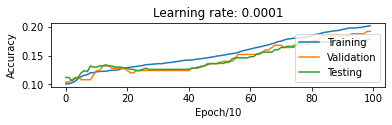

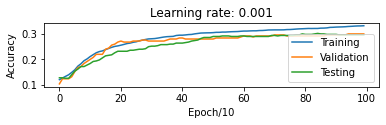

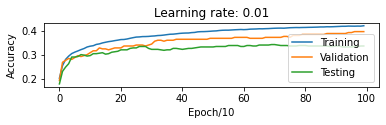

In [18]:
for i, learning_rate in enumerate(learning_rates):
    t_ac, v_ac, te_ac = learning_rate_info[learning_rate][0], learning_rate_info[learning_rate][1], learning_rate_info[learning_rate][2]
    plt.subplot(3, 1, i + 1)
    plt.title("Learning rate: {}".format(learning_rate))
    plot_accuracies(t_ac, v_ac, te_ac)

plt.show()


#### Inline Question 1.

Which one of these learning rates (best_lr) would you pick to train your model? Please Explain why.


#### Your Answer:


### Regularization: Try different weight decay and plots graphs for all (20%)


In [19]:
# Initialize a non-zero weight_decay (Regularization constant) term and repeat the training and evaluation
# Use the best learning rate as obtained from the above exercise, best_lr

# You need to try 3 learning rates and submit all 3 graphs along with this notebook pdf to show your weight decay experiments
weight_decays = [0.0001, 0.001, 0.01]

# FEEL FREE TO EXPERIMENT WITH OTHER VALUES. REPORT OTHER VALUES IF THEY ACHIEVE A BETTER PERFORMANCE

# for weight_decay in weight_decays: Train the classifier and plot data
# Step 1. train_accu, val_accu, test_accu = train(best_lr, weight_decay)
# Step 2. plot_accuracies(train_accu, val_accu, test_accu)

weight_decay_info = {}

for weight_decay in weight_decays:
    # TODO: Train the classifier with different weighty decay and plot
    # pass
    t_ac, v_ac, te_ac, weights = train(best_learning_rate, weight_decay)
    weight_decay_info[weight_decay] = [t_ac, v_ac, te_ac, weights]
    
    if best_v_ac < max(v_ac):
        best_weights = weights
        best_learning_rate = learning_rate
        best_weight_decay = weight_decay
        best_v_ac = max(v_ac)
                                       

  0%|          | 0/100 [00:00<?, ?it/s]

6.929207804805226
Epoch 0, Loss 6.929207804808298
3.5164073156108944
3.418290723008072
3.3790034717942596
3.361829657139996
3.3508530644024694
3.3415297440609546
3.332801604258336
3.324431659365872
3.3163596453278195


  1%|          | 1/100 [00:02<04:32,  2.75s/it]

3.3085628332634234
Epoch 0, Loss 3.3085628340439617
3.3010268403994503
3.2937395015726794
3.286689555742322
3.2798663470755645
3.2732597433410677
3.2668601019643178
3.2606582469439305
3.25464544846666
3.2488134033887235


  2%|▏         | 2/100 [00:05<04:15,  2.61s/it]

3.243154216196103
Epoch 0, Loss 3.2431542172010075
3.2376603803966986
3.23232476037591
3.227140573760252
3.2221013743294074
3.2172010355086953
3.212433734464967
3.2077939368206954
3.2032763819937533
3.198876069164214


  3%|▎         | 3/100 [00:07<04:16,  2.64s/it]

3.194588243864292
Epoch 0, Loss 3.1945882451693253
3.1904083851832565
3.1863321935756996
3.182355579258723
3.1784746511814683
3.1746857065487633
3.1709852208794373
3.1673698385790976
3.163836364006582
3.1603817530131413


  4%|▍         | 4/100 [00:10<04:16,  2.67s/it]

3.157003104933355
Epoch 0, Loss 3.15700310658085
3.1536976550069546
3.1504627672110748
3.14729592748283
3.1441947373127053
3.1411569076897803
3.138180253380504
3.135262687523367
3.1324022165225767
3.129596935224515


  5%|▌         | 5/100 [00:13<04:04,  2.57s/it]

3.1268450223614996
Epoch 0, Loss 3.1268450243753665
3.1241447362480823
3.1214944107158415
3.118892451273286
3.1163373314782064
3.1138275895104477
3.111361824933702
3.1089386956355654
3.1065569149356524
3.1042152488521615


  6%|▌         | 6/100 [00:16<04:21,  2.78s/it]

3.1019125135177887
Epoch 0, Loss 3.101912515911462
3.099647572736429
3.097419335672565
3.095226754665742
3.0930688231629158
3.090944573761938
3.088853076359778
3.0867934363995033
3.0847647932103532
3.0827663184356013


  7%|▋         | 7/100 [00:18<04:13,  2.73s/it]

3.0807972145431926
Epoch 0, Loss 3.080797217323999
3.0788567134144538
3.076944075006443
3.075058586083778
3.0731995590160004
3.071366330636819
3.0695582611617187
3.067774733160707
3.066015150583097
3.0642789378314452


  8%|▊         | 8/100 [00:22<04:38,  3.03s/it]

3.0625655388819206
Epoch 0, Loss 3.0625655420535307
3.0608744164485384
3.0592050511888433
3.0575569409487895
3.0559296000446494
3.054322558579965
3.052735361795626
3.0511675694513025
3.0496187552365353
3.048088506209908


  9%|▉         | 9/100 [00:26<04:54,  3.24s/it]

3.0465764222648053
Epoch 0, Loss 3.0465764258286523
3.0450821156203434
3.0436052103361475
3.042145341849726
3.040702156535253
3.0392753112826565
3.0378644730959454
3.036469318709797
3.0350895342234643
3.0337248147511096


 10%|█         | 10/100 [00:29<04:50,  3.23s/it]

3.0323748640877453
Epoch 0, Loss 3.032374868043864
3.0310393943899827
3.0297181258708394
3.028410786507922
3.0271171117642885
3.025836844321387
3.0245697338234656
3.0233155366328863
3.0220740155958192
3.020844939817809


 11%|█         | 11/100 [00:32<04:47,  3.23s/it]

3.0196280844487386
Epoch 0, Loss 3.0196280887962774
3.0184232304767353
3.0172301645305946
3.0160486786903205
3.0148785703053913
3.013719641820393
3.012571700607672
3.011434558806689
3.0103080331697476
3.0091919449138254


 12%|█▏        | 12/100 [00:35<04:34,  3.12s/it]

3.0080861195782136
Epoch 0, Loss 3.0080861243157564
3.006990386887701
3.0059045806210634
3.0048285384846056
3.0037621019905396
3.00270511633998
3.0016574303103547
3.0006188961470284
2.99958936945897
2.998568709118273


 13%|█▎        | 13/100 [00:38<04:23,  3.02s/it]

2.9975567771633727
Epoch 0, Loss 2.9975567822891422
2.996553438705791
2.9955585618402685
2.9945720175581387
2.9935936796637943
2.9926234246941323
2.991661131840846
2.9907066828754414
2.989759962076878
2.9888208561617065


 14%|█▍        | 14/100 [00:40<04:03,  2.84s/it]

2.9878892542166264
Epoch 0, Loss 2.9878892597286195
2.9869650476333427
2.9860481300456394
2.985138397268582
2.9842357472397656
2.983340079962507
2.9824512974509467
2.981569303676932
2.980694004518658
2.9798253077109784


 15%|█▌        | 15/100 [00:43<04:11,  2.96s/it]

2.97896312279731
Epoch 0, Loss 2.9789631286933846
2.9781073610830977
2.9772579355907607
2.9764147610160623
2.9755777536858683
2.97474683151722
2.973921913977685
2.97310292204694
2.9722897781795328
2.971482406268783


 16%|█▌        | 16/100 [00:47<04:18,  3.08s/it]

2.9706807316117847
Epoch 0, Loss 2.970680737889723
2.9698846808754626
2.969094182063654
2.968309164485171
2.967529558722808
2.966755296603271
2.965986311167989
2.9652225366447706
2.9644639084202904
2.9637103630133663


 17%|█▋        | 17/100 [00:50<04:13,  3.05s/it]

2.9629618380490013
Epoch 0, Loss 2.962961844706548
2.962218272233169
2.9614796053283134
2.9607457781295383
2.9600167324414643
2.959292411055731
2.9585727577291254
2.9578577171623115
2.95714723497914
2.9564412577065293


 18%|█▊        | 18/100 [00:53<04:23,  3.22s/it]

2.955739732754886
Epoch 0, Loss 2.9557397397897813
2.955042608399052
2.9543498337597747
2.953661358785653
2.9529771342355793
2.9522971116616343
2.9516212433924367
2.950949482516924
2.9502817828685544
2.9496180990099226


 19%|█▉        | 19/100 [00:58<04:43,  3.50s/it]

2.948958386217762
Epoch 0, Loss 2.948958393627759
2.94830260046834
2.9476506984232174
2.947002637415369
2.946358375435661
2.9457178711196557
2.9450810837347565
2.94444797316766
2.9438184999121297
2.9431926250570606


 20%|██        | 20/100 [01:01<04:31,  3.39s/it]

2.9425703102748386
Epoch 0, Loss 2.9425703180577187
2.941951517809984
2.9413362104680694
2.9407243516049
2.9401159051159604
2.9395108354261064
2.938909107479504
2.9383106867298077
2.937715539130565
2.9371236311258495


 21%|██        | 21/100 [01:05<04:42,  3.58s/it]

2.9365349296411085
Epoch 0, Loss 2.936534937794692
2.935949402074227
2.9353670162867926
2.934787740595562
2.9342115437641274
2.933638394994764
2.933068263920471
2.9325011205971827
2.93193693549616
2.9313756794965524


 22%|██▏       | 22/100 [01:08<04:37,  3.55s/it]

2.9308173238781197
Epoch 0, Loss 2.930817332400274
2.9302618403141216
2.9297092008643566
2.9291593779683622
2.9286123444387533
2.928068073454712
2.9275265385556213
2.926987713634822
2.926451572933522
2.925918091034821


 23%|██▎       | 23/100 [01:12<04:32,  3.54s/it]

2.9253872428578673
Epoch 0, Loss 2.925387251746512
2.924859003652144
2.924333348991862
2.9238102547704856
2.9232896971953592
2.9227716527824588
2.9222560983512427
2.921743011019608
2.921232368198959
2.9207241475893704


 24%|██▍       | 24/100 [01:15<04:27,  3.53s/it]

2.9202183271748456
Epoch 0, Loss 2.920218336427955
2.919714885218683
2.919213800258923
2.9187150511038955
2.9182186168278506
2.917724476766682
2.91723261051373
2.9167429979156756
2.9162556190685023
2.9157704543135514


 25%|██▌       | 25/100 [01:18<04:17,  3.43s/it]

2.9152874842336485
Epoch 0, Loss 2.9152874938492563
2.9148066896492986
2.9143280516149717
2.9138515514154397
2.913377170562203
2.9129048907899726
2.9124346940532257
2.911966562522821
2.9115004785826897
2.9110364248265745


 26%|██▌       | 26/100 [01:23<04:30,  3.66s/it]

2.9105743840548413
Epoch 0, Loss 2.9105743940310416
2.910114339271343
2.909656273680348
2.9092001706835227
2.9087460138769674
2.908293787048316
2.9078434741738746
2.9073950594158275
2.9069485271194866
2.9065038618105867


 27%|██▋       | 27/100 [01:26<04:30,  3.70s/it]

2.9060610481926434
Epoch 0, Loss 2.9060610585275923
2.9056200711443423
2.905180915716989
2.904743567131994
2.9043080107784127
2.9038742322105207
2.903442217145436
2.903011951460781
2.902583421192394
2.902156612532065


 28%|██▊       | 28/100 [01:30<04:15,  3.55s/it]

2.901731511825327
Epoch 0, Loss 2.901731522517242
2.9013081055692767
2.9008863804104372
2.9004663231426515
2.9000479207050227
2.899631160179881
2.899216028790786
2.8988025139005695
2.898390603009405
2.8979802837529123


 29%|██▉       | 29/100 [01:33<04:02,  3.42s/it]

2.897571543900296
Epoch 0, Loss 2.8975715549474588
2.897164371352512
2.8967587541404654
2.8963546804232445
2.895952138486371
2.895551116740095
2.895151603717709
2.8947535880738853
2.8943570585830583
2.893962004137811


 30%|███       | 30/100 [01:37<04:13,  3.62s/it]

2.893568413747306
Epoch 0, Loss 2.8935684251480596
2.8931762765357316
2.8927855817407777
2.8923963187121338
2.8920084769100147
2.891622045903707
2.8912370153701383
2.8908533750924708
2.890471114958721
2.8900902249603924


 31%|███       | 31/100 [01:40<04:09,  3.61s/it]

2.889710695191138
Epoch 0, Loss 2.889710706943888
2.8893325158454397
2.8889556772173095
2.888580169699014
2.8882059837798115
2.887833110044717
2.8874615391732803
2.8870912619383877
2.886722269205079
2.8863545519293834


 32%|███▏      | 32/100 [01:44<04:03,  3.58s/it]

2.8859881011571735
Epoch 0, Loss 2.8859881132603866
2.885622908023039
2.8852589637491732
2.884896259644279
2.884534787102492
2.88417453760232
2.8838155027055974
2.8834576740564524
2.883101043380299
2.882745602482832


 33%|███▎      | 33/100 [01:48<04:04,  3.65s/it]

2.8823913432490467
Epoch 0, Loss 2.8823913557012513
2.882038257642269
2.881686337703198
2.8813355755489676
2.8809859633722197
2.8806374934401875
2.8802901580937985
2.8799439497467887
2.879598860884823
2.8792548840646415


 34%|███▍      | 34/100 [01:51<03:51,  3.51s/it]

2.878912011913203
Epoch 0, Loss 2.878912024712987
2.8785702371268553
2.8782295524705064
2.8778899507768148
2.8775514249453837
2.877213967941979
2.876877572797743
2.876542232608434
2.876207940533667


 35%|███▌      | 35/100 [01:54<03:39,  3.37s/it]

2.875874689796166
2.875542473681033
Epoch 0, Loss 2.8755424868270425
2.8752112855350207
2.874881118765819
2.8745519668413495
2.874223823289073
2.8738966816953004
2.873570535704521
2.8732453790187344
2.872921205396793
2.8725980086537577


 36%|███▌      | 36/100 [01:58<03:50,  3.61s/it]

2.8722757826602527
Epoch 0, Loss 2.8722757961511927
2.8719545213418405
2.8716342186783983
2.8713148687035037
2.8709964655038323
2.8706790032185596
2.8703624760387725
2.8700468782068866
2.8697322040160795
2.869418447809718


 37%|███▋      | 37/100 [02:01<03:37,  3.45s/it]

2.8691056039808065
Epoch 0, Loss 2.8691056178154377
2.8687936669714333
2.8684826312722302
2.868172491421835
2.867863242006365
2.867554877658894
2.8672473930589386
2.8669407829319495
2.866635042048812
2.8663301652253486


 38%|███▊      | 38/100 [02:04<03:29,  3.38s/it]

2.8660261473218354
Epoch 0, Loss 2.8660261614989744
2.865722983242516
2.8654206679351293
2.865119196390436
2.864818563641761
2.864518764764534
2.864219794875834
2.8639216491339505
2.863624322737939
2.863327810927191


 39%|███▉      | 39/100 [02:09<03:39,  3.60s/it]

2.863032108980999
Epoch 0, Loss 2.8630321234995155
2.86273721221814
2.862443115996456
2.862149815712436
2.8618573068008186
2.861565584734181
2.861274645022548
2.860984483212996
2.8606950948892678
2.86040647567139


 40%|████      | 40/100 [02:12<03:32,  3.54s/it]

2.860118621215296
Epoch 0, Loss 2.8601186360741124
2.8598315272124517
2.8595451893894897
2.8592596035078444
2.85897476536339
2.858690670786094
2.858407315639656
2.8581246958211715
2.857842807260785
2.8575616459213533


 41%|████      | 41/100 [02:16<03:32,  3.60s/it]

2.857281207798113
Epoch 0, Loss 2.857281222996203
2.857001488918349
2.8567224853410726
2.856444193156698
2.856166608486723
2.8558897274834205
2.8556135463295242
2.8553380612379238
2.855063268451362
2.854789164242137


 42%|████▏     | 42/100 [02:20<03:34,  3.70s/it]

2.8545157449118075
Epoch 0, Loss 2.854515760448194
2.8542430067908975
2.853970946238614
2.8536995596425556
2.8534288434184374
2.8531587940098073
2.8528894078877736
2.8526206815507367
2.852352611524114
2.8520851943600802


 43%|████▎     | 43/100 [02:24<03:43,  3.92s/it]

2.8518184266373017
Epoch 0, Loss 2.851818442511056
2.8515523049606823
2.851286825961101
2.8510219862951627
2.850757782644948
2.8504942117177663
2.85023127024591
2.8499689549864122
2.849707262720812
2.849446190254915


 44%|████▍     | 44/100 [02:29<03:48,  4.09s/it]

2.8491857344185596
Epoch 0, Loss 2.8491857506287994
2.8489258920653926
2.8486666600726323
2.8484080353408494
2.8481500147937426
2.8478925953779184
2.8476357740626725
2.8473795478397763
2.8471239137232645
2.8468688687492207


 45%|████▌     | 45/100 [02:34<04:01,  4.39s/it]

2.8466144099755746
Epoch 0, Loss 2.846614426521463
2.8463605344818923
2.846107239369177
2.8458545217596622
2.84560237879662
2.8453508076441576
2.8450998054870293
2.8448493695304387
2.844599496999851
2.8443501851408075


 46%|████▌     | 46/100 [02:37<03:42,  4.13s/it]

2.8441014312187347
Epoch 0, Loss 2.844101448099478
2.8438532325187644
2.8436055863455505
2.843358490023089
2.8431119408945404
2.8428659363220543
2.842620473686595
2.8423755503877683
2.842131163843655
2.841887311490637


 47%|████▋     | 47/100 [02:41<03:28,  3.94s/it]

2.8416439907832376
Epoch 0, Loss 2.841644007998086
2.8414011991939514
2.8411589342130816
2.8409171933485835
2.8406759741259004
2.84043527408781
2.840195090794263
2.839955421822233
2.8397162647655656
2.839477617234821


 48%|████▊     | 48/100 [02:44<03:19,  3.84s/it]

2.8392394768571307
Epoch 0, Loss 2.839239494405373
2.8390018412760463
2.838764708151395
2.8385280751591346
2.8382919399912088
2.838056300355409
2.837821153975231
2.837586498589737
2.8373523319534204
2.837118651836068


 49%|████▉     | 49/100 [02:48<03:10,  3.74s/it]

2.836885456022627
Epoch 0, Loss 2.836885473903593
2.83665274231307
2.8364205085222673
2.836188752479855
2.835957472030102
2.8357266650317916
2.8354963293580866
2.835266462896411
2.835037063548321
2.8348081292293887


 50%|█████     | 50/100 [02:51<03:06,  3.72s/it]

2.8345796578690776
Epoch 0, Loss 2.834579676082135
2.8343516474106205
2.8341240958109077
2.833897001040365
2.8336703610828375
2.83344417393548
2.8332184376086333
2.8329931501257244
2.8327683095231446
2.832543913850145


 51%|█████     | 51/100 [02:56<03:12,  3.93s/it]

2.8323199611687246
Epoch 0, Loss 2.832319979713277
2.8320964495535255
2.8318733770917226
2.8316507418829198
2.8314285420390446
2.8312067756842465
2.830985440954788
2.8307645359989535
2.830544058976937
2.8303240080607526


 52%|█████▏    | 52/100 [02:59<03:03,  3.83s/it]

2.83010438143413
Epoch 0, Loss 2.830104400309617
2.8298851772924194
2.829666393842493
2.8294480293026503
2.8292300819025256
2.829012549882991
2.828795431496064
2.828578725004819
2.828362428683291
2.8281465408163906


 53%|█████▎    | 53/100 [03:03<02:49,  3.61s/it]

2.8279310596998113
Epoch 0, Loss 2.8279310789057064
2.8277159836399424
2.8275013109537825
2.827287039968852
2.827073169023107
2.826859696464853
2.8266466206526664
2.8264339399553053
2.8262216527516277
2.8260097574305156


 54%|█████▍    | 54/100 [03:06<02:41,  3.52s/it]

2.8257982523907863
Epoch 0, Loss 2.825798271926596
2.8255871360411176
2.825376406799966
2.825166063095491
2.8249561033654738
2.824746526057242
2.824537329627595
2.824328512542724
2.8241200732781433
2.823912010318611


 55%|█████▌    | 55/100 [03:10<02:40,  3.57s/it]

2.823704322158056
Epoch 0, Loss 2.823704342023318
2.8234970072995114
2.8232900642550334
2.8230834915456366
2.822877287701221
2.8226714512605033
2.8224659807709456
2.8222608747886886
2.822056131878482
2.821851750613618


 56%|█████▌    | 56/100 [03:13<02:36,  3.55s/it]

2.821647729575867
Epoch 0, Loss 2.8216477497701495
2.821444067355406
2.8212407625507594
2.8210378137687284
2.8208352196243314
2.8206329787407363
2.8204310897492024
2.820229551289014
2.8200283620074176
2.819827520559566


 57%|█████▋    | 57/100 [03:16<02:25,  3.39s/it]

2.819627025608453
Epoch 0, Loss 2.8196270461313535
2.8194268758248544
2.8192270698872677
2.8190276064818565
2.818828484302385
2.8186297020501696
2.8184312584340123
2.81823315217015
2.8180353819821957
2.817837946601081


 58%|█████▊    | 58/100 [03:19<02:22,  3.39s/it]

2.817640844765005
Epoch 0, Loss 2.817640865616149
2.817444075219376
2.817247636716759
2.8170515280168185
2.816855747886272
2.816660295098829
2.8164651684351454
2.816270366682766
2.8160758886360777
2.8158817330962567


 59%|█████▉    | 59/100 [03:23<02:26,  3.57s/it]

2.8156878988712166
Epoch 0, Loss 2.815687920050256
2.8154943847755596
2.8153011896305276
2.815108312263952
2.8149157515102057
2.814723506210154
2.8145315752111073
2.814339957366772
2.814148651537208
2.813957656588777


 60%|██████    | 60/100 [03:27<02:23,  3.58s/it]

2.813766971394099
Epoch 0, Loss 2.8137669929007125
2.813576594832006
2.8133865257874957
2.81319676315169
2.813007305821785
2.812818152701012
2.812629302698591
2.8124407547296864
2.8122525077153666
2.812064560582561


 61%|██████    | 61/100 [03:31<02:20,  3.61s/it]

2.811876912264016
Epoch 0, Loss 2.8118769340979064
2.811689561698254
2.8115025078295326
2.811315749607802
2.8111292859886654
2.810943115933339
2.8107572384086095
2.8105716523867987
2.8103863568457177
2.8102013507686348


 62%|██████▏   | 62/100 [03:36<02:34,  4.06s/it]

2.810016633144231
Epoch 0, Loss 2.810016655305125
2.809832202966567
2.8096480592350415
2.809464200954352
2.809280627134462
2.809097336790561
2.80891432894303
2.8087316026174
2.808549156844323
2.808366990659531


 63%|██████▎   | 63/100 [03:39<02:21,  3.83s/it]

2.808185103103802
Epoch 0, Loss 2.808185125591449
2.8080034932229245
2.8078221600676643
2.8076411026937276
2.8074603201617276
2.8072798115371507
2.807099575890323
2.806919612296376
2.8067399198352136
2.80656049759148


 64%|██████▍   | 64/100 [03:42<02:09,  3.58s/it]

2.8063813446545276
Epoch 0, Loss 2.8063813674687
2.8062024601183815
2.806023843081711
2.8058454926477947
2.8056674079244943
2.8054895880242157
2.8053120320638847
2.805134739164913
2.8049577084531667
2.8047809390589395


 65%|██████▌   | 65/100 [03:46<02:05,  3.59s/it]

2.804604430116921
Epoch 0, Loss 2.8046044532574115
2.8044281807661653
2.8042521901500637
2.804076457416316
2.8039009817168994
2.803725762208039
2.8035507980501846
2.8033760884079757
2.803201632450217
2.803027429349852


 66%|██████▌   | 66/100 [03:49<01:58,  3.47s/it]

2.802853478283931
Epoch 0, Loss 2.802853501750552
2.8026797784335877
2.8025063289840095
2.8023331291244142
2.802160178048016
2.8019874749520084
2.801815019037532
2.8016428095096484
2.8014708455773154
2.801299126453364


 67%|██████▋   | 67/100 [03:52<01:53,  3.45s/it]

2.8011276513544687
Epoch 0, Loss 2.8011276751470526
2.8009564195011265
2.800785430117624
2.800614682432027
2.800444175676138
2.8002739090854853
2.8001038818992954
2.7999340933604655
2.7997645427155424
2.7995952292146984


 68%|██████▊   | 68/100 [03:56<01:48,  3.40s/it]

2.7994261521117103
Epoch 0, Loss 2.7994261762301083
2.7992573106639296
2.799088704132266
2.7989203317811624
2.7987521928785704
2.7985842866959305
2.7984166125081473
2.798249169593569
2.7980819572339652
2.797914974714504


 69%|██████▉   | 69/100 [03:58<01:39,  3.22s/it]

2.797748221323731
Epoch 0, Loss 2.7977482457678113
2.797581696353548
2.797415399099192
2.7972493288592126
2.797083484935454
2.7969178666330277
2.7967524732603017
2.7965873041288716
2.7964223585535435
2.7962576358523132


 70%|███████   | 70/100 [04:03<01:45,  3.52s/it]

2.7960931353463474
Epoch 0, Loss 2.796093160115996
2.7959288563599616
2.7957647982206044
2.7956009602588323
2.795437341808295
2.795273942205713
2.7951107607908616
2.7949477969065493
2.794785049898599
2.794622519115831


 71%|███████   | 71/100 [04:08<01:54,  3.96s/it]

2.7944602039100452
Epoch 0, Loss 2.794460229005164
2.794298103635999
2.79413621765139
2.793974545316844
2.7938130859958874
2.7936518390549363
2.793490803863276
2.793329979793043
2.793169366219213
2.793008962519573


 72%|███████▏  | 72/100 [04:11<01:47,  3.82s/it]

2.7928487680747147
Epoch 0, Loss 2.7928487934952213
2.7926887822680113
2.7925290044856035
2.7923694341163805
2.792210070551964
2.792050913186694
2.79189196141761
2.791733214644433
2.791574672269556
2.791416333698019


 73%|███████▎  | 73/100 [04:14<01:38,  3.66s/it]

2.791258198337499
Epoch 0, Loss 2.791258224083326
2.7911002655982946
2.7909425348933072
2.7907850056380257
2.790627677250514
2.790470549151394
2.7903136207638273
2.790156891513506
2.790000360828633
2.78984402813991


 74%|███████▍  | 74/100 [04:19<01:42,  3.95s/it]

2.7896878928805195
Epoch 0, Loss 2.789687918951614
2.789531954486114
2.789376212394799
2.7892206660471186
2.7890653148860425
2.7889101583569507
2.7887551959076196
2.788600426988207
2.78844585105124
2.788291467551601


 75%|███████▌  | 75/100 [04:22<01:33,  3.75s/it]

2.788137275946512
Epoch 0, Loss 2.7881373023428355
2.7879832756955234
2.7878294662604968
2.787675847105598
2.787522417697277
2.7873691775042566
2.7872161259975248
2.787063262650311
2.786910586938085
2.7867580983385345


 76%|███████▌  | 76/100 [04:25<01:25,  3.56s/it]

2.7866057963315565
Epoch 0, Loss 2.786605823053083
2.7864536803992452
2.78630175002588
2.7861500046979075
2.785998443903936
2.7858470671347217
2.7856958738831503
2.7855448636442346
2.7853940359150933
2.7852433901949465


 77%|███████▋  | 77/100 [04:29<01:22,  3.57s/it]

2.785092925985098
Epoch 0, Loss 2.7850929530318136
2.7849426427889283
2.7847925401118787
2.7846426174614427
2.784492874347152
2.784343310280569
2.784193924775269
2.784044717346836
2.7838956875128464
2.7837468347928596


 78%|███████▊  | 78/100 [04:32<01:16,  3.49s/it]

2.7835981587084078
Epoch 0, Loss 2.7835981860803116
2.783449658782984
2.7833013345420294
2.7831531855129263
2.783005211224985
2.782857411209434
2.782709784999407
2.782562332129936
2.7824150521379387
2.782267944562208


 79%|███████▉  | 79/100 [04:35<01:10,  3.37s/it]

2.782121008943402
Epoch 0, Loss 2.782121036640505
2.781974244824035
2.781827651748466
2.781681229262888
2.781534976915319
2.7813888942555915
2.781242980835345
2.7810972362080113
2.7809516599288076
2.78080625155473


 80%|████████  | 80/100 [04:39<01:07,  3.36s/it]

2.7806610106445366
Epoch 0, Loss 2.78066103866686
2.780515936758744
2.7803710294596153
2.780226288311152
2.7800817128790807
2.7799373027308496
2.779793057435616
2.7796489765642365
2.779505059689261
2.7793613063849176


 81%|████████  | 81/100 [04:44<01:12,  3.82s/it]

2.7792177162271106
Epoch 0, Loss 2.7792177445746873
2.779074288793409
2.7789310236630342
2.7787879204168573
2.7786449786373852
2.778502197908755
2.7783595778167225
2.778217117948656
2.7780748178935286
2.777932677241907


 82%|████████▏ | 82/100 [04:47<01:08,  3.79s/it]

2.777790695585943
Epoch 0, Loss 2.7777907242588156
2.777648872519369
2.777507207637486
2.7773657005371546
2.7772243508167924
2.7770831580763584
2.776942121917353
2.776801241942801
2.7766605177572505
2.776519948966764


 83%|████████▎ | 83/100 [04:52<01:06,  3.94s/it]

2.7763795351789065
Epoch 0, Loss 2.776379564177127
2.776239276002742
2.7760991710488248
2.7759592199291885
2.775819422257345
2.7756797776482682
2.775540285718396
2.7754009460856137
2.7752617583692523
2.775122722190081


 84%|████████▍ | 84/100 [04:56<01:04,  4.01s/it]

2.7749838371702955
Epoch 0, Loss 2.7749838664939266
2.774845102933515
2.7747065191047735
2.774568085310512
2.7744298011785724
2.7742916663381885
2.7741536804199813
2.7740158430559507
2.7738781538794686
2.7737406125252706


 85%|████████▌ | 85/100 [05:01<01:07,  4.49s/it]

2.773603218629452
Epoch 0, Loss 2.773603248278564
2.7734659718294585
2.7733288717640825
2.7731919180734494
2.7730551103990213
2.7729184483835794
2.7727819316712248
2.7726455599073705
2.7725093327387316
2.772373249813324


 86%|████████▌ | 86/100 [05:05<00:58,  4.19s/it]

2.772237310780451
Epoch 0, Loss 2.7722373407551237
2.7721015152907063
2.7719658629959567
2.771830353549343
2.771694986605275
2.771559761819417
2.771424678848691
2.7712897373512644
2.7711549369865445
2.771020277415175


 87%|████████▋ | 87/100 [05:08<00:50,  3.89s/it]

2.770885758299027
Epoch 0, Loss 2.7708857885993483
2.7707513793011977
2.770617140085996
2.7704830403189455
2.770349079666773
2.770215257797405
2.7700815743799594
2.769948029084744
2.769814621583245
2.769681351548127


 88%|████████▊ | 88/100 [05:12<00:44,  3.74s/it]

2.769548218653223
Epoch 0, Loss 2.7695482492792887
2.7694152225735307
2.7692823629852072
2.76914963956556
2.769017051993048
2.768884599947269
2.7687522831089586
2.7686201011599825
2.7684880537833325
2.76835614066312


 89%|████████▉ | 89/100 [05:15<00:40,  3.64s/it]

2.7682243614845734
Epoch 0, Loss 2.768224392436487
2.768092715934025
2.767961203698917
2.7678298244677877
2.7676985779302687
2.767567463777081
2.7674364817000274
2.7673056313919906
2.767174912546924


 90%|█████████ | 90/100 [05:18<00:35,  3.51s/it]

2.767044324859851
2.7669138680268546
Epoch 0, Loss 2.766913899304727
2.7667835417450797
2.7666533457127205
2.7665232796290193
2.7663933431942627
2.766263536109775
2.766133858077912
2.766004308802059
2.765874887986624
2.7657455953370342


 91%|█████████ | 91/100 [05:21<00:30,  3.36s/it]

2.76561643055973
Epoch 0, Loss 2.7656164621636794
2.765487393362161
2.7653584834527813
2.7652297005410436
2.7651010443373973
2.764972514553281
2.764844110901121
2.7647158330943213
2.764587680847266
2.7644596538753103


 92%|█████████▏| 92/100 [05:24<00:26,  3.31s/it]

2.764331751894775
Epoch 0, Loss 2.7643317838249257
2.7642039746229483
2.764076321778073
2.763948793079349
2.7638213882469254
2.7636941070018954
2.7635669490662975
2.7634399141631034
2.763313002016219
2.7631862123504773


 93%|█████████▎| 93/100 [05:27<00:22,  3.25s/it]

2.7630595448916386
Epoch 0, Loss 2.7630595771481214
2.7629329993663814
2.7628065755022986
2.7626802730278968
2.76255409167259
2.762428031166695
2.7623020912414273
2.7621762716289
2.762050572062116
2.761924992274964


 94%|█████████▍| 94/100 [05:31<00:19,  3.29s/it]

2.7617995320022195
Epoch 0, Loss 2.7617995645851723
2.761674190979534
2.7615489689434347
2.761423865631324
2.7612988807814665
2.761174014132993
2.761049265425895
2.760924634401018
2.7608001208000603
2.7606757243655693


 95%|█████████▌| 95/100 [05:34<00:16,  3.38s/it]

2.7605514448409365
Epoch 0, Loss 2.7605514777505027
2.7604272819703937
2.76030323549901
2.760179305172689
2.760055490738161
2.759931791942987
2.7598082085355458
2.759684740265038
2.759561386881479
2.7594381481356924


 96%|█████████▌| 96/100 [05:38<00:13,  3.39s/it]

2.759315023779315
Epoch 0, Loss 2.7593150570156437
2.759192013564784
2.7590691172453403
2.758946334575021
2.7588236653086566
2.758701109201869
2.758578666011067
2.758456335493442
2.758334117406968
2.7582120115103934


 97%|█████████▋| 97/100 [05:41<00:09,  3.27s/it]

2.758090017563242
Epoch 0, Loss 2.7580900511264876
2.7579681353258065
2.7578463645591453
2.757724705025084
2.757603156486204
2.7574817187058476
2.757360391448106
2.7572391744778266
2.7571180675605995
2.75699707046276


 98%|█████████▊| 98/100 [05:44<00:06,  3.25s/it]

2.7568761829513857
Epoch 0, Loss 2.7568762168417082
2.7567554047942893
2.75663473576002
2.7565141756178577
2.7563937241378103
2.7562733810906113
2.7561531462477147
2.756033019381296
2.7559130002642447
2.7557930886701643


 99%|█████████▉| 99/100 [05:47<00:03,  3.27s/it]

2.755673284373367
Epoch 0, Loss 2.7556733185909317
2.7555535871488726
2.755433996772406
2.755314513020389
2.755195135669947
2.755075864498896
2.754956699285746
2.7548376398096965
2.7547186858506305
2.754599837189119


  0%|          | 0/100 [00:00<?, ?it/s]

6.9333537201536055
Epoch 0, Loss 6.933353720184657
3.516567004056644
3.4183487497158467
3.3789995092765293
3.3617942157545753
3.3508055682001032
3.341478092164187
3.3327482314367147
3.32437725823889
3.3163044438872378


  1%|          | 1/100 [00:03<05:36,  3.40s/it]

3.308506942620321
Epoch 0, Loss 3.3085069504271125
3.3009703404403825
3.293682461327865
3.286632038346454
3.2798084111598977
3.2732014435869417
3.266801489442691
3.26059936938575
3.2545863504996353
3.2487541267508395


  2%|▏         | 2/100 [00:07<06:13,  3.81s/it]

3.243094799930032
Epoch 0, Loss 3.243094809981704
3.237600861027632
3.232265172074687
3.2270809484933625
3.222041741997256
3.2171414240733127
3.2123741700682276
3.207734443893982
3.203216983359879
3.198816786132342


  3%|▎         | 3/100 [00:11<06:00,  3.71s/it]

3.1945290963184787
Epoch 0, Loss 3.194529109372686
3.190349391665197
3.1862733713621756
3.182296944434197
3.1784162187062153
3.1746274903228917
3.1709272338031274
3.1673120926093117
3.163778870210522
3.1603245216186675


  4%|▍         | 4/100 [00:14<05:44,  3.59s/it]

3.15694614537657
Epoch 0, Loss 3.1569461618565597
3.153640975977147
3.1504063766931782
3.147239832797562
3.1441389451545207
3.1411014241627746
3.1381250840323722
3.135207837377547
3.1323476901086686
3.1295427366070676


  5%|▌         | 5/100 [00:17<05:31,  3.49s/it]

3.1267911551672647
Epoch 0, Loss 3.126791175312015
3.124091203691811
3.1214412156247033
3.118839596109982
3.1162848183628515
3.1137754202412737
3.1113100010066597
3.108887218262867
3.106505785063321
3.10416446717663


  6%|▌         | 6/100 [00:21<05:26,  3.48s/it]

3.1018620805016086
Epoch 0, Loss 3.101862104445337
3.099597488623116
3.0973696005006537
3.0951773682820596
3.0930197852351404
3.090895883790462
3.088804733688927
3.086745440228125
3.0847171426018276
3.082719012327294


  7%|▋         | 7/100 [00:24<05:22,  3.47s/it]

3.0807502517553744
Epoch 0, Loss 3.0807502795712156
3.0788100926587303
3.0768977948937044
3.0750126451316953
3.0731539556561134
3.071321063221199
3.069513327969269
3.0677301324030912
3.065970880410328
3.0642349963371505


  8%|▊         | 8/100 [00:28<05:25,  3.54s/it]

3.0625219241083004
Epoch 0, Loss 3.062521955832849
3.0608311263910335
3.0591620838005302
3.0575142941445104
3.055887271704902
3.0542805465545557
3.0526936639071067
3.051126183498192
3.049577678996351
3.0480477374420105


  9%|▉         | 9/100 [00:31<05:09,  3.40s/it]

3.046535958713063
Epoch 0, Loss 3.0465359943605406
3.0450419550156353
3.0435653503987043
3.0421057802913283
3.040662891061283
3.0392363395940207
3.037825792890873
3.0364309276855197
3.035051430077777
3.0336869951838406


 10%|█         | 10/100 [00:34<05:03,  3.37s/it]

3.0323373268021134
Epoch 0, Loss 3.032337366372773
3.031002137093867
3.0296811462779605
3.0283740823389365
3.0270806807478086
3.0258006841949228
3.0245338423343
3.0232799115388826
3.022038654666166
3.0208098408337074


 11%|█         | 11/100 [00:38<05:03,  3.41s/it]

3.019593245204035
Epoch 0, Loss 3.0195932886892844
3.0183886487784983
3.0171958381996515
3.01601460556174
3.0148447482289242
3.0136860686608746
3.012538374245388
3.0114014771376985
3.01027519410618
3.009159346384142


 12%|█▏        | 12/100 [00:42<05:21,  3.65s/it]

3.0080537595274364
Epoch 0, Loss 3.0080538069130403
3.006958263277623
3.0058726914304206
3.0047968817092343
3.0037306756435074
3.0026739184516935
3.0016264589286474
3.0005881493372355
2.999558845303975
2.9985384057185493


 13%|█▎        | 13/100 [00:46<05:21,  3.70s/it]

2.997526692637
Epoch 0, Loss 2.9975267439051256
2.996523571188463
2.99552890948529
2.9945425785364
2.993564452163745
2.9925944069217363
2.991632322019532
2.990678079246042
2.98973156289756
2.9887926597078924


 14%|█▍        | 14/100 [00:48<04:47,  3.34s/it]

2.9878612587809115
Epoch 0, Loss 2.987861313911467
2.9869372515254007
2.9860205315921284
2.985110994813039
2.9842085391424953
2.9833130646004764
2.9824244732176566
2.9815426689823026
2.980667557788902
2.9797990473884695


 15%|█▌        | 15/100 [00:51<04:27,  3.15s/it]

2.9789370473404553
Epoch 0, Loss 2.9789371063119803
2.9780814689662005
2.977232225303883
2.9763892310648905
2.9755524025915685
2.9747216578162967
2.9738969162218396
2.9730780988029255
2.9722651280290053
2.971457927808159


 16%|█▌        | 16/100 [00:54<04:15,  3.04s/it]

2.970656423452092
Epoch 0, Loss 2.9706564862423597
2.9698605416421953
2.969070210396622
2.9682853590383527
2.9675059181642034
2.966731819614755
2.965962996445161
2.9651993828968086
2.9644409143698054


 17%|█▋        | 17/100 [00:56<03:56,  2.85s/it]

2.963687527396253
2.9629391596142955
Epoch 0, Loss 2.9629392262007284
2.9621957497428997
2.9614572375573607
2.9607235638654887
2.9599946704844657
2.9592705002183557
2.9585509968362254
2.9578361050508803
2.9571257704981724
2.9564199397168833


 18%|█▊        | 18/100 [00:59<03:42,  2.71s/it]

2.9557185601291485
Epoch 0, Loss 2.9557186304891068
2.9550215800214015
2.9543289485258457
2.9536406156024064
2.952956532021168
2.952276649345272
2.95160091991427
2.950929296827902
2.9502617339303043
2.949598185794624


 19%|█▉        | 19/100 [01:02<03:51,  2.86s/it]

2.9489386077080204
Epoch 0, Loss 2.948938681819008
2.948282955657065
2.9476311863135014
2.9469832570203667
2.9463391257784703
2.9456987512332002
2.9450620926616673
2.944429109960165
2.943799763631935
2.9431740147752397


 20%|██        | 20/100 [01:06<04:13,  3.17s/it]

2.942551825071724
Epoch 0, Loss 2.942551902911532
2.9419331567750544
2.941317972699842
2.9407062362108234
2.9400979112123085
2.9394929621378743
2.9388913539403054
2.9382930520817716
2.937698022524236
2.9371062317200862


 21%|██        | 21/100 [01:09<04:02,  3.06s/it]

2.9365176466029883
Epoch 0, Loss 2.9365177281498003
2.9359322345789463
2.9353499635175724
2.9347708017435536
2.934194718028318
2.933621681581886
2.933051662044908
2.932484629480883
2.931920554368545
2.931359407594432


 22%|██▏       | 22/100 [01:11<03:52,  2.98s/it]

2.930801160445602
Epoch 0, Loss 2.9308012456780697
2.9302457846025316
2.92969325213215
2.9291435354810416
2.928596607468786
2.9280524412814533
2.9275110104652255
2.9269722889201737
2.9264362508941515
2.925902870976829


 23%|██▎       | 23/100 [01:15<03:56,  3.08s/it]

2.9253721240938515
Epoch 0, Loss 2.925372212991148
2.924843985501119
2.9243184307791914
2.9237954358278033
2.9232749768605037
2.922757030399396
2.9222415732699996
2.9217285825962014
2.9212180357953286
2.92070991057331


 24%|██▍       | 24/100 [01:19<04:17,  3.38s/it]

2.9202041849199394
Epoch 0, Loss 2.9202042774618
2.9197008371042363
2.9191998456698993
2.9187011894308523
2.9182048474668756
2.9177107991193316
2.917219023986969
2.9167295019218127
2.916242213025135
2.9157571376435025


 25%|██▌       | 25/100 [01:22<04:16,  3.42s/it]

2.9152742563649086
Epoch 0, Loss 2.9152743525316542
2.914793550014973
2.914314999653216
2.91383858656941
2.913364292279998
2.9128920985245785
2.9124219872624613
2.911953940669289
2.911487941133719
2.911023971254172


 26%|██▌       | 26/100 [01:26<04:17,  3.47s/it]

2.9105620138356345
Epoch 0, Loss 2.9105621136081945
2.9101020518865384
2.909644068615674
2.909188047429183
2.9087339719275933
2.908281825902915
2.9078315933357874
2.907383258392677
2.9069368054231335
2.9064922189570854


 27%|██▋       | 27/100 [01:30<04:38,  3.81s/it]

2.9060494837021924
Epoch 0, Loss 2.906049587062113
2.905608584541246
2.9051695065296075
2.904732234892703
2.904296755023562
2.903863052480388
2.903431112984186
2.903000922416428
2.902572466816757
2.9021457323807294


 28%|██▊       | 28/100 [01:34<04:32,  3.78s/it]

2.9017207054576044
Epoch 0, Loss 2.9017208123870577
2.9012973725481657
2.900875720302583
2.9004557355183107
2.9000374051380247
2.8996207162475867
2.899205656074057
2.898792211983728
2.898380371480199


 29%|██▉       | 29/100 [01:37<04:03,  3.42s/it]

2.897970122202479
2.8975614519231288
Epoch 0, Loss 2.8975615624049134
2.8971543485464233
2.896748800106556
2.896344794765864
2.8959423208130897
2.8955413666616696
2.895141920848047
2.894743972030018
2.8943475089851045
2.8939525206089485


 30%|███       | 30/100 [01:40<03:54,  3.36s/it]

2.8935589959137373
Epoch 0, Loss 2.893559109931278
2.8931669240266573
2.892776294188364
2.8923870957514817
2.8919993181791335
2.89161295104348
2.8912279840242987
2.890844406907572
2.8904622095841064
2.8900813820481708


 31%|███       | 31/100 [01:42<03:31,  3.07s/it]

2.889701914396152
Epoch 0, Loss 2.8897020319334965
2.8893237968252445
2.8889470196321376
2.8885715732117565
2.8881974480559878
2.887824634752449
2.887453123983269
2.8870829065238848
2.8867139732418643
2.8863463150957385


 32%|███▏      | 32/100 [01:45<03:27,  3.05s/it]

2.8859799231338603
Epoch 0, Loss 2.885980044175673
2.885614788493271
2.8852509023985933
2.8848882561609375
2.884526841176824
2.884166648927118
2.8838076709759908
2.8834498989698867
2.8830933246365116
2.88273793978383


 33%|███▎      | 33/100 [01:48<03:17,  2.95s/it]

2.8823837362990865
Epoch 0, Loss 2.88238386083064
2.882030706147832
2.8816788413729735
2.8813281340938284
2.8809785765052016
2.880630160876472
2.880282879550688
2.879936724943689
2.879591689543223
2.879247765908092


 34%|███▍      | 34/100 [01:51<03:19,  3.02s/it]

2.878904946667301
Epoch 0, Loss 2.878905074674468
2.87856322451922
2.8782225922307636
2.877883042636577
2.8775445686382324
2.8772071632034444
2.8768708193652874
2.876535530221434
2.876201288933394
2.8758680887257713


 35%|███▌      | 35/100 [01:54<03:16,  3.02s/it]

2.875535922885526
Epoch 0, Loss 2.875536054354769
2.875204784761258
2.874874667762483
2.8745455653589316
2.874217471079859
2.8738903785133525
2.873564281305662
2.8732391731605316
2.8729150478385446
2.8725918991564714


 36%|███▌      | 36/100 [01:57<03:04,  2.89s/it]

2.872269720986635
Epoch 0, Loss 2.8722698559049937
2.871948507256281
2.8716282519469516
2.8713089490938786
2.8709905927853723
2.87067317716223
2.870356696417146
2.8700411447941305
2.869726516587939
2.8694128061435027


 37%|███▋      | 37/100 [01:59<02:45,  2.62s/it]

2.8691000078553763
Epoch 0, Loss 2.869100146210456
2.8687881161671864
2.868477125571087
2.8681670306072253
2.867857825863216
2.8675495059736145
2.8672420656194078
2.8669354995275036
2.8666298024702312
2.866324969264845


 38%|███▊      | 38/100 [02:02<02:45,  2.68s/it]

2.8660209947730397
Epoch 0, Loss 2.8660211365529977
2.8657178739004654
2.8654156015962537
2.8651141728525493
2.864813582704047
2.8645138262275323
2.864214898541431
2.8639167948053688
2.8636195102197233
2.8633230400251963


 39%|███▉      | 39/100 [02:05<02:56,  2.90s/it]

2.863027379502382
Epoch 0, Loss 2.863027524695915
2.862732523971347
2.8624384687912086
2.862145209359725
2.8618527411128905
2.861561059524527
2.861270160105894
2.8609800384052924
2.860690690007678
2.8604021105342827


 40%|████      | 40/100 [02:08<02:46,  2.78s/it]

2.8601142956422314
Epoch 0, Loss 2.86011444423856
2.8598272410241736
2.8595409424079157
2.859255395556054
2.858970596265617
2.8586865403677155
2.8584032237271835
2.8581206422422416
2.8578387918441486
2.8575576684968675


 41%|████      | 41/100 [02:11<02:47,  2.85s/it]

2.85727726819673
Epoch 0, Loss 2.8572774201855857
2.856997586972111
2.8567186208830986
2.856440366021178
2.856162818508906
2.855885974499607
2.85560983017706
2.855334381755186
2.8550596254777574
2.854785557618088


 42%|████▏     | 42/100 [02:14<02:50,  2.94s/it]

2.8545121744787445
Epoch 0, Loss 2.8545123298503556
2.854239472391255
2.8539674477158172
2.8536960968410154
2.8534254161835393
2.8531554021879066
2.8528860513261876
2.8526173600977334
2.852349325028908
2.852081942672823


 43%|████▎     | 43/100 [02:17<02:52,  3.02s/it]

2.8518152096090774
Epoch 0, Loss 2.8518153683541527
2.851549122443494
2.851283677807868
2.8510188723597136
2.8507547027820106
2.850491165782961
2.850228258095743
2.849965976478271
2.849704317712954
2.849443278606463


 44%|████▍     | 44/100 [02:20<02:45,  2.95s/it]

2.849182855989497
Epoch 0, Loss 2.8491830180992124
2.8489230467165507
2.8486638476656885
2.8484052557383186
2.8481472678589714
2.8478898809750786
2.847633092056753
2.8473768980965795
2.8471212961093957


 45%|████▌     | 45/100 [02:22<02:33,  2.79s/it]

2.846866283132087
2.846611856223373
Epoch 0, Loss 2.8466120216893565
2.8463580124636105
2.8461047489545783
2.845852062819289
2.8455999512017796
2.8453484112669227
2.8450974402002274
2.844847035207647
2.844597193515395
2.8443479123697477


 46%|████▌     | 46/100 [02:25<02:27,  2.73s/it]

2.8440991890368674
Epoch 0, Loss 2.8440993578511846
2.843851020802614
2.8436034049723617
2.8433563388708247
2.8431098198418745
2.842863845248366
2.842618412471963
2.842373518912968
2.8421291619901505
2.841885339140578


 47%|████▋     | 47/100 [02:28<02:33,  2.90s/it]

2.8416420478194517
Epoch 0, Loss 2.841642219974591
2.8413992854999393
2.8411570496730163
2.8409153378472998
2.8406741475488935
2.8404334763212256
2.8401933217248994
2.839953681337532
2.8397145527536067
2.83947593358432


 48%|████▊     | 48/100 [02:31<02:30,  2.90s/it]

2.8392378214574316
Epoch 0, Loss 2.8392379969462906
2.839000214017121
2.8387631089238328
2.8385265038541423
2.8382903965006054
2.8380547845716175
2.837819665791278
2.8375850378992475
2.837350898650613
2.837117245815749


 49%|████▉     | 49/100 [02:34<02:34,  3.02s/it]

2.836884077180187
Epoch 0, Loss 2.836884255996057
2.836651390544482
2.8364191837240793
2.8361874545491856
2.8359562008646404
2.835725420529787
2.8354951114183504
2.835265271418309
2.835035898431771
2.8348069903748545


 50%|█████     | 50/100 [02:37<02:27,  2.96s/it]

2.834578545177566
Epoch 0, Loss 2.834578727314119
2.834350560783679
2.8341230351506197
2.833895966249344
2.833669352064226
2.833443190592943
2.833217479846358
2.8329922178484126
2.8327674026360117
2.8325430322589162


 51%|█████     | 51/100 [02:40<02:21,  2.88s/it]

2.8323191047796294
Epoch 0, Loss 2.832319290230906
2.832095618273296
2.831872570827589
2.8316499605426064
2.8314277855307686
2.8312060439167097
2.8309847338371803
2.830763853440942
2.83054340088867


 52%|█████▏    | 52/100 [02:42<02:11,  2.74s/it]

2.8303233743528495
2.8301037720176825
Epoch 0, Loss 2.8301039607780756
2.829884592078985
2.8296658327440944
2.8294474922317723
2.8292295687721083
2.82901206060643
2.828794965987208
2.8285782831779613
2.828362010453173
2.828146146098193


 53%|█████▎    | 53/100 [02:45<02:15,  2.88s/it]

2.8279306884091557
Epoch 0, Loss 2.8279308804733994
2.827715635692886
2.827500986266814
2.827286738458892
2.827072890607499
2.82685944106137
2.826646388179498
2.82643373033106
2.826221465895332
2.8260095932616043


 54%|█████▍    | 54/100 [02:48<02:12,  2.88s/it]

2.8257981108291057
Epoch 0, Loss 2.8257983061922616
2.8255870170069204
2.82537631021391
2.8251659888786342
2.8249560514392726
2.8247464963435487
2.824537322048655
2.8243285270211738
2.8241201097370063
2.8239120686812957


 55%|█████▌    | 55/100 [02:51<02:09,  2.89s/it]

2.823704402348355
Epoch 0, Loss 2.8237046010058005
2.8234971092415946
2.823290187873451
2.823083636765311
2.82287745444745
2.822671639458952
2.822466190347648
2.822261105670042
2.822056383991248
2.8218520238849187


 56%|█████▌    | 56/100 [02:54<02:09,  2.95s/it]

2.8216480239331805
Epoch 0, Loss 2.8216482258805966
2.821444382726567
2.8212410988639536
2.821038170952494
2.820835597607555
2.8206333774526504
2.820431509119383
2.8202299912473774
2.8200288224842223
2.8198280014854054


 57%|█████▋    | 57/100 [02:57<02:04,  2.90s/it]

2.8196275269142546
Epoch 0, Loss 2.8196277321476138
2.81942739744188
2.8192276117471082
2.8190281685164327
2.8188290664439433
2.818630304231279
2.818431880587566
2.8182337942293585
2.818036043880589
2.8178386282725043


 58%|█████▊    | 58/100 [03:00<01:56,  2.78s/it]

2.8176415461436175
Epoch 0, Loss 2.817641754659173
2.8174447962396485
2.8172483773134704
2.817052288125059
2.8168565274414332
2.8166610940366086
2.8164659866915427
2.8162712041940803
2.816076745338906
2.815882608927489


 59%|█████▉    | 59/100 [03:02<01:53,  2.76s/it]

2.815688793768042
Epoch 0, Loss 2.8156890055623163
2.815495298675457
2.8153021224712664
2.8151092639835906
2.814916722047088
2.81472449550291
2.8145325831986483
2.8143409839882945
2.8141496967321853
2.81395872029696


 60%|██████    | 60/100 [03:06<02:02,  3.07s/it]

2.8137680535555143
Epoch 0, Loss 2.813768268625288
2.8135776953869565
2.8133876446765558
2.8131979003157044
2.8130084612018686
2.812819326238547
2.8126304943352247
2.812441964407331
2.8122537353761974
2.812065806169014


 61%|██████    | 61/100 [03:08<01:49,  2.81s/it]

2.8118781757187854
Epoch 0, Loss 2.811878394061088
2.811690842964292
2.8115038068500486
2.811317066326258
2.8111306203487794
2.8109444678790774
2.810758607884191
2.8105730393366875
2.8103877612146277
2.8102027725015235


 62%|██████▏   | 62/100 [03:11<01:43,  2.72s/it]

2.8100180721863013
Epoch 0, Loss 2.8100182937984006
2.809833659263263
2.8096495327320468
2.809465691597592
2.8092821348700987
2.8090988615649946
2.8089158707028927
2.80873316130956
2.80855073241588
2.808368583057816


 63%|██████▎   | 63/100 [03:13<01:39,  2.68s/it]

2.808186712276375
Epoch 0, Loss 2.8081869371557677
2.8080051191175732
2.807823802632404
2.8076427618767985
2.807461995911593
2.807281503802499
2.8071012846200616
2.8069213374396322
2.806741661341335
2.8065622554100313


 64%|██████▍   | 64/100 [03:17<01:46,  2.95s/it]

2.8063831187352877
Epoch 0, Loss 2.80638334687969
2.806204250411346
2.806025649537088
2.805847315216007
2.8056692465561723
2.8054914426702022
2.8053139026752296
2.805136625692873
2.8049596108492074
2.8047828572747284


 65%|██████▌   | 65/100 [03:20<01:41,  2.89s/it]

2.8046063641043313
Epoch 0, Loss 2.80460659551167
2.804430130477271
2.8042541555371416
2.8040784384318425
2.8039029783135487
2.803727774338686
2.803552825667898
2.803378131466021
2.8032036909020555
2.8030295031491357


 66%|██████▌   | 66/100 [03:22<01:37,  2.86s/it]

2.802855567384505
Epoch 0, Loss 2.8028558020529077
2.802681882789489
2.8025084485494647
2.8023352638538377
2.8021623278960117
2.8019896398733666
2.8018171989872265
2.8016450044428405
2.8014730554493488
2.801301351219765


 67%|██████▋   | 67/100 [03:25<01:32,  2.79s/it]

2.801129890970945
Epoch 0, Loss 2.801130128898735
2.800958673923564
2.8007876993020933
2.8006169663347715
2.8004464742535813
2.800276222294228
2.800106209696112
2.7999364357023047
2.799766899559528
2.7995976005181262


 68%|██████▊   | 68/100 [03:27<01:25,  2.66s/it]

2.7994285378320445
Epoch 0, Loss 2.799428779017729
2.799259710758809
2.7990911185594975
2.798922760498722
2.7987546358446003
2.7985867438687397
2.798419083846212
2.7982516550555308
2.7980844567786276


 69%|██████▉   | 69/100 [03:30<01:17,  2.49s/it]

2.797917488300835
2.7977507489108593
Epoch 0, Loss 2.797750993353124
2.797584237900766
2.797417954565951
2.7972518982051224
2.7970860681202843
2.796920463616707
2.7967550840029136
2.796589928590656
2.7964249966948955
2.7962602876337823


 70%|███████   | 70/100 [03:33<01:21,  2.71s/it]

2.7960958007286383
Epoch 0, Loss 2.7960960484263393
2.7959315353039296
2.795767490687257
2.795603666209328
2.795440061203943
2.7952766750079716
2.7951135069613375
2.7949505564069965
2.7947878226909197
2.794625305162074


 71%|███████   | 71/100 [03:35<01:17,  2.67s/it]

2.794463003172402
Epoch 0, Loss 2.7944632541245595
2.794300916076808
2.794139043233133
2.793977384002145
2.7938159377475134
2.7936547038357964
2.7934936816364195
2.7933328705216587
2.7931722698666297
2.793011879049258


 72%|███████▏  | 72/100 [03:38<01:12,  2.59s/it]

2.7928516974502737
Epoch 0, Loss 2.7928519516560644
2.792691724453186
2.792531959444271
2.792372401812556
2.792213050949797
2.792053906250468
2.7918949671117406
2.791736232933471
2.7915777031181817
2.7914193770710463


 73%|███████▎  | 73/100 [03:42<01:22,  3.05s/it]

2.791261254199873
Epoch 0, Loss 2.7912615116586235
2.791103333915089
2.7909456156297243
2.7907880987593994
2.7906307827223036
2.7904736669391865
2.7903167508333375
2.790160033830573
2.790003515359225
2.7898471948501165


 74%|███████▍  | 74/100 [03:46<01:29,  3.45s/it]

2.7896910717365553
Epoch 0, Loss 2.7896913324477364
2.789535145454317
2.7893794154416307
2.7892238811391628
2.789068541990003
2.788913397439655
2.788758446936012
2.7886036899293547
2.788449125872329


 75%|███████▌  | 75/100 [03:50<01:28,  3.52s/it]

2.7882947542199337
2.7881405744295105
Epoch 0, Loss 2.7881408383927306
2.787986585960726
2.7878327882755602
2.7876791808382935
2.7875257631154926
2.7873725345759954
2.787219494690903
2.7870666429335604
2.7869139787795474
2.786761501706668


 76%|███████▌  | 76/100 [03:53<01:18,  3.28s/it]

2.78660921119493
Epoch 0, Loss 2.7866094784099302
2.786457106726539
2.786305187785885
2.786153453859527
2.7860019044361812
2.7858505390067134
2.7856993570641193
2.7855483581035183
2.785397541622139
2.7852469071193062


 77%|███████▋  | 77/100 [03:56<01:17,  3.37s/it]

2.7850964540964323
Epoch 0, Loss 2.7850967245630804
2.7849461820570034
2.7847960905065667
2.78464617895272
2.7844964469051012
2.7843468938753744
2.7841975193772206
2.784048322926326
2.7838993040403697
2.783750462239014


 78%|███████▊  | 78/100 [03:59<01:11,  3.26s/it]

2.783601797043892
Epoch 0, Loss 2.783602070762177
2.7834533079785966
2.7833049945686716
2.783156856341599
2.7830088928267873
2.7828611035555655
2.7827134880611655
2.7825660458787187
2.7824187765452377
2.782271679599616


 79%|███████▉  | 79/100 [04:02<01:04,  3.07s/it]

2.782124754582607
Epoch 0, Loss 2.7821250315526345
2.781978001036821
2.7818314185067137
2.781685006538572
2.7815387646805094
2.7813926924824552
2.7812467894961395
2.7811010552750894
2.780955489374617
2.7808100913518086


 80%|████████  | 80/100 [04:06<01:06,  3.34s/it]

2.7806648607655142
Epoch 0, Loss 2.7806651409875007
2.780519797176345
2.780374900146654
2.7802301692405322
2.780085604023799
2.779941204063993
2.7797969689303588
2.779652898193845
2.7795089914270874
2.7793652482044053


 81%|████████  | 81/100 [04:09<01:03,  3.36s/it]

2.7792216681017905
Epoch 0, Loss 2.77922195157606
2.779078250696899
2.7789349955690406
2.778791902299171
2.7786489704698862
2.778506199665406
2.7783635894715752
2.7782211394758463
2.7780788492672763
2.777936718436518


 82%|████████▏ | 82/100 [04:12<00:59,  3.31s/it]

2.7777947465758053
Epoch 0, Loss 2.7777950333027843
2.777652933278956
2.7775112781413522
2.777369780759941
2.77722844073322
2.7770872576612313
2.776946231145556
2.776805360789302
2.7766646461970965
2.7765240869750847


 83%|████████▎ | 83/100 [04:15<00:52,  3.07s/it]

2.77638368273091
Epoch 0, Loss 2.776383972711123
2.7762434330737182
2.7761033376141415
2.775963395964295
2.7758236077377667
2.7756839725496123
2.775544490016345
2.775405159755929
2.775265981387774
2.775126954532723


 84%|████████▍ | 84/100 [04:17<00:45,  2.87s/it]

2.774988078813052
Epoch 0, Loss 2.774988372047118
2.774849353852455
2.7747107792760426
2.7745723547103327
2.7744340797832394
2.7742959541240744
2.774157977363533
2.7740201491336887
2.773882469067988
2.77374493680124


 85%|████████▌ | 85/100 [04:20<00:41,  2.76s/it]

2.773607551969615
Epoch 0, Loss 2.773607848458243
2.7734703142106314
2.7733332231631525
2.773196278467378
2.7730594797648407
2.772922826698395
2.772786318912214
2.7726499560517808
2.7725137377638824
2.772377663696603


 86%|████████▌ | 86/100 [04:24<00:42,  3.07s/it]

2.77224173349932
Epoch 0, Loss 2.772242033243306
2.7721059468226934
2.7719703033186622
2.771834802640437
2.7716994444424943
2.7715642283805693
2.771429154111652
2.771294221293976
2.77115942958702
2.7710247786514937


 87%|████████▋ | 87/100 [04:27<00:40,  3.08s/it]

2.7708902681493357
Epoch 0, Loss 2.7708905711495584
2.7707558977437103
2.7706216670989927
2.7704875758807734
2.7703536237558466
2.770219810392202
2.770086135459026
2.76995259862669
2.7698191995667463
2.7696859379519236


 88%|████████▊ | 88/100 [04:30<00:37,  3.12s/it]

2.76955281345612
Epoch 0, Loss 2.769553119713538
2.7694198257543974
2.7692869745229762
2.76915425943923
2.7690216801816785
2.768889236429983
2.768756927864944
2.7686247541684885
2.7684927150236707
2.7683608101146655


 89%|████████▉ | 89/100 [04:33<00:35,  3.23s/it]

2.76822903912676
Epoch 0, Loss 2.768229348642409
2.768097401746352
2.7679658976609436
2.7678345265591333
2.7677032881306154
2.7675721820661696
2.7674412080576616
2.7673103657980316
2.767179654981295
2.767049075302532


 90%|█████████ | 90/100 [04:37<00:33,  3.34s/it]

2.7669186264578896
Epoch 0, Loss 2.7669189392328777
2.7667883081445677
2.7666581200608213
2.7665280619059516
2.766398133380303
2.7662683341852574
2.7661386640232304
2.766009122597664
2.7658797096130234
2.7657504247747937


 91%|█████████ | 91/100 [04:40<00:28,  3.18s/it]

2.7656212677894714
Epoch 0, Loss 2.7656215838249776
2.7654922383645646
2.7653633362085817
2.7652345610310345
2.765105912542427
2.7649773904542543
2.7648489944789962
2.764720724330116
2.76459257972205
2.7644645603702087


 92%|█████████▏| 92/100 [04:43<00:25,  3.22s/it]

2.7643366659909696
Epoch 0, Loss 2.764336985288241
2.7642088963016733
2.764081251020619
2.763953729867059
2.7638263325611976
2.763699058824182
2.7635719083781023
2.763444880945985
2.763317976251789
2.7631911940204


 93%|█████████▎| 93/100 [04:47<00:24,  3.45s/it]

2.7630645339776314
Epoch 0, Loss 2.7630648565379787
2.762937995850213
2.762811579365791
2.762685284252924
2.762559110241077
2.7624330570606204
2.76230712444282
2.762181312119839
2.7620556198247326
2.7619300472914414


 94%|█████████▍| 94/100 [04:50<00:19,  3.29s/it]

2.761804594254789
Epoch 0, Loss 2.761804920079587
2.761679260450479
2.7615540456150898
2.7614289494860715
2.7613039718017403
2.7611791123012757
2.76105437072472
2.7609297468129674
2.760805240307765
2.7606808509517093


 95%|█████████▌| 95/100 [04:54<00:16,  3.35s/it]

2.760556578488241
Epoch 0, Loss 2.760556907578923
2.7604324226616397
2.760308383217023
2.7601844599003433
2.7600606524583795
2.7599369606387385
2.759813384189848
2.759689922860956
2.759566576402124
2.7594433445642266


 96%|█████████▌| 96/100 [04:56<00:12,  3.10s/it]

2.7593202270989425
Epoch 0, Loss 2.7593205594569996
2.759197223758759
2.759074334296962
2.758951558467636
2.7588288960256566
2.7587063467266932
2.7585839103271987
2.7584615865844127
2.758339375256352
2.758217276101813


 97%|█████████▋| 97/100 [04:59<00:09,  3.00s/it]

2.758095288880363
Epoch 0, Loss 2.7580956245073422
2.75797341335234
2.7578516492788485
2.7577299964217565
2.7576084545436923
2.7574870234080406
2.757365702778939
2.7572444924212762
2.7571233921006892
2.757002401583555


 98%|█████████▊| 98/100 [05:03<00:06,  3.34s/it]

2.7568815206369948
Epoch 0, Loss 2.7568818595344955
2.756760749028867
2.756640086527761
2.7565195329030012
2.756399087924639
2.7562787513634492
2.756158522990931
2.7560384025792994
2.7559183899014883
2.7557984847311423


 99%|█████████▉| 99/100 [05:06<00:03,  3.26s/it]

2.755678686842616
Epoch 0, Loss 2.7556790290122892
2.755558996010971
2.7554394120119734
2.755319934622089
2.755200563618481
2.755081298779009
2.754962139882224
2.7548430867073646
2.7547241390343573
2.754605296643812


  0%|          | 0/100 [00:00<?, ?it/s]

6.930923494637816
Epoch 0, Loss 6.930923494941431
3.5164956811422257
3.4182833042715095
3.378951936141021
3.3617623261371237
3.3507791770495405
3.341451847426269
3.3327205001316877
3.324347703663983
3.3162730745488544


  1%|          | 1/100 [00:02<04:37,  2.80s/it]

3.308473846723944
Epoch 0, Loss 3.308473924789485
3.3009356207674023
3.2936462201390073
3.2865943740075063
3.2797694174542915
3.2731612096497957
3.266760099847647
3.2605569042762212
3.254542885737357
3.2487097340733007


  2%|▏         | 2/100 [00:05<04:52,  2.98s/it]

3.2430495471129825
Epoch 0, Loss 3.243049647637751
3.237554812050197
3.232218387285243
3.2270334847746653
3.22199365292959
3.217092760094689
3.212324978630837
3.207684769616276
3.2031668681738354


  3%|▎         | 3/100 [00:08<04:14,  2.62s/it]

3.1987662694255414
3.1944782150707822
Epoch 0, Loss 3.1944783456330352
3.190298180579871
3.1862218629913848
3.182245169298869
3.1783642054103125
3.17457526566218
3.1708748228685515
3.1672595188851203
3.163726155667313
3.1602716868015115


  4%|▍         | 4/100 [00:10<04:11,  2.62s/it]

3.156893209488418
Epoch 0, Loss 3.1568933743208865
3.153587956957698
3.150353291293409
3.147186696650117
3.1440857728401537
3.1410482292730295
3.1380718792287072
3.135154634447071
3.132294500016663
3.12948956954649


  5%|▌         | 5/100 [00:14<04:40,  2.95s/it]

3.1267380206053685
Epoch 0, Loss 3.126738222097368
3.1240381104140673
3.1213881717761462
3.118786609234154
3.116231895438456
3.11372256771669
3.1112572248324235
3.1088345239222477
3.1064531776011015
3.1041119512261948


  6%|▌         | 6/100 [00:17<04:46,  3.05s/it]

3.1018096603104293
Epoch 0, Loss 3.101809899803428
3.099545168076752
3.0973173831453256
3.0951252573459036
3.0929677836482066
3.0908439942035346
3.088752958491236
3.0866937815640223
3.084665602386472
3.082667592261413


  7%|▋         | 7/100 [00:20<04:26,  2.87s/it]

3.0806989533391667
Epoch 0, Loss 3.0806992315637616
3.0787589172049312
3.0768467435398987
3.074961718851895
3.0731031552716526
3.071270389410985
3.0694627812794346
3.0676797132560654
3.065920589113379
3.0641848330904162


  8%|▊         | 8/100 [00:22<04:13,  2.76s/it]

3.062471889012346
Epoch 0, Loss 3.0624722063337844
3.060781219453955
3.0591123049446414
3.0574646432126262
3.0558377484662445
3.054231150710313
3.052644395095649
3.0510770412999793
3.049528662938544
3.0479988470027966


  9%|▉         | 9/100 [00:26<04:38,  3.06s/it]

3.0464871933257256
Epoch 0, Loss 3.0464875498856063
3.0449933140723675
3.043516833254198
3.042057386266129
3.04061461944495
3.039188189648083
3.0377777638515995
3.0363830187665193
3.0350036404724343
3.0336393240675887


 10%|█         | 10/100 [00:29<04:45,  3.17s/it]

3.0322897733345715
Epoch 0, Loss 3.0322901691349067
3.0309547004208297
3.0296338255332667
3.0283268766462057
3.0270335892220706
3.0257537059441355
3.024486976460761
3.0232331571405493
3.021992010837881
3.0207633066683397


 11%|█         | 11/100 [00:32<04:34,  3.09s/it]

3.019546819793541
Epoch 0, Loss 3.019547254747974
3.0183423312149076
3.0171496275759737
3.015968500972814
3.0147987487721988
3.0136401734371296
3.0124925823593984
3.0113557876988475
3.010229606229023
3.0091138591889197


 12%|█▏        | 12/100 [00:34<04:09,  2.83s/it]

3.0080083721405493
Epoch 0, Loss 3.008008846106357
3.0069129748320584
3.005827501066148
3.004751788573558
3.0036856788913897
3.002629017246039
3.0015816524405685
3.000543436746276
2.99951422579832
2.9984938784952013


 13%|█▎        | 13/100 [00:37<04:05,  2.82s/it]

2.997482256901936
Epoch 0, Loss 2.9974827697004884
2.99647922615677
2.995484654381277
2.994498412593695
2.9935203746253722
2.99255041704018
2.9915884190567787
2.9906342624736153
2.9896878315965343
2.9887490131689054


 14%|█▍        | 14/100 [00:40<03:59,  2.78s/it]

2.987817696304153
Epoch 0, Loss 2.9878182477342743
2.986893772420601
2.985977135178529
2.9850676804193608
2.9841653061068922
2.983269912270486
2.9823814009501417
2.9814996761433865
2.980624643753898
2.979756211541805


 15%|█▌        | 15/100 [00:42<03:47,  2.67s/it]

2.9788942890755883
Epoch 0, Loss 2.978894878922451
2.9780387876855374
2.9771896204186876
2.976346701995189
2.9755099487660552
2.9746792786722316
2.973854611204949
2.9730358673672943
2.9722229696369733
2.971415841930211


 16%|█▌        | 16/100 [00:45<03:55,  2.80s/it]

2.970614409566747
Epoch 0, Loss 2.970615037607895
2.9698185992358965
2.969028338963625
2.968243558080612
2.9674641871912577
2.9666901581436145
2.965921404000192
2.9651578590096204
2.964399458579133
2.963646139247847


 17%|█▋        | 17/100 [00:49<04:02,  2.92s/it]

2.9628978386608025
Epoch 0, Loss 2.9628985046702923
2.962154495543756
2.961416049678671
2.9606824418799187
2.9599536139711295
2.9592295087627036
2.958510070029935
2.957795242491745
2.9570849717899956
2.95637920446937


 18%|█▊        | 18/100 [00:52<04:06,  3.00s/it]

2.9556778879577976
Epoch 0, Loss 2.9556785917090873
2.9549809705474046
2.9542884013759796
2.953600130408931
2.9529161084217264
2.952236286982791
2.9515606184368584
2.9508890558887555
2.95022155318761
2.949558064911461


 19%|█▉        | 19/100 [00:54<03:52,  2.87s/it]

2.948898546352274
Epoch 0, Loss 2.9488992876202613
2.9482429535013286
2.947591243034989
2.9469433723008227
2.946299299304083
2.9456589826945137
2.945022381753499
2.94438945638152
2.9437601670859257
2.943134474969006


 20%|██        | 20/100 [00:57<03:58,  2.98s/it]

2.94251234171635
Epoch 0, Loss 2.9425131202788237
2.9418937295854968
2.941278601394848
2.9406669205128604
2.940058650847487
2.9394537568358783
2.938852203434319
2.938253956108411
2.9376589808234814
2.9370672440352155


 21%|██        | 21/100 [01:00<03:53,  2.96s/it]

2.9364787126805094
Epoch 0, Loss 2.936479528319191
2.935893354168535
2.935311136372006
2.9347320276186535
2.934155996682887
2.9335830127776483
2.9330130455464514
2.9324460650556023
2.931882041786587
2.9313209466286367


 22%|██▏       | 22/100 [01:03<03:46,  2.91s/it]

2.930762750871457
Epoch 0, Loss 2.9307636033727524
2.9302074261981113
2.929654944678069
2.9291052787604026
2.9285584012671326
2.9280142853867166
2.927472904667686
2.926934233012406
2.926398244670984
2.9258649142352997


 23%|██▎       | 23/100 [01:07<03:59,  3.12s/it]

2.9253342166331624
Epoch 0, Loss 2.9253351057887027
2.9248061271225962
2.9242806212862416
2.923757675025875
2.923237264557046
2.922719366403822
2.922203957393644
2.921691014652291
2.9211805155989388
2.9206724379413327


 24%|██▍       | 24/100 [01:12<04:37,  3.66s/it]

2.9201667596710483
Epoch 0, Loss 2.920167685278076
2.919663459058852
2.919162514650156
2.9186639052605665
2.918167609971515
2.9176736081259813
2.9171818793243034
2.916692403420065
2.916205160516068
2.9157201309603815


 25%|██▌       | 25/100 [01:15<04:35,  3.67s/it]

2.9152372953424743
Epoch 0, Loss 2.9152382572041136
2.914756634489411
2.9142781294621334
2.9138017615518086
2.9133275122762488
2.9128553633763974
2.912385296812886
2.9119172947626524
2.911451339615629
2.9109874139714855


 26%|██▌       | 26/100 [01:18<04:16,  3.46s/it]

2.910525500636443
Epoch 0, Loss 2.9105264985618864
2.910065582620136
2.909607643132545
2.9091516655809766
2.908697633567104
2.908245530884065
2.907795341513605
2.907347049623281
2.9069006395637116
2.9064560958658765


 27%|██▋       | 27/100 [01:22<04:11,  3.44s/it]

2.906013403238472
Epoch 0, Loss 2.9060144370430967
2.9055725465653053
2.90513351090274
2.904696281477187
2.9042608436826423
2.903827183078263
2.903395285385993
2.9029651364882265
2.9025367224255136


 28%|██▊       | 28/100 [01:25<04:04,  3.40s/it]

2.9021100293943047
2.90168504374474
Epoch 0, Loss 2.9016861132501734
2.901261751978468
2.9008401407465123
2.900420196847167
2.9000019072239347
2.899585258963493
2.899170239293704
2.89875683558165
2.898345035331711
2.897934826183664


 29%|██▉       | 29/100 [01:28<03:57,  3.34s/it]

2.8975261959108236
Epoch 0, Loss 2.8975273009449674
2.8971191324182124
2.8967136237407587
2.896309658041524
2.895907223609967
2.895506308860227
2.895106902329441
2.8947089926760947
2.8943125686783824
2.8939176192326146


 30%|███       | 30/100 [01:32<04:10,  3.57s/it]

2.893524133351638
Epoch 0, Loss 2.8935252737486574
2.8931321001632857
2.8927415089088555
2.892352348941605
2.8919646097252802
2.891578280832661
2.891193351944131
2.890809812846276
2.890427653430495


 31%|███       | 31/100 [01:35<03:48,  3.31s/it]

2.8900468636916425
2.8896674337266868
Epoch 0, Loss 2.8896686093269746
2.8892893537333912
2.888912614009016
2.88853720494904
2.8881631170459037
2.887790340887771
2.8874188671573107
2.8870486866304934
2.886679790175412
2.8863121687511226


 32%|███▏      | 32/100 [01:38<03:32,  3.13s/it]

2.88594581340649
Epoch 0, Loss 2.8859470240566076
2.8855807152790685
2.8852168655939847
2.8848542556628476
2.8844928768826716
2.88413272073481
2.8837737787839197
2.8834160426769224
2.883059504141997
2.8827041549875774


 33%|███▎      | 33/100 [01:40<03:13,  2.89s/it]

2.882349987101372
Epoch 0, Loss 2.8823512326539715
2.881996992449393
2.8816451630750004
2.881294491097964
2.880944968713535
2.8805965881915325
2.880249341875446
2.879903222181545
2.8795582215980104
2.87921433268407


 34%|███▍      | 34/100 [01:43<03:16,  2.98s/it]

2.878871548069149
Epoch 0, Loss 2.8788728283828817
2.878529860452038
2.8781892626000656
2.8778497473482867
2.877511307598682
2.877173936319369
2.8768376265438262
2.876502371370119
2.8761681639601533
2.8758349975389224


 35%|███▌      | 35/100 [01:46<03:03,  2.83s/it]

2.8755028653937766
Epoch 0, Loss 2.875504180333188
2.875171760873697
2.8748416773885808
2.874512608408539
2.874184547463199
2.873857488141023
2.87353142408863
2.8732063490101294
2.8728822566664687
2.8725591408747806


 36%|███▌      | 36/100 [01:48<02:56,  2.76s/it]

2.8722369955077465
Epoch 0, Loss 2.872238344943161
2.871915814492967
2.871595591812339
2.8712763215014414
2.870957997648937
2.8706406143959677
2.8703241659355703
2.8700086465120984
2.8696940504206427
2.8693803720064732


 37%|███▋      | 37/100 [01:51<02:48,  2.68s/it]

2.869067605664479
Epoch 0, Loss 2.869068989471876
2.868755745838616
2.8684447870213714
2.868134723753218
2.8678255506220958
2.8675172622628855
2.8672098533568935
2.8669033186313477
2.866597652858894
2.8662928508571044


 38%|███▊      | 38/100 [01:55<03:04,  2.98s/it]

2.865988907487983
Epoch 0, Loss 2.865990325548868
2.865685817657495
2.8653835763150806
2.8650821784531924
2.8647816191068296
2.8644818933530845
2.8641829963106837
2.8638849231395533
2.8635876690403714
2.8632912292541346


 39%|███▉      | 39/100 [01:58<03:10,  3.12s/it]

2.862995599061736
Epoch 0, Loss 2.862997051263003
2.8627007737835326
2.8624067487789358
2.862113519445994
2.861821081220991
2.8615294295780367
2.861238560028675
2.860948468121492
2.8606591494417275
2.8603705996108917


 40%|████      | 40/100 [02:01<03:03,  3.06s/it]

2.8600828142863923
Epoch 0, Loss 2.8600843005201857
2.8597957891611574
2.8595095199632685
2.8592240024555986
2.8589392324354512
2.858655205734208
2.8583719182169767
2.8580893657822464
2.8578075443615445
2.857526449919102


 41%|████      | 41/100 [02:04<03:02,  3.09s/it]

2.8572460784515186
Epoch 0, Loss 2.85724759861509
2.8569664259874314
2.8566874885871933
2.8564092623425497
2.8561317433763223
2.8558549278420933
2.8555788119238983
2.8553033918359207
2.8550286638221833
2.854754624156259


 42%|████▏     | 42/100 [02:07<02:54,  3.01s/it]

2.8544812691409667
Epoch 0, Loss 2.8544828231365296
2.8542085951080876
2.8539365984180693
2.8536652754597482
2.8533946226500637
2.85312463643378
2.8528553132832157
2.852586649697967
2.852318642204643
2.8520512873565993


 43%|████▎     | 43/100 [02:10<02:49,  2.97s/it]

2.851784581733677
Epoch 0, Loss 2.8517861694682605
2.8515185219419403
2.8512531046134266
2.850988326405887
2.8507241840025417
2.85046067411183
2.8501977934671667
2.8499355388266996
2.8496739069730745
2.849412894713196


 44%|████▍     | 44/100 [02:14<02:59,  3.21s/it]

2.8491524988779933
Epoch 0, Loss 2.8491541202632953
2.848892716322194
2.848633543924094
2.84837497858533
2.8481170172306607
2.8478596568077448
2.8476028942869247
2.847346726661009
2.8470911509450603


 45%|████▌     | 45/100 [02:17<02:58,  3.24s/it]

2.846836164176188
2.846581763413337
Epoch 0, Loss 2.846583418365578
2.8463279457370825
2.8460747082494287
2.8458220480736043
2.8455699623538697
2.845318448255313
2.845067502963663
2.844817123685089
2.844567307646022
2.844318052092952


 46%|████▌     | 46/100 [02:20<02:57,  3.29s/it]

2.8440693542922575
Epoch 0, Loss 2.844071042732035
2.843821211530009
2.843573621111797
2.843326580362545
2.843080086626335
2.8428341372662347
2.842588729664116
2.84234386122049
2.842099529354334


 47%|████▋     | 47/100 [02:23<02:48,  3.17s/it]

2.841855731502923
2.841612465121662
Epoch 0, Loss 2.8416141869738043
2.8413697276839285
2.8411275166808996
2.8408858296213966
2.840644664031726
2.840404017455521
2.840163887453582
2.8399242716037305
2.839685167500649
2.8394465727557328


 48%|████▊     | 48/100 [02:26<02:39,  3.06s/it]

2.8392084849969415
Epoch 0, Loss 2.8392102401903654
2.8389709018686493
2.8387338210315005
2.838497240162267
2.838261156953697
2.8380255691143845
2.8377904743686213
2.8375558704562627
2.837321755132585
2.8370881261681586


 49%|████▉     | 49/100 [02:29<02:29,  2.93s/it]

2.8368549813487047
Epoch 0, Loss 2.8368567698162743
2.8366223184749693
2.8363901353625867
2.8361584298419533
2.835927199758096
2.8356964429705487
2.8354661573532214
2.8352363407942778
2.8350069911960136
2.834778106474732


 50%|█████     | 50/100 [02:32<02:25,  2.91s/it]

2.834549684560623
Epoch 0, Loss 2.8345515062390105
2.8343217233976454
2.8340942209434052
2.833867175169044
2.8336405840591166
2.833414445611479
2.8331887578371786
2.832963518760334
2.83273872641803
2.832514378860205


 51%|█████     | 51/100 [02:34<02:18,  2.82s/it]

2.832290474149542
Epoch 0, Loss 2.832292328979092
2.83206701036136
2.831843985583512
2.831621397916269
2.831399245472227
2.8311775263761967
2.8309562387651006
2.830735380787875
2.830514950605366
2.8302949463902327


 52%|█████▏    | 52/100 [02:37<02:15,  2.82s/it]

2.830075366326847
Epoch 0, Loss 2.8300772542514423
2.829856208611197
2.8296374714507904
2.829419153064558
2.8292012516827585
2.8289837655468872
2.8287666929095825
2.8285500320345327
2.8283337811963847
2.8281179386806565


 53%|█████▎    | 53/100 [02:39<02:06,  2.69s/it]

2.827902502783647
Epoch 0, Loss 2.8279044237505784
2.827687471812346
2.8274728440843484
2.8272586179277686
2.827044791681151
2.826831363693391
2.826618332323645
2.8264056959412502
2.826193452925643
2.825981601666276


 54%|█████▍    | 54/100 [02:42<01:58,  2.58s/it]

2.8257701405625357
Epoch 0, Loss 2.8257720945223737
2.8255590680236664
2.8253483824686874
2.825138082326316
2.8249281660348897
2.824718632042289
2.824509478805862
2.8243007047923476
2.824092308477802
2.8238842883475215


 55%|█████▌    | 55/100 [02:45<02:01,  2.70s/it]

2.823676642895975
Epoch 0, Loss 2.8236786298024477
2.823469370626726
2.823262470052361
2.823055939694424
2.8228497780833393
2.8226439837583435
2.8224385552674156
2.822233491167213
2.822028790022998
2.821824450408573


 56%|█████▌    | 56/100 [02:48<02:06,  2.86s/it]

2.8216204709062116
Epoch 0, Loss 2.8216224907160825
2.821416850106597
2.821213586608752
2.8210106790199774
2.8208081259557853
2.8206059260398364
2.8204040779038784
2.820202580187682
2.820001431538979
2.819800630613402


 57%|█████▋    | 57/100 [02:52<02:13,  3.10s/it]

2.819600176074423
Epoch 0, Loss 2.8196022287473737
2.8194000665932926
2.8192003008489825
2.8190008775281252
2.818801795324954
2.8186030529412487
2.8184046490862746
2.818206582476728
2.8180088518366784
2.8178114558975125


 58%|█████▊    | 58/100 [02:54<02:04,  2.95s/it]

2.8176143933978817
Epoch 0, Loss 2.817616478896399
2.817417663083644
2.8172212637078093
2.817025194030491
2.816829452818844
2.8166340388470212
2.8164389508961127
2.8162441877541005
2.8160497482158027
2.815855631082825


 59%|█████▉    | 59/100 [02:57<01:59,  2.91s/it]

2.8156618351635094
Epoch 0, Loss 2.815663953452775
2.815468359272883
2.8152752022326126
2.815082362870948
2.8148898400226803
2.814697632529091
2.8145057392379065
2.8143141590032434
2.81412289068557


 60%|██████    | 60/100 [03:00<02:02,  3.06s/it]

2.8139319331516566
2.8137412852745265
Epoch 0, Loss 2.813743436322309
2.813550945933416
2.8133609140137223
2.8131711884069652
2.8129817680107383
2.8127926517286674
2.812603838470362
2.812415327151379
2.812227116693174
2.8120392060230603


 61%|██████    | 61/100 [03:04<02:00,  3.09s/it]

2.811851594074169
Epoch 0, Loss 2.8118537778507218
2.8116642797854046
2.8114772621014046
2.8112905399724943
2.8111041123546556
2.8109179782094764
2.8107321365041154
2.8105465862112626
2.8103613263090987
2.8101763557812567


 62%|██████▏   | 62/100 [03:06<01:49,  2.89s/it]

2.809991673616783
Epoch 0, Loss 2.8099938900947445
2.809807278810098
2.8096231703609598
2.809439347274426
2.809255808560815
2.8090725532356724
2.808889580319728
2.8087068888388673
2.8085244778240885
2.808342346311471


 63%|██████▎   | 63/100 [03:10<02:02,  3.31s/it]

2.808160493342139
Epoch 0, Loss 2.808162742496436
2.8079789179622234
2.8077976192228316
2.8076165961800097
2.8074358478947095
2.8072553734327528
2.8070751718648
2.8068952422663163
2.806715583717537
2.8065361953034342


 64%|██████▍   | 64/100 [03:14<01:59,  3.31s/it]

2.8063570761136885
Epoch 0, Loss 2.806359357921443
2.8061782252426517
2.805999641789316
2.8058213248572854
2.8056432735547396
2.805465486994406
2.8052879642935262
2.8051107045738295
2.8049337069614966
2.8047569705871336


 65%|██████▌   | 65/100 [03:16<01:48,  3.10s/it]

2.8045804945857404
Epoch 0, Loss 2.8045828090261815
2.8044042780966834
2.8042283202636598
2.804052620234677
2.803877177162016
2.803701990202208
2.803527058516002
2.8033523812683394
2.8031779576283244
2.8030037867691964


 66%|██████▌   | 66/100 [03:19<01:38,  2.89s/it]

2.802829867868303
Epoch 0, Loss 2.8028322149226783
2.8026562001070716
2.8024827826709835
2.8023096147495465
2.8021366955362668
2.8019640242286252
2.8017916000280496
2.8016194221398867
2.8014474897733814
2.801275802141645


 67%|██████▋   | 67/100 [03:21<01:32,  2.80s/it]

2.801104358461634
Epoch 0, Loss 2.8011067381131296
2.8009331579541263
2.8007621998436876
2.800591483358658
2.8004210077311202
2.8002507721968746
2.800080775995423
2.7999110183699316
2.7997414985672195
2.7995722158377294


 68%|██████▊   | 68/100 [03:24<01:26,  2.71s/it]

2.7994031694355037
Epoch 0, Loss 2.799405581669161
2.7992343586181616
2.799065782646879
2.7988974407863614
2.798729332304825
2.798561456473969
2.7983938125689614
2.798226399868407
2.798059217654334
2.797892265212167


 69%|██████▉   | 69/100 [03:26<01:21,  2.62s/it]

2.7977255418307063
Epoch 0, Loss 2.7977279866333484
2.7975590468021077
2.7973927794218616
2.79722673898877
2.797060924804923
2.796895336175688
2.7967299724096755
2.7965648328187296
2.796399916717901
2.7962352234254304


 70%|███████   | 70/100 [03:29<01:20,  2.67s/it]

2.796070752262729
Epoch 0, Loss 2.796073229622885
2.7959065025543532
2.795742473627992
2.7955786648144425
2.7954150754475924
2.7952517048643997
2.795088552404876
2.7949256174120642
2.7947628992320226
2.7946003972138045


 71%|███████   | 71/100 [03:32<01:17,  2.68s/it]

2.7944381107094403
Epoch 0, Loss 2.794440620617275
2.794276039073918
2.794114181665167
2.7939525378440386
2.793791106974289
2.7936298884225605
2.7934688815583635
2.7933080857540586
2.793147500384844
2.7929871248287306


 72%|███████▏  | 72/100 [03:34<01:13,  2.62s/it]

2.7928269584665286
Epoch 0, Loss 2.7928295009137756
2.792667000681834
2.792507250861005
2.792347708393149
2.7921883726701053
2.7920292430864304
2.791870319039377
2.7917115999288824
2.79155308515755


 73%|███████▎  | 73/100 [03:36<01:08,  2.54s/it]

2.7913947741306324
2.79123666625602
Epoch 0, Loss 2.7912392412359144
2.79107876094422
2.7909210576083416
2.790763555664085
2.790606254529718
2.79044915362607
2.790292252376507
2.790135550206927
2.7899790465457355
2.7898227408238356


 74%|███████▍  | 74/100 [03:39<01:07,  2.61s/it]

2.789666632474613
Epoch 0, Loss 2.78966923998183
2.7895107209339214
2.7893550056400627
2.789199486033782
2.7890441615582477
2.7888890316590347
2.7887340957841165
2.788579353383846
2.7884248039109454


 75%|███████▌  | 75/100 [03:42<01:04,  2.58s/it]

2.7882704468204875
2.7881162815698888
Epoch 0, Loss 2.7881189216004834
2.787962307618892
2.7878085244295487
2.7876549314662147
2.7875015281955284
2.7873483140864024
2.7871952886100093
2.7870424512397687
2.7868898014513324
2.786737338722574


 76%|███████▌  | 76/100 [03:44<01:02,  2.61s/it]

2.786585062533576
Epoch 0, Loss 2.786587735084927
2.786432972366615
2.7862810677061507
2.786129348038814
2.785977812853394
2.7858264616408235
2.78567529389417
2.7855243091086224
2.7853735067814807


 77%|███████▋  | 77/100 [03:47<01:01,  2.67s/it]

2.785222886412138
2.785072447502076
Epoch 0, Loss 2.785075152572828
2.784922189554849
2.7847721120760736
2.7846222145734165
2.784472496556583
2.7843229575373054
2.7841735970293326
2.7840244145484174
2.7838754096123073
2.78372658174073


 78%|███████▊  | 78/100 [03:50<01:00,  2.77s/it]

2.7835779304553867
Epoch 0, Loss 2.7835806680454005
2.7834294552799363
2.7832811557399886
2.783133031363091
2.7829850816787194
2.782837306218266
2.78268970451503
2.7825422761042056
2.782395020522872
2.782247937309986


 79%|███████▉  | 79/100 [03:53<00:58,  2.77s/it]

2.7821010260063654
Epoch 0, Loss 2.7821037961166653
2.7819542861546855
2.7818077172994635
2.7816613189870525
2.781515090765629
2.7813690321851827
2.7812231427975087
2.781077422156196
2.780931869816619
2.7807864853359257


 80%|████████  | 80/100 [03:55<00:54,  2.72s/it]

2.7806412682730306
Epoch 0, Loss 2.780644070905757
2.7804962181886026
2.7803513346450583
2.78020661720655
2.780062065438958
2.77991767890988
2.7797734571886235
2.779629399846195
2.7794855064552926
2.7793417765902944


 81%|████████  | 81/100 [03:58<00:51,  2.69s/it]

2.779198209827251
Epoch 0, Loss 2.7792010449856135
2.779054805743878
2.7789115639195456
2.7787684839352678
2.7786255653736984
2.7784828078191177
2.778340210857426
2.778197774076136
2.778055497064363
2.777913379412814


 82%|████████▏ | 82/100 [04:00<00:46,  2.57s/it]

2.777771420713785
Epoch 0, Loss 2.7777742884020187
2.7776296205611466
2.777487978550342
2.7773464942783717
2.7772051673437903
2.7770639973466986
2.776922983888731
2.7767821265730515
2.7766414250043465
2.7765008787888124


 83%|████████▎ | 83/100 [04:03<00:45,  2.66s/it]

2.7763604875341508
Epoch 0, Loss 2.776363387757474
2.7762202508495597
2.7760801683457297
2.7759402396348283
2.7758004643304983
2.7756608420478495
2.7755213724034493
2.7753820550153163
2.775242889502913
2.7751038754871376


 84%|████████▍ | 84/100 [04:06<00:42,  2.68s/it]

2.7749650125903167
Epoch 0, Loss 2.77496794535489
2.774826300436199
2.7746877386499476
2.7745493268581325
2.7744110646887217
2.7742729517710782
2.774134987735949
2.77399717221546
2.773859504843109
2.7737219852537582


 85%|████████▌ | 85/100 [04:09<00:39,  2.66s/it]

2.7735846130836257
Epoch 0, Loss 2.7735875783965134
2.7734473879702843
2.7733103095526452
2.7731733774709624
2.7730365913668176
2.7728999508831147
2.772763455664077
2.7726271053552383
2.7724908996034348
2.772354838056801


 86%|████████▌ | 86/100 [04:12<00:38,  2.77s/it]

2.7722189203647636
Epoch 0, Loss 2.7722219182338965
2.7720831461780304
2.7719475151485917
2.7718120269297053
2.7716766811758964
2.771541477542949
2.7714064156879012
2.7712714952690365
2.771136715945878
2.771002077379185


 87%|████████▋ | 87/100 [04:15<00:36,  2.80s/it]

2.770867579230946
Epoch 0, Loss 2.7708706096650864
2.770733221164367
2.770599002843876
2.7704649239351085
2.7703309841049037
2.7701971830213012
2.770063520353531
2.7699299957720127
2.769796608948344
2.7696633595553


 88%|████████▊ | 88/100 [04:18<00:34,  2.86s/it]

2.7695302472668244
Epoch 0, Loss 2.7695333102755324
2.769397271758024
2.769264432705166
2.7691317297856686
2.7689991626780963
2.768866731062156
2.7687344346186924
2.7686022730296775
2.7684702459782096


 89%|████████▉ | 89/100 [04:20<00:30,  2.75s/it]

2.7683383531485073
2.7682065942259038
Epoch 0, Loss 2.768209689819504
2.768074968896839
2.7679434768488598
2.7678121177706076
2.7676808913518194
2.767549797283321
2.7674188352570184
2.7672880049658954
2.767157306104011
2.7670267383664875


 90%|█████████ | 90/100 [04:23<00:28,  2.85s/it]

2.7668963014495147
Epoch 0, Loss 2.7668994296390657
2.766765995050334
2.7666358188672433
2.766505772599586
2.7663758559477474
2.7662460686131523
2.7661164102982574
2.7659868807065453
2.765857479542523
2.7657282065117164


 91%|█████████ | 91/100 [04:26<00:25,  2.81s/it]

2.765599061320663
Epoch 0, Loss 2.765602222117929
2.765470043676912
2.765341153289013
2.7652123898665155
2.7650837531199675
2.7649552427609008
2.764826858501837
2.76469860005628
2.7645704671387037
2.76444245946456


 92%|█████████▏| 92/100 [04:29<00:23,  2.94s/it]

2.764314576750265
Epoch 0, Loss 2.7643177701676858
2.764186818713198
2.764059185071698
2.7639316755450567
2.7638042898535162
2.7636770277182636
2.7635498888614256
2.7634228730060686
2.763295979876188
2.7631692091967106


 93%|█████████▎| 93/100 [04:32<00:21,  3.00s/it]

2.763042560693485
Epoch 0, Loss 2.7630457867441502
2.762916034093279
2.7627896291237786
2.762663345513577
2.76253718299218
2.762411141289991
2.7622852201383163
2.762159419269355
2.762033738416199
2.761908177312825


 94%|█████████▍| 94/100 [04:36<00:18,  3.13s/it]

2.7617827356940943
Epoch 0, Loss 2.761785994391717
2.761657413295746
2.761532209854395
2.761407125107527
2.7612821587934953
2.761157310651515
2.7610325804216633
2.760907967844869
2.7607834726629186
2.76065909461844


 95%|█████████▌| 95/100 [04:39<00:15,  3.09s/it]

2.7605348334549107
Epoch 0, Loss 2.7605381248138037
2.760410688916645
2.760286660748796
2.7601627486973497
2.760038952509121
2.75991527193175
2.7597917067137008
2.759668256604253
2.7595449213535037
2.759421700712361


 96%|█████████▌| 96/100 [04:41<00:11,  2.88s/it]

2.759298594432538
Epoch 0, Loss 2.7593019184675898
2.759175602266557
2.7590527239677347
2.75892995929019
2.7588073079888336
2.758684769819366
2.758562344538275
2.7584400319028326
2.758317831671088
2.7581957436018696


 97%|█████████▋| 97/100 [04:44<00:08,  2.86s/it]

2.758073767454779
Epoch 0, Loss 2.75807712418143
2.757951902990185
2.757830149969226
2.757708508153802
2.757586977306573
2.757465557190956
2.75734424757112
2.7572230482119866
2.7571019588792227
2.756980979339238


 98%|█████████▊| 98/100 [04:47<00:05,  2.87s/it]

2.7568601093591862
Epoch 0, Loss 2.7568634987934098
2.756739348706954
2.7566186971511644
2.756498154461173
2.7563777204070607
2.756257394759633
2.7561371772904213
2.756017067771671
2.7558970659763453
2.75577717167812


 99%|█████████▉| 99/100 [04:49<00:02,  2.73s/it]

2.75565738465138
Epoch 0, Loss 2.7556608068096606
2.755537704671217
2.7554181315134265
2.7552986649545046
2.7551793047716453
2.7550600507427365
2.754940902646359
2.754821860261782
2.7547029233689604
2.754584091748533


100%|██████████| 100/100 [04:52<00:00,  2.92s/it]


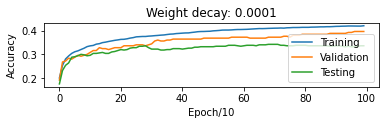

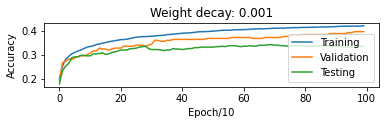

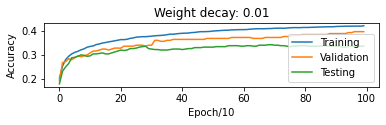

In [20]:
for i, weight_decay in enumerate(weight_decays):
    t_ac, v_ac, te_ac = weight_decay_info[weight_decay][0], weight_decay_info[weight_decay][1], weight_decay_info[weight_decay][2]
    plt.subplot(3, 1, i + 1)
    plt.title("Weight decay: {}".format(weight_decay))
    plot_accuracies(t_ac, v_ac, te_ac)

plt.show()

#### Inline Question 2.

Discuss underfitting and overfitting as observed in the 5 graphs obtained by changing the regularization.
Which weight_decay term gave you the best classifier performance?
HINT: Do not just think in terms of best training set performance, keep in mind that the real utility of a machine learning model is when it performs well on data it has never seen before


#### Your Answer:


### Visualize the filters (10%)


Best LR: 0.01
Best Weight Decay: 0.0


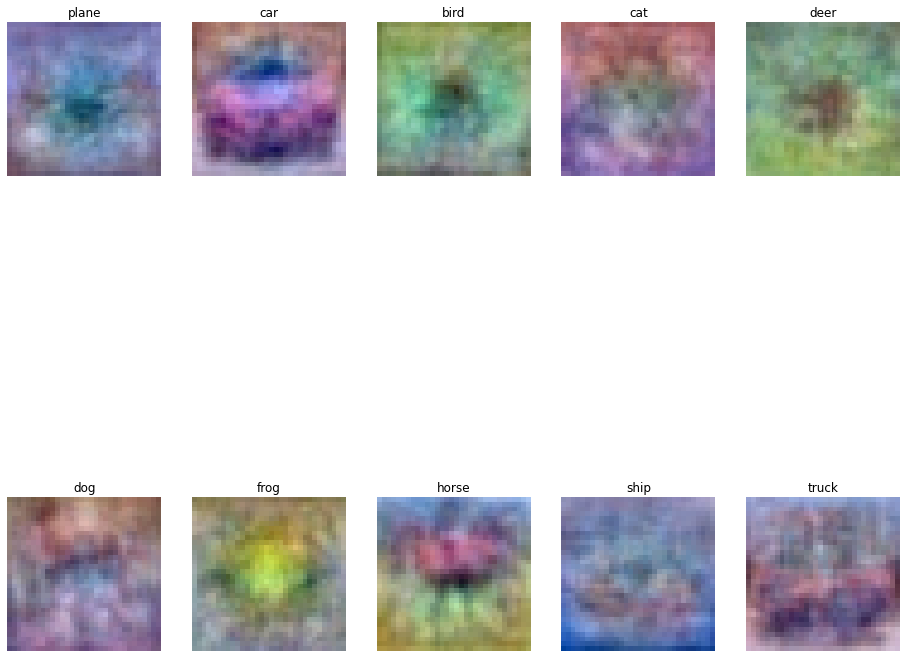

In [21]:
# These visualizations will only somewhat make sense if your learning rate and weight_decay parameters were
# properly chosen in the model. Do your best.

# TODO: Run this cell and Show filter visualizations for the best set of weights you obtain.
# Report the 2 hyperparameters you used to obtain the best model.

# NOTE: You need to set `best_learning_rate` and `best_weight_decay` to the values that gave the highest accuracy
print("Best LR:", best_learning_rate)
print("Best Weight Decay:", best_weight_decay)

# NOTE: You need to set `best_weights` to the weights with the highest accuracy
w = best_weights[:, :-1]
w = w.reshape(10, 3, 32, 32).transpose(0, 2, 3, 1)

w_min, w_max = np.min(w), np.max(w)

fig = plt.figure(figsize=(16, 16))
classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
for i in range(10):
    fig.add_subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[i, :, :, :].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype(int))
    plt.axis("off")
    plt.title(classes[i])
plt.show()


#### Inline Question 3. (10%)

a. Compare and contrast the performance of the 2 classifiers i.e. Linear Regression and Logistic Regression.
b. Which classifier would you deploy for your multiclass classification project and why?


#### Your Answer:
